<font size=10>Classification and Regression from linear and logistic regression to neural networks</font>



https://github.com/anacost/project2-FYS-STK4155

# General structure

- Project title
- Name, email, course title, date, group assistant
- Abstract (1/2 page max)
- Introduction (1 page)
- Method
    - Packages used
    - Datasets (models and observations)
    - Analysis method
    - …
- Results
- Discussion and outlook (1 page)
- Conclusions (1/2 page)
- References
- Acknowledgments

In [2]:
#import tensorflow
import sklearn
import pandas
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
#import seaborn
%matplotlib inline
import numpy as np

## Part a) Producing the data for the one-dimensional Ising model

In [2]:
import scipy.sparse as sp
np.random.seed(12)
import warnings

#Comment this to turn on warnings
warnings.filterwarnings('ignore')

### define Ising model aprams
# system size
L=40

# create 10000 random Ising states
states=np.random.choice([-1, 1], size=(10000,L))

def ising_energies(states,L):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    J=np.zeros((L,L),)
    for i in range(L):
        J[i,(i+1)%L]-=1.0
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states)

    return E
# calculate Ising energies
energies=ising_energies(states,L)

In [3]:
# reshape Ising states into RL samples: S_iS_j --> X_p
states=np.einsum('...i,...j->...ij', states, states)
shape=states.shape
states=states.reshape((shape[0],shape[1]*shape[2]))
# build final data set
Data=[states,energies]

In [4]:
# define number of samples
n_samples=400
# define train and test data sets
X_train=Data[0][:n_samples]
Y_train=Data[1][:n_samples] #+ np.random.normal(0,4.0,size=X_train.shape[0])
X_test=Data[0][n_samples:3*n_samples//2]
Y_test=Data[1][n_samples:3*n_samples//2] #+ np.random.normal(0,4.0,size=X_test.shape[0])

## Part b) Estimating the coupling constant of the one-dimensional Ising model

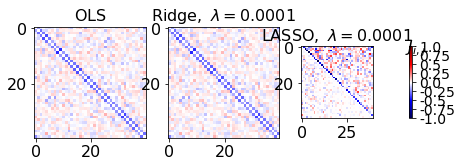

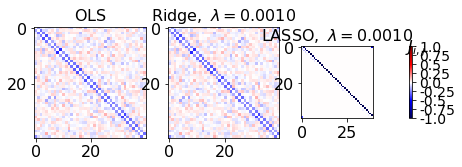

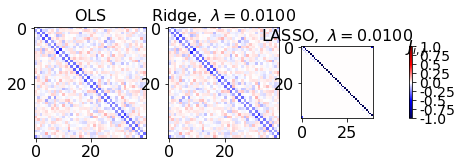

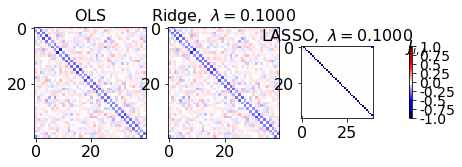

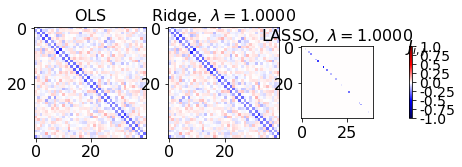

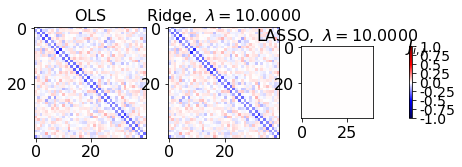

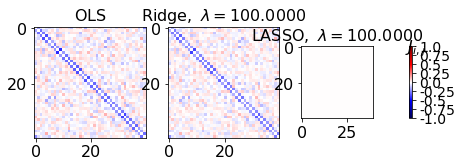

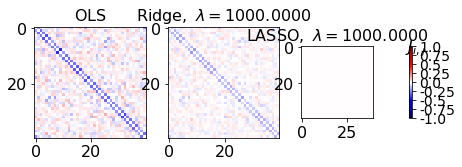

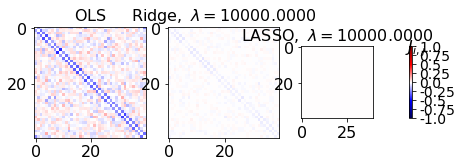

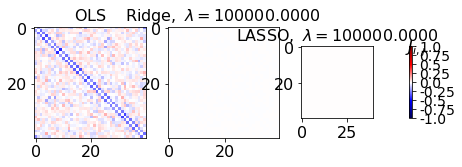

In [5]:
from sklearn import linear_model
# define error lists
train_errors_leastsq = []
test_errors_leastsq = []
train_MSE_leastsq = []
test_MSE_leastsq = []
train_bias_leastsq = []
test_bias_leastsq = []
train_var_leastsq = []
test_var_leastsq = []

train_errors_ridge = []
test_errors_ridge = []
train_MSE_ridge = []
test_MSE_ridge = []
train_bias_ridge = []
test_bias_ridge = []
train_var_ridge = []
test_var_ridge = []

train_errors_lasso = []
test_errors_lasso = []
train_MSE_lasso = []
test_MSE_lasso = []
train_bias_lasso = []
test_bias_lasso = []
train_var_lasso = []
test_var_lasso = []

# set regularisation strength values
lmbdas = np.logspace(-4, 5, 10)

#Initialize coeffficients for OLS, ridge regression and Lasso
coefs_leastsq = []
coefs_ridge = []
coefs_lasso=[]
# set up Lasso Regression model
lasso = linear_model.Lasso()

for _,lmbda in enumerate(lmbdas):
    ### ordinary least squares
    xb = np.c_[np.ones((X_train.shape[0],1)),X_train]
    #fit model/singularity :
    beta_ols = np.linalg.pinv(xb.T @ xb) @ xb.T @ Y_train 
    coefs_leastsq.append(beta_ols) # store weights
    
    # use the coefficient of determination R^2 as the performance of prediction.
    fitted_train = xb  @ beta_ols
    xb_test = np.c_[np.ones((X_test.shape[0],1)),X_test]
    
    fitted_test = xb_test @ beta_ols
    R2_train = 1 - np.sum( (fitted_train - Y_train)**2 )/np.sum( (Y_train - np.mean(Y_train))**2 )
    R2_test = 1 - np.sum( (fitted_test - Y_test)**2 )/np.sum((Y_test - np.mean(Y_test))**2)
    MSE_train = np.sum((fitted_train - Y_train)**2)/len(Y_train)
    MSE_test = np.sum((fitted_test - Y_test)**2)/len(Y_test)
    var_train = np.sum((fitted_train - np.mean(fitted_train))**2)/len(Y_train)
    var_test = np.sum((fitted_test - np.mean(fitted_test))**2)/len(Y_test)
    bias_train = np.sum((Y_train - np.mean(fitted_train))**2)/len(Y_train)
    bias_test = np.sum((Y_test - np.mean(fitted_test))**2)/len(Y_test)
    train_errors_leastsq.append(R2_train)
    test_errors_leastsq.append(R2_test)
    train_MSE_leastsq.append(MSE_train)
    test_MSE_leastsq.append(MSE_test)
    train_bias_leastsq.append(bias_train)
    test_bias_leastsq.append(bias_test)
    train_var_leastsq.append(var_train)
    test_var_leastsq.append(var_test)

    
    ### apply Ridge regression
    
    I3 = np.eye(xb.shape[1]) 
    beta_ridge = (np.linalg.inv(xb.T @ xb + lmbda*I3) @ xb.T @ Y_train).flatten()
  
    coefs_ridge.append(beta_ridge[1:]) # store weights
    # use the coefficient of determination R^2 as the performance of prediction.
    fitted_train = xb  @ beta_ridge
    fitted_test = xb_test @ beta_ridge
    R2_train = 1 - np.sum( (fitted_train - Y_train)**2 )/np.sum( (Y_train - np.mean(Y_train))**2 )
    R2_test = 1 - np.sum( (fitted_test - Y_test)**2 )/np.sum((Y_test - np.mean(Y_test))**2)
    MSE_train = np.sum((fitted_train - Y_train)**2)/len(Y_train)
    MSE_test = np.sum((fitted_test - Y_test)**2)/len(Y_test)
    var_train = np.sum((fitted_train - np.mean(fitted_train))**2)/len(Y_train)
    var_test = np.sum((fitted_test - np.mean(fitted_test))**2)/len(Y_test)
    bias_train = np.sum((Y_train - np.mean(fitted_train))**2)/len(Y_train)
    bias_test = np.sum((Y_test - np.mean(fitted_test))**2)/len(Y_test)
    train_errors_ridge.append(R2_train)
    test_errors_ridge.append(R2_test)
    train_MSE_ridge.append(MSE_train)
    test_MSE_ridge.append(MSE_test)
    train_bias_ridge.append(bias_train)
    test_bias_ridge.append(bias_test)
    train_var_ridge.append(var_train)
    test_var_ridge.append(var_test)

    
    ### apply Lasso regression
    lasso.set_params(alpha=lmbda) # set regularisation parameter
    lasso.fit(X_train, Y_train) # fit model
    
    coefs_lasso.append(lasso.coef_) # store weights
    # use the coefficient of determination R^2 as the performance of prediction.
    
    test_pred = np.array(lasso.predict(X_test))
    train_pred = np.array(lasso.predict(X_train))
    
    var_train = np.sum((train_pred - np.mean(train_pred))**2)/len(Y_train)
    var_test = np.sum((test_pred - np.mean(test_pred))**2)/len(Y_test)
    bias_train = np.sum((Y_train - np.mean(train_pred))**2)/len(Y_train)
    bias_test = np.sum((Y_test - np.mean(test_pred))**2)/len(Y_test)
    
    train_errors_lasso.append(lasso.score(X_train, Y_train))
    test_errors_lasso.append(lasso.score(X_test,Y_test))
    
    train_MSE_lasso.append(sklearn.metrics.mean_squared_error(Y_train, train_pred))
    test_MSE_lasso.append(sklearn.metrics.mean_squared_error(Y_test, test_pred))
    train_bias_lasso.append(bias_train)
    test_bias_lasso.append(bias_test)
    train_var_lasso.append(var_train)
    test_var_lasso.append(var_test)
    
    ### plot Ising interaction J
    J_leastsq=np.array(beta_ols[1:]).reshape((L,L))
    J_ridge=np.array(beta_ridge[1:]).reshape((L,L))
    J_lasso=np.array(lasso.coef_).reshape((L,L))

    cmap_args=dict(vmin=-1., vmax=1., cmap='seismic')

    fig, axarr = plt.subplots(nrows=1, ncols=3)
    
    axarr[0].imshow(J_leastsq,**cmap_args)
    axarr[0].set_title('$\\mathrm{OLS}$',fontsize=16)
    axarr[0].tick_params(labelsize=16)
    
    axarr[1].imshow(J_ridge,**cmap_args)
    axarr[1].set_title('$\\mathrm{Ridge},\ \\lambda=%.4f$' %(lmbda),fontsize=16)
    axarr[1].tick_params(labelsize=16)
    
    im = axarr[2].imshow(J_lasso,**cmap_args)
    axarr[2].set_title('$\\mathrm{LASSO},\ \\lambda=%.4f$' %(lmbda),fontsize=16)
    axarr[2].tick_params(labelsize=16)
    
    divider = make_axes_locatable(axarr[2])
    cax = divider.append_axes("right", size="5%", pad=0.5)
    cbar=fig.colorbar(im, cax=cax)
    
    cbar.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=14)
    cbar.set_label('$J_{i,j}$',labelpad=-40, y=1.12,fontsize=16,rotation=0)
    fig.subplots_adjust(right=1.)
    plt.show();
    #fig.savefig('lasso_ridge'+str()+'.png') ;

In [ ]:
# Plot our performance on both the training and test data
plt.semilogx(lmbdas, train_errors_leastsq, 'b',label='Train (OLS)')
plt.semilogx(lmbdas, test_errors_leastsq,'--b',label='Test (OLS)')
plt.semilogx(lmbdas, train_errors_ridge,'r',label='Train (Ridge)',linewidth=1)
plt.semilogx(lmbdas, test_errors_ridge,'--r',label='Test (Ridge)',linewidth=1)
plt.semilogx(lmbdas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(lmbdas, test_errors_lasso, '--g',label='Test (LASSO)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)

#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left',fontsize=16)
plt.ylim([-0.01, 1.01])
plt.xlim([min(lmbdas), max(lmbdas)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('Performance',fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

## Understanding the results

Let us make a few remarks: (i) the (inverse, see [Scikit documentation](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)) regularization parameter $\lambda$ affects the Ridge and LASSO regressions at scales, separated by a few orders of magnitude. Notice that this is different for the data considered in Notebook 3 __Section VI: Linear Regression (Diabetes)__. Therefore, it is considered good practice to always check the performance for the given model and data with $\lambda$. (ii) at $\lambda\to 0$ and $\lambda\to\infty$, all three models overfit the data, as can be seen from the deviation of the test errors from unity (dashed lines), while the training curves stay at unity. (iii) While the OLS and Ridge regression test curves are monotonic, the LASSO test curve is not -- suggesting the optimal LASSO regularization parameter is $\lambda\approx 10^{-2}$. At this sweet spot, the Ising interaction weights ${\bf J}$ contain only nearest-neighbor terms (as did the model the data was generated from).

Gauge degrees of freedom: recall that the uniform nearest-neighbor interactions strength $J_{j,k}=J$ which we used to generate the data was set to unity, $J=1$. Moreover, $J_{j,k}$ was NOT defined to be symmetric (we only used the $J_{j,j+1}$ but never the $J_{j,j-1}$ elements). The colorbar on the matrix elements plot above suggest that the OLS and Ridge regression learn uniform symmetric weights $J=-0.5$. There is no mystery since this amounts to taking into account both the $J_{j,j+1}$ and the $J_{j,j-1}$ terms, and the weights are distributed symmetrically between them. LASSO, on the other hand, can break this symmetry (see matrix elements plots for $\lambda=0.001$ and $\lambda=0.01$). Thus, we see how different regularization schemes can lead to learning equivalent models but in different gauges. Any information we have about the symmetry of the unknown model that generated the data has to be reflected in the definition of the model and the regularization chosen.

In [ ]:
# Plot our performance on both the training and test data
plt.semilogx(lmbdas, train_MSE_leastsq, 'b',label='Train (OLS)')
plt.semilogx(lmbdas, test_MSE_leastsq,'--b',label='Test (OLS)')
plt.semilogx(lmbdas, train_MSE_ridge,'r',label='Train (Ridge)',linewidth=1)
plt.semilogx(lmbdas, test_MSE_ridge,'--r',label='Test (Ridge)',linewidth=1)
plt.semilogx(lmbdas, train_MSE_lasso, 'g',label='Train (LASSO)')
plt.semilogx(lmbdas, test_MSE_lasso, '--g',label='Test (LASSO)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)

#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left',fontsize=16)
plt.ylim([-0.01, 1.01])
plt.xlim([min(lmbdas), max(lmbdas)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('Performance-MSE',fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

In [ ]:
# Plot our bias-variance on both the training and test data
plt.semilogx(lmbdas, train_bias_leastsq, 'b',label='Bias-Train (OLS)')
plt.semilogx(lmbdas, test_bias_leastsq,'--b',label='Bias-Test (OLS)')
plt.semilogx(lmbdas, train_bias_ridge,'r',label='Bias-Train (Ridge)',linewidth=1)
plt.semilogx(lmbdas, test_bias_ridge,'--r',label='Bias-Test (Ridge)',linewidth=1)
plt.semilogx(lmbdas, train_bias_lasso, 'g',label='Bias-Train (LASSO)')
plt.semilogx(lmbdas, test_bias_lasso, '--g',label='Bias-Test (LASSO)')

plt.semilogx(lmbdas, train_var_leastsq, ':b',label='Variance-Train (OLS)')
plt.semilogx(lmbdas, test_var_leastsq,'.b',label='Variance-Test (OLS)')
plt.semilogx(lmbdas, train_var_ridge,':r',label='Variance-Train (Ridge)',linewidth=1)
plt.semilogx(lmbdas, test_var_ridge,'.r',label='Variance-Test (Ridge)',linewidth=1)
plt.semilogx(lmbdas, train_var_lasso, ':g',label='Variance-Train (LASSO)')
plt.semilogx(lmbdas, test_var_lasso, '.g',label='Variance-Test (LASSO)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)

#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left',fontsize=16)
#plt.ylim([-0.01, 1.01])
plt.xlim([min(lmbdas), max(lmbdas)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('Bias-Variance',fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

In [ ]:
# Plot our bias-variance on both the training and test data
plt.semilogx(lmbdas, train_bias_leastsq, 'b',label='Bias-Train (OLS)')
plt.semilogx(lmbdas, test_bias_leastsq,'--b',label='Bias-Test (OLS)')
#plt.semilogx(lmbdas, train_bias_ridge,'r',label='Bias-Train (Ridge)',linewidth=1)
#plt.semilogx(lmbdas, test_bias_ridge,'--r',label='Bias-Test (Ridge)',linewidth=1)
#plt.semilogx(lmbdas, train_bias_lasso, 'g',label='Bias-Train (LASSO)')
#plt.semilogx(lmbdas, test_bias_lasso, '--g',label='Bias-Test (LASSO)')

plt.semilogx(lmbdas, train_var_leastsq, ':b',label='Variance-Train (OLS)')
plt.semilogx(lmbdas, test_var_leastsq,'.b',label='Variance-Test (OLS)')
#plt.semilogx(lmbdas, train_var_ridge,':r',label='Variance-Train (Ridge)',linewidth=1)
#plt.semilogx(lmbdas, test_var_ridge,'.r',label='Variance-Test (Ridge)',linewidth=1)
#plt.semilogx(lmbdas, train_var_lasso, ':g',label='Variance-Train (LASSO)')
#plt.semilogx(lmbdas, test_var_lasso, '.g',label='Variance-Test (LASSO)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)

#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left',fontsize=16)
#plt.ylim([-0.01, 1.01])
plt.xlim([min(lmbdas), max(lmbdas)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('Bias-Variance',fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

In [ ]:
# Plot our bias-variance on both the training and test data
#plt.semilogx(lmbdas, train_bias_leastsq, 'b',label='Bias-Train (OLS)')
#plt.semilogx(lmbdas, test_bias_leastsq,'--b',label='Bias-Test (OLS)')
plt.semilogx(lmbdas, train_bias_ridge,'r',label='Bias-Train (Ridge)',linewidth=1)
plt.semilogx(lmbdas, test_bias_ridge,'--r',label='Bias-Test (Ridge)',linewidth=1)
#plt.semilogx(lmbdas, train_bias_lasso, 'g',label='Bias-Train (LASSO)')
#plt.semilogx(lmbdas, test_bias_lasso, '--g',label='Bias-Test (LASSO)')

#plt.semilogx(lmbdas, train_var_leastsq, ':b',label='Variance-Train (OLS)')
#plt.semilogx(lmbdas, test_var_leastsq,'.b',label='Variance-Test (OLS)')
plt.semilogx(lmbdas, train_var_ridge,':r',label='Variance-Train (Ridge)',linewidth=1)
plt.semilogx(lmbdas, test_var_ridge,'.r',label='Variance-Test (Ridge)',linewidth=1)
#plt.semilogx(lmbdas, train_var_lasso, ':g',label='Variance-Train (LASSO)')
#plt.semilogx(lmbdas, test_var_lasso, '.g',label='Variance-Test (LASSO)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)

#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left',fontsize=16)
#plt.ylim([-0.01, 1.01])
plt.xlim([min(lmbdas), max(lmbdas)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('Bias-Variance',fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

In [ ]:
# Plot our bias-variance on both the training and test data
#plt.semilogx(lmbdas, train_bias_leastsq, 'b',label='Bias-Train (OLS)')
#plt.semilogx(lmbdas, test_bias_leastsq,'--b',label='Bias-Test (OLS)')
#plt.semilogx(lmbdas, train_bias_ridge,'r',label='Bias-Train (Ridge)',linewidth=1)
#plt.semilogx(lmbdas, test_bias_ridge,'--r',label='Bias-Test (Ridge)',linewidth=1)
plt.semilogx(lmbdas, train_bias_lasso, 'g',label='Bias-Train (LASSO)')
plt.semilogx(lmbdas, test_bias_lasso, '--g',label='Bias-Test (LASSO)')

#plt.semilogx(lmbdas, train_var_leastsq, ':b',label='Variance-Train (OLS)')
#plt.semilogx(lmbdas, test_var_leastsq,'.b',label='Variance-Test (OLS)')
#plt.semilogx(lmbdas, train_var_ridge,':r',label='Variance-Train (Ridge)',linewidth=1)
#plt.semilogx(lmbdas, test_var_ridge,'.r',label='Variance-Test (Ridge)',linewidth=1)
plt.semilogx(lmbdas, train_var_lasso, ':g',label='Variance-Train (LASSO)')
plt.semilogx(lmbdas, test_var_lasso, '.g',label='Variance-Test (LASSO)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)

#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left',fontsize=16)
#plt.ylim([-0.01, 1.01])
plt.xlim([min(lmbdas), max(lmbdas)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('Bias-Variance',fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

In [ ]:
#bootstrap:

## Part c) Determine the phase of the two-dimensional Ising model.

In [1]:
import glob
import os
import numpy as np
import pickle
np.random.seed(1) # shuffle random seed generator

# Ising model parameters
L=40 # linear system size
J=-1.0 # Ising interaction
T=np.linspace(0.25,4.0,16) # set of temperatures
T_c=2.26 # Onsager critical temperature in the TD limit
##### prepare training and test data sets
import pickle,os
from sklearn.model_selection import train_test_split
import numpy as np

###### define ML parameters
num_classes=2
train_to_test_ratio=0.5 # training samples

# path to data directory
path_to_data=os.path.expanduser('.')+'/data/'

# load data
file_name = "Ising2DFM_reSample_L40_T=All.pkl" # this file contains 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25)
file = open(path_to_data+file_name,'rb')
data = pickle.load(file) # pickle reads the file and returns the Python object (1D array, compressed bits)
data = np.unpackbits(data).reshape(-1, 1600) # Decompress array and reshape for convenience
type(data)
#data[np.where(data==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)
file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl" # this file contains 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25)
labels = pickle.load(open(path_to_data+file_name,'rb')) # pickle reads the file and returns the Python object (here just a 1D array with the binary labels)
# divide data into ordered, critical and disordered
X_ordered=data[:70000,:]
Y_ordered=labels[:70000]

X_critical=data[70000:100000,:]
Y_critical=labels[70000:100000]

X_disordered=data[100000:,:]
Y_disordered=labels[100000:]

X_ordered[np.where(X_ordered==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)
X_critical[np.where(X_critical==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)
X_disordered[np.where(X_disordered==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)
del data,labels

# define training and test data sets
X=np.concatenate((X_ordered,X_disordered))
Y=np.concatenate((Y_ordered,Y_disordered))

# pick random data points from ordered and disordered states 
# to create the training and test sets
test_size = 1. - train_to_test_ratio
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_size) #train_size=train_to_test_ratio)

# full data set
X=np.concatenate((X_critical,X))
Y=np.concatenate((Y_critical,Y))

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_critical.shape[0], 'critical samples')
print(X_test.shape[0], 'test samples')

X_train shape: (65000, 1600)
Y_train shape: (65000,)

65000 train samples
30000 critical samples
65000 test samples


In [ ]:
##### plot a few Ising states

# set colourbar map
cmap_args=dict(cmap='plasma_r')

# plot states
fig, axarr = plt.subplots(nrows=1, ncols=3)

axarr[0].imshow(X_ordered[20001].reshape(L,L),**cmap_args)
axarr[0].set_title('$\\mathrm{ordered\\ phase}$',fontsize=16)
axarr[0].tick_params(labelsize=16)

axarr[1].imshow(X_critical[10001].reshape(L,L),**cmap_args)
axarr[1].set_title('$\\mathrm{critical\\ region}$',fontsize=16)
axarr[1].tick_params(labelsize=16)

im=axarr[2].imshow(X_disordered[50001].reshape(L,L),**cmap_args)
axarr[2].set_title('$\\mathrm{disordered\\ phase}$',fontsize=16)
axarr[2].tick_params(labelsize=16)

fig.subplots_adjust(right=2.0)

plt.show()

In [ ]:
###### apply logistic regression
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier

# define regularisation parameter
lmbdas=np.logspace(-5,5,11)

# preallocate data
train_accuracy=np.zeros(lmbdas.shape,np.float64)
test_accuracy=np.zeros(lmbdas.shape,np.float64)
critical_accuracy=np.zeros(lmbdas.shape,np.float64)

train_accuracy_SGD=np.zeros(lmbdas.shape,np.float64)
test_accuracy_SGD=np.zeros(lmbdas.shape,np.float64)
critical_accuracy_SGD=np.zeros(lmbdas.shape,np.float64)

# loop over regularisation strength
for i,lmbda in enumerate(lmbdas):

    # define logistic regressor
    logreg=linear_model.LogisticRegression(C=1.0/lmbda,random_state=1,verbose=0,max_iter=1E3,tol=1E-5)

    # fit training data
    logreg.fit(X_train, Y_train)

    # check accuracy
    train_accuracy[i]=logreg.score(X_train,Y_train)
    test_accuracy[i]=logreg.score(X_test,Y_test)
    critical_accuracy[i]=logreg.score(X_critical,Y_critical)
    
    print('accuracy: train, test, critical')
    print('liblin: %0.4f, %0.4f, %0.4f' %(train_accuracy[i],test_accuracy[i],critical_accuracy[i]) )

    # define SGD-based logistic regression
    logreg_SGD = linear_model.SGDClassifier(loss='log', penalty='l2', alpha=lmbda, max_iter=100, 
                                           shuffle=True, random_state=1, learning_rate='optimal')

    # fit training data
    logreg_SGD.fit(X_train,Y_train)

    # check accuracy
    train_accuracy_SGD[i]=logreg_SGD.score(X_train,Y_train)
    test_accuracy_SGD[i]=logreg_SGD.score(X_test,Y_test)
    critical_accuracy_SGD[i]=logreg_SGD.score(X_critical,Y_critical)
    
    print('SGD: %0.4f, %0.4f, %0.4f' %(train_accuracy_SGD[i],test_accuracy_SGD[i],critical_accuracy_SGD[i]) )

    print('finished computing %i/11 iterations' %(i+1))

# plot accuracy against regularisation strength
plt.semilogx(lmbdas,train_accuracy,'*-b',label='liblinear train')
plt.semilogx(lmbdas,test_accuracy,'*-r',label='liblinear test')
plt.semilogx(lmbdas,critical_accuracy,'*-g',label='liblinear critical')

plt.semilogx(lmbdas,train_accuracy_SGD,'*--b',label='SGD train')
plt.semilogx(lmbdas,test_accuracy_SGD,'*--r',label='SGD test')
plt.semilogx(lmbdas,critical_accuracy_SGD,'*--g',label='SGD critical')

plt.xlabel('$\\lambda$')
plt.ylabel('$\\mathrm{accuracy}$')

plt.grid()
plt.legend()

plt.show()

In [ ]:
###### apply logistic regression
import logisRegresANA
import importlib
importlib.reload(logisRegresANA)
lr = 0.5
epochs = 300
weights= logisRegresANA.logistic_reg(X_train, Y_train, epochs, lr)


In [ ]:
###### apply logistic regression
import logisRegresANA
import importlib
importlib.reload(logisRegresANA)
weights=logisRegresANA.stocGradAscentA(X_train,Y_train)


In [ ]:
###### apply logistic regression
import logisRegresANA
import importlib
importlib.reload(logisRegresANA)
weights = logisRegresANA.steepest_descent_auto(X_train, Y_train, alpha =0.001)
error_train = logisRegresANA.simptest(weights, X_train, Y_train)
error_test = logisRegresANA.simptest(weights, X_test, Y_test)

In [ ]:
###### apply logistic regression
import logisRegresANA
import importlib
importlib.reload(logisRegresANA)
weights = logisRegresANA.logistic_reg(X_train, Y_train, epochs= 100, lr=0.001)
error_train = logisRegresANA.simptest(weights, X_train, Y_train)
error_test = logisRegresANA.simptest(weights, X_test, Y_test)

In [ ]:
###### apply logistic regression
import logisRegresANA
import importlib
importlib.reload(logisRegresANA)
weights = logisRegresANA.gradDscent(X_train, Y_train, alpha= 0.01)

In [ ]:
import importlib
import logisRegresANA
importlib.reload(logisRegresANA)

weights2 = logisRegresANA.sgd(X_train, Y_train)
print(weights2)
weights2 = weights2.flatten()
error_train = logisRegresANA.simptest(weights2, X_train, Y_train)
error_test = logisRegresANA.simptest(weights2, X_test, Y_test)

## Part d) Regression analysis of the one-dimensional Ising model using neural networks.

## Part e) Classifying the Ising model phase using neural networks.

In [ ]:
import importlib
import logisRegresANA
importlib.reload(logisRegresANA)

in_layer = X_train.shape[1] #number of neurons in the input layer

if (len(Y_train.shape)==1): 
    out_layer = 1   #number of neurons in the output layer
else: out_layer = Y_train.shape[1]
biasesnn, weightsnn= logisRegresANA.neuralnetwork([in_layer, 10, out_layer], X_train, 
                                                  Y_train,
                                                  validation_x=X_test, validation_y=Y_test,
                                                  verbose=True,
                             epochs= 30, mini_batch_size = 10, lr= 0.5, C='ce')

y.shape :  () 0
a:  (1600,) [0.39187334329075346 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23830862610888073 -- -- ... -- -- --]
(a-y)  (1600,) [0.39187334329075346 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4577724031332606 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24821683006286013 -- -- ... -- -- --]
(a-y)  (1600,) [0.4577724031332606 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7556219230566489 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18465743245282068 -- -- ... -- -- --]
(a-y)  (1600,) [-0.24437807694335112 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.12497610028952512 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10935707464594768 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8750238997104749 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.22873213246626697 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17641374404370105 -- -- ... -- -- --]
(a-y)  (1600,) [0.22873213246626697 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.124976

y.shape :  () 1
a:  (1600,) [0.6755406373665361 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21918548463295026 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32445936263346387 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.11933162480690244 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10509158812784712 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8806683751930976 -- -- ... -- -- --]
2 biases  [[-0.14020324758683397 -0.013799881210575292 -0.9715351382287222
  -0.7117178542638513 -2.1592387800720596 1.9406162396506825
  0.16539739673455825 -1.3707230949645213 -1.690142928017834
  -1.056592158722149 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.2520245563856598 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.24336853257451316 -- -- ... -- -- --]
(a-y)  (1600,) [0.4185661776318533 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.14695031175600248 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12535591763081616 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8530496882439975 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.14695031175600248 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12535591763081616 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8530496882439975 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.14858346019692198 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12650641555283168 -- -- ... -- -- --]
(a-y)  (1600,) [-0.851416539803078 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5984013207047406 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2403171800835628 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4015986792952594 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.14858346019692198 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.126506415

y.shape :  () 0
a:  (1600,) [0.24596968957185977 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1854686013837827 -- -- ... -- -- --]
(a-y)  (1600,) [0.24596968957185977 -- -- ... -- -- --]
7 biases  [[-0.14020325951864504 -0.01379987616892592 -0.9715351922476825
  -0.7117178594966233 -2.159238806798219 1.9406162781225205
  0.16539741575508832 -1.3707230887638517 -1.6901429105054093
  -1.0565921741712678 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.3509342014211156 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.24079518089848828 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18281286175455258 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7592048191015117 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.23919581604817164 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1819811776332209 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7608041839518284 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7327057609140138 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19584802883742983 -- -- ... -- -- --]
(a-y)  (1600,) [0.7327057609140138 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.275433575695933 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19956992107528576 -- -- ... -- -- --]
(a-y)  (1600,) [-0.724566424304067 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4179825205177143 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24327313305937281 -- -- ... -- -- --]
(a-y)  (1600,) [0.4179825205177143 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.296386162610

y.shape :  () 0
a:  (1600,) [0.3102074160309141 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2139787750703375 -- -- ... -- -- --]
(a-y)  (1600,) [0.3102074160309141 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.396384701208711 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23926386985639192 -- -- ... -- -- --]
(a-y)  (1600,) [0.396384701208711 -- -- ... -- -- --]
12 biases  [[-0.14020325951864504 -0.01379987616892592 -0.9715351922476825
  -0.7117178594966233 -2.159238806798219 1.9406162781225205
  0.16539741575508832 -1.3707230887638517 -1.6901429105054093
  -1.0565921741712678 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.3718352519488741 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.7578199049752736 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18352889659854088 -- -- ... -- -- --]
(a-y)  (1600,) [0.7578199049752736 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.20115438426506033 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16069129795600479 -- -- ... -- -- --]
(a-y)  (1600,) [0.20115438426506033 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.510144215684797 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24989709488814033 -- -- ... -- -- --]
(a-y)  (1600,) [-0.48985578431520305 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.13059672400286848 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.11354121968258708 -- -- ... -- -- --]
(a-y)  (1600,) [0.13059672400286848 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5818420305166738 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24330188204090783 -- -- ... -- -- --]
(a-y)  (1600,) [0.5818420305166738 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.614786760

y.shape :  () 0
a:  (1600,) [0.3785415966642915 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23524785625914033 -- -- ... -- -- --]
(a-y)  (1600,) [0.3785415966642915 -- -- ... -- -- --]
17 biases  [[-0.14020325951864504 -0.01379987616892592 -0.9715351922476825
  -0.7117178594966233 -2.159238806798219 1.9406162781225205
  0.16539741575508832 -1.3707230887638517 -1.6901429105054093
  -1.0565921741712678 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.4182156737431697 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.4704965869231783 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24912954861681844 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5295034130768217 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4534496363167708 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2478330636409591 -- -- ... -- -- --]
(a-y)  (1600,) [0.4534496363167708 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4704965869231783 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24912954861681844 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5295034130768217 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4704965869231783 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24912954861681844 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5295034130768217 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.8903189149666805 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.09765114461923326 -- -- ... -- -- --]
(a-y)  (1600,) [0.8903189149666805 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.470496586923

y.shape :  () 0
a:  (1600,) [0.5614791766770058 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2462203108351175 -- -- ... -- -- --]
(a-y)  (1600,) [0.5614791766770058 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.23790845540548275 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18130802225206016 -- -- ... -- -- --]
(a-y)  (1600,) [0.23790845540548275 -- -- ... -- -- --]
22 biases  [[-0.14020325951864504 -0.01379987616892592 -0.9715351922476825
  -0.7117178594966233 -2.159238806798219 1.9406162781225205
  0.16539741575508832 -1.3707230887638517 -1.6901429105054093
  -1.0565921741712678 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.4390218526511237 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.39382406884375953 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2387266716431053 -- -- ... -- -- --]
(a-y)  (1600,) [0.39382406884375953 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.14491266790504068 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12391298658568407 -- -- ... -- -- --]
(a-y)  (1600,) [0.14491266790504068 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6242133739596567 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23457103772955848 -- -- ... -- -- --]
(a-y)  (1600,) [0.6242133739596567 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4071414886960727 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2413772968784184 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5928585113039273 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.24873129526076695 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1868640380186681 -- -- ... -- -- --]
(a-y)  (1600,) [0.24873129526076695 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7360658915

y.shape :  () 1
a:  (1600,) [0.44431047512491256 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24689867681918704 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5556895248750875 -- -- ... -- -- --]
27 biases  [[-0.14020325951864504 -0.013799876168925921 -0.9715351922476826
  -0.7117178594966233 -2.159238806798219 1.9406162781225205
  0.16539741575508835 -1.3707230887638517 -1.6901429105054093
  -1.0565921741712678 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.44065969511817515 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 0
a:  (1600,) [0.23415418601848798 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17932600318850733 -- -- ... -- -- --]
(a-y)  (1600,) [0.23415418601848798 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4431753295882243 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24677095683259304 -- -- ... -- -- --]
(a-y)  (1600,) [0.4431753295882243 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4770379331428747 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2494727434856489 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5229620668571253 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.47982931330466133 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24959314339823846 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5201706866953386 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4770379331428747 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2494727434856489 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5229620668571253 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4798293133

y.shape :  () 0
a:  (1600,) [0.6058812066653919 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23878917007508058 -- -- ... -- -- --]
(a-y)  (1600,) [0.6058812066653919 -- -- ... -- -- --]
32 biases  [[-0.14020325951864504 -0.013799876168925921 -0.9715351922476826
  -0.7117178594966233 -2.159238806798219 1.9406162781225205
  0.16539741575508835 -1.3707230887638517 -1.6901429105054093
  -1.0565921741712678 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.4806343825397136 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.5289672778371288 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24916089681470657 -- -- ... -- -- --]
(a-y)  (1600,) [0.5289672778371288 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6027205675016911 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2394484850121305 -- -- ... -- -- --]
(a-y)  (1600,) [0.6027205675016911 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5478685560170257 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24770860134484488 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45213144398297433 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7786931977712938 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17233010151601055 -- -- ... -- -- --]
(a-y)  (1600,) [0.7786931977712938 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7383974448240582 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19316665830136012 -- -- ... -- -- --]
(a-y)  (1600,) [0.7383974448240582 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5478685560170

y.shape :  () 1
a:  (1600,) [0.5114980014903652 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24986779596172756 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4885019985096348 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.507704251903282 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24994064450261078 -- -- ... -- -- --]
(a-y)  (1600,) [-0.49229574809671806 -- -- ... -- -- --]
37 biases  [[-0.14020325951864504 -0.013799876168925921 -0.9715351922476826
  -0.7117178594966233 -2.159238806798219 1.9406162781225205
  0.16539741575508835 -1.3707230887638517 -1.6901429105054093
  -1.0565921741712678 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.47265952886849355 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.23791879089770648 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3900854463581209 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6099145536418791 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23791879089770648 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3900854463581209 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.9234147460626909 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.07071995281666697 -- -- ... -- -- --]
(a-y)  (1600,) [-0.07658525393730908 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.714392487231846 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20403586141854274 -- -- ... -- -- --]
(a-y)  (1600,) [0.714392487231846 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6099145536418791 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23791879089770648 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3900854463581209 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6062704632180075 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.238706588647

y.shape :  () 0
a:  (1600,) [0.745171141456726 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18989111139680603 -- -- ... -- -- --]
(a-y)  (1600,) [0.745171141456726 -- -- ... -- -- --]
42 biases  [[-0.14020325951864504 -0.013799876168925921 -0.9715351922476826
  -0.7117178594966233 -2.159238806798219 1.9406162781225205
  0.16539741575508835 -1.3707230887638517 -1.6901429105054093
  -1.0565921741712678 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.457081649787041 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.5488736290387924 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2476113683845785 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45112637096120756 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5539677247719029 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24708748468294414 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4460322752280971 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5539677247719029 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24708748468294414 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4460322752280971 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.39244364341267396 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23843163015766 -- -- ... -- -- --]
(a-y)  (1600,) [0.39244364341267396 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.8902380186017971 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.09771428883774348 -- -- ... -- -- --]
(a-y)  (1600,) [0.8902380186017971 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.610940550853

y.shape :  () 1
a:  (1600,) [0.5654581154054537 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24571523512756632 -- -- ... -- -- --]
(a-y)  (1600,) [-0.43454188459454635 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6605216450322832 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22423280147612967 -- -- ... -- -- --]
(a-y)  (1600,) [0.6605216450322832 -- -- ... -- -- --]
47 biases  [[-0.14020325951864504 -0.013799876168925921 -0.9715351922476826
  -0.7117178594966233 -2.159238806798219 1.9406162781225205
  0.16539741575508835 -1.3707230887638517 -1.6901429105054093
  -1.0565921741712678 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.4527822314644185 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.559225366223175 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2464923559957308 -- -- ... -- -- --]
(a-y)  (1600,) [-0.440774633776825 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5145686231695569 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24978775521894345 -- -- ... -- -- --]
(a-y)  (1600,) [0.5145686231695569 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.559225366223175 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2464923559957308 -- -- ... -- -- --]
(a-y)  (1600,) [-0.440774633776825 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.559225366223175 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2464923559957308 -- -- ... -- -- --]
(a-y)  (1600,) [-0.440774633776825 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5145686231682526 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24978775521898144 -- -- ... -- -- --]
(a-y)  (1600,) [0.5145686231682526 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5782843740615297 -- 

y.shape :  () 0
a:  (1600,) [0.6776528760238151 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.218439455640467 -- -- ... -- -- --]
(a-y)  (1600,) [0.6776528760238151 -- -- ... -- -- --]
52 biases  [[-0.14020325951864504 -0.013799876168925921 -0.9715351922476826
  -0.7117178594966233 -2.159238806798219 1.9406162781225205
  0.16539741575508835 -1.3707230887638517 -1.6901429105054093
  -1.0565921741712678 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.4215283138816208 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.2519980445750907 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1884950301054213 -- -- ... -- -- --]
(a-y)  (1600,) [0.2519980445750907 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5651453487546488 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24575608353563516 -- -- ... -- -- --]
(a-y)  (1600,) [0.5651453487546488 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5540648735561603 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2470769894473564 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4459351264438397 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.48098479858302223 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24963842211507176 -- -- ... -- -- --]
(a-y)  (1600,) [0.48098479858302223 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5540648735561603 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2470769894473564 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4459351264438397 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5540648735561

y.shape :  () 1
a:  (1600,) [0.8784526510335197 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10677359092570099 -- -- ... -- -- --]
(a-y)  (1600,) [-0.12154734896648034 -- -- ... -- -- --]
57 biases  [[-0.14020330878507667 -0.013800018782826466 -0.9715357800864793
  -0.7117176909521694 -2.1592390205378322 1.9406168946400029
  0.16539753292721518 -1.3707229139019719 -1.6901428948847146
  -1.056592347075351 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.4289291286914865 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.5414069506777048 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24828546443557412 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45859304932229517 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7480610601173668 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18846571045344812 -- -- ... -- -- --]
(a-y)  (1600,) [0.7480610601173668 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.44434574464160076 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24690260386050206 -- -- ... -- -- --]
(a-y)  (1600,) [0.44434574464160076 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5720419192315616 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24480996187343315 -- -- ... -- -- --]
(a-y)  (1600,) [0.5720419192315616 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6342755694059102 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23197007146071857 -- -- ... -- -- --]
(a-y)  (1600,) [0.6342755694059102 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4943076895

y.shape :  () 1
a:  (1600,) [0.5432884770787244 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24812610775220476 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4567115229212756 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.43796790970439936 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24615201977355844 -- -- ... -- -- --]
(a-y)  (1600,) [0.43796790970439936 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.35549424685839465 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22911808730897743 -- -- ... -- -- --]
(a-y)  (1600,) [0.35549424685839465 -- -- ... -- -- --]
62 biases  [[-0.14020330878507667 -0.013800018782826466 -0.9715357800864793
  -0.7117176909521694 -2.1592390205378322 1.9406168946400029
  0.16539753292721518 -1.3707229139019719 -1.6901428948847146
  -1.056592347075351 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -

y.shape :  () 0
a:  (1600,) [0.21267781240718805 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.167445960516881 -- -- ... -- -- --]
(a-y)  (1600,) [0.21267781240718805 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4939114424734577 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24996292946724602 -- -- ... -- -- --]
(a-y)  (1600,) [0.4939114424734577 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.557050984877782 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24674518512447507 -- -- ... -- -- --]
(a-y)  (1600,) [0.557050984877782 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.1421616698582446 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12195172948136007 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8578383301417554 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6609190232843785 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22410506794520166 -- -- ... -- -- --]
(a-y)  (1600,) [0.6609190232843785 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.382349354857225

y.shape :  () 1
a:  (1600,) [0.5201042925704487 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2495958174202418 -- -- ... -- -- --]
(a-y)  (1600,) [-0.47989570742955134 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6397598332722124 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2304671890037234 -- -- ... -- -- --]
(a-y)  (1600,) [0.6397598332722124 -- -- ... -- -- --]
67 biases  [[-0.14020330878507667 -0.013800018782826466 -0.9715357800864793
  -0.7117176909521694 -2.1592390205378322 1.9406168946400029
  0.16539753292721518 -1.3707229139019719 -1.6901428948847146
  -1.056592347075351 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.36145011261101956 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.5555638423539648 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24691265942286375 -- -- ... -- -- --]
(a-y)  (1600,) [-0.44443615764603517 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6453521109423965 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22887276384458924 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35464788905760347 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.44488968056884737 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2469628526921963 -- -- ... -- -- --]
(a-y)  (1600,) [0.44488968056884737 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.35231828158843526 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2281901100470073 -- -- ... -- -- --]
(a-y)  (1600,) [0.35231828158843526 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4246066817340186 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24431584756084443 -- -- ... -- -- --]
(a-y)  (1600,) [0.4246066817340186 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.26538045

y.shape :  () 1
a:  (1600,) [0.5698173170433618 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2451255422408667 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4301826829566382 -- -- ... -- -- --]
72 biases  [[-0.14020330878507667 -0.013800018782826466 -0.9715357800864793
  -0.7117176909521694 -2.1592390205378322 1.9406168946400029
  0.16539753292721518 -1.3707229139019719 -1.6901428948847146
  -1.056592347075351 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.38074590518364226 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.17456152230188204 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.14408979723353157 -- -- ... -- -- --]
(a-y)  (1600,) [-0.825438477698118 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.228045485919524 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1760407422712522 -- -- ... -- -- --]
(a-y)  (1600,) [-0.771954514080476 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5587264090511348 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2465512088799588 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4412735909488652 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.2688677606557667 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19657788793572004 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7311322393442333 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.1658118071706355 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1383182517734435 -- -- ... -- -- --]
(a-y)  (1600,) [0.1658118071706355 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.329468940974377

y.shape :  () 1
a:  (1600,) [0.4189675056723126 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24343373486303332 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5810324943276874 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6485833051505898 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2279230014305267 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3514166948494102 -- -- ... -- -- --]
77 biases  [[-0.14020420183324533 -0.013805952316179995 -0.9715537801202225
  -0.7117107641348558 -2.159245555346837 1.940635020499646
  0.16539964030412463 -1.3707179564587801 -1.6901455196857111
  -1.0565987388182374 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.4222733321587405 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.6661618878562356 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22239022702405176 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33383811214376435 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6661618878562356 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22239022702405176 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33383811214376435 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5632991064017107 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24599322312874491 -- -- ... -- -- --]
(a-y)  (1600,) [0.5632991064017107 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5632991064017107 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24599322312874491 -- -- ... -- -- --]
(a-y)  (1600,) [-0.43670089359828934 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5632991064017107 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24599322312874491 -- -- ... -- -- --]
(a-y)  (1600,) [-0.43670089359828934 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.666161

y.shape :  () 0
a:  (1600,) [0.4404044530462781 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24644837078328677 -- -- ... -- -- --]
(a-y)  (1600,) [0.4404044530462781 -- -- ... -- -- --]
82 biases  [[-0.14020420183324533 -0.013805952316179995 -0.9715537801202225
  -0.7117107641348558 -2.159245555346837 1.940635020499646
  0.16539964030412463 -1.3707179564587801 -1.6901455196857111
  -1.0565987388182374 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.4384342502293433 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.5942276170517214 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24112115618475413 -- -- ... -- -- --]
(a-y)  (1600,) [0.5942276170517214 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.374879514576025 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23434486412726885 -- -- ... -- -- --]
(a-y)  (1600,) [0.374879514576025 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6680023645332925 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22177520551122268 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33199763546670746 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6680023645332925 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22177520551122268 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33199763546670746 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6776738720492507 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2184319951910265 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32232612795074933 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.30958337901

y.shape :  () 1
a:  (1600,) [0.6599859487909303 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2244044961894658 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3400140512090697 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.30816638770113547 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21319986519236894 -- -- ... -- -- --]
(a-y)  (1600,) [0.30816638770113547 -- -- ... -- -- --]
87 biases  [[-0.14020420183324533 -0.013805952316179995 -0.9715537801202225
  -0.7117107641348558 -2.159245555346837 1.940635020499646
  0.16539964030412463 -1.3707179564587801 -1.6901455196857111
  -1.0565987388182374 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.4102702855447809 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6442128872539745 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22920264314987243 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3557871127460255 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7257004349400349 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19905931366787907 -- -- ... -- -- --]
(a-y)  (1600,) [0.7257004349400349 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3850800816846919 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2367934123744029 -- -- ... -- -- --]
(a-y)  (1600,) [0.3850800816846919 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.29693429383898345 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2087643189813277 -- -- ... -- -- --]
(a-y)  (1600,) [0.29693429383898345 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6442128872539745 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22920264314987243 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3557871127460255 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.644212887253

y.shape :  () 1
a:  (1600,) [0.48833111062114143 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24986383702066395 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5116688893788586 -- -- ... -- -- --]
92 biases  [[-0.14020420183324533 -0.013805952316179995 -0.9715537801202225
  -0.7117107641348558 -2.159245555346837 1.940635020499646
  0.16539964030412463 -1.3707179564587801 -1.6901455196857111
  -1.0565987388182374 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.36270123526470754 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.51319997116333 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24982576076128726 -- -- ... -- -- --]
(a-y)  (1600,) [-0.48680002883666995 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2835004203645695 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20312793201768192 -- -- ... -- -- --]
(a-y)  (1600,) [0.2835004203645695 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.51319997116333 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24982576076128726 -- -- ... -- -- --]
(a-y)  (1600,) [-0.48680002883666995 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5874294411134933 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24235609282658221 -- -- ... -- -- --]
(a-y)  (1600,) [-0.41257055888650673 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7183843636906392 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20230826969543464 -- -- ... -- -- --]
(a-y)  (1600,) [0.7183843636906392 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.382636799613

y.shape :  () 0
a:  (1600,) [0.19467400811858365 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1567760386816293 -- -- ... -- -- --]
(a-y)  (1600,) [0.19467400811858365 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.21528411065489597 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16893686235442648 -- -- ... -- -- --]
(a-y)  (1600,) [0.21528411065489597 -- -- ... -- -- --]
97 biases  [[-0.14020420183324533 -0.013805952316179995 -0.9715537801202225
  -0.7117107641348558 -2.159245555346837 1.940635020499646
  0.16539964030412463 -1.3707179564587801 -1.6901455196857111
  -1.0565987388182374 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.3380131182708421 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.23419224981656558 -- -- ... -- -- --]
(a-y)  (1600,) [0.37427112430537524 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5115839645204923 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.249865811765988 -- -- ... -- -- --]
(a-y)  (1600,) [-0.48841603547950774 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6728616793840363 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22011883980053065 -- -- ... -- -- --]
(a-y)  (1600,) [0.6728616793840363 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.251180525569993 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18808886914437506 -- -- ... -- -- --]
(a-y)  (1600,) [0.251180525569993 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3778321229014216 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2350750098052266 -- -- ... -- -- --]
(a-y)  (1600,) [0.3778321229014216 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3778321229014216 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2350750098052266 

y.shape :  () 0
a:  (1600,) [0.23920502307574867 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1819859800110792 -- -- ... -- -- --]
(a-y)  (1600,) [0.23920502307574867 -- -- ... -- -- --]
102 biases  [[-0.14020420183324533 -0.013805952316179995 -0.9715537801202225
  -0.7117107641348558 -2.159245555346837 1.940635020499646
  0.16539964030412463 -1.3707179564587801 -1.6901455196857111
  -1.0565987388182374 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.37671956375943005 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.6095452091711319 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23799984714765296 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39045479082886814 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6095452091711319 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23799984714765296 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39045479082886814 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3742121929421524 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2341774275955777 -- -- ... -- -- --]
(a-y)  (1600,) [0.3742121929421524 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3724259765960668 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23372486855253272 -- -- ... -- -- --]
(a-y)  (1600,) [0.3724259765960668 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4786940062357597 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24954605462971818 -- -- ... -- -- --]
(a-y)  (1600,) [0.4786940062357597 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.60954520917

y.shape :  () 0
a:  (1600,) [0.33438819104847045 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22257272873580206 -- -- ... -- -- --]
(a-y)  (1600,) [0.33438819104847045 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6157941600326197 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23659171250234007 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38420583996738034 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7058657394317273 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20761929732822818 -- -- ... -- -- --]
(a-y)  (1600,) [0.7058657394317273 -- -- ... -- -- --]
107 biases  [[-0.14020420183324533 -0.013805952316179995 -0.9715537801202225
  -0.7117107641348558 -2.159245555346837 1.940635020499646
  0.16539964030412463 -1.3707179564587801 -1.6901455196857111
  -1.0565987388182374 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --

y.shape :  () 0
a:  (1600,) [0.37811760686485146 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23514468224364907 -- -- ... -- -- --]
(a-y)  (1600,) [0.37811760686485146 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6179928196521413 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23607769451053726 -- -- ... -- -- --]
(a-y)  (1600,) [0.6179928196521413 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.785807057559986 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16831432584890282 -- -- ... -- -- --]
(a-y)  (1600,) [0.785807057559986 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6179928196521413 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23607769451053726 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38200718034785874 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6031742045687826 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.239355083511599 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39682579543121743 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.528193986449

y.shape :  () 0
a:  (1600,) [0.5688419927573942 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24526078003319088 -- -- ... -- -- --]
(a-y)  (1600,) [0.5688419927573942 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4137088221743693 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2425538326294654 -- -- ... -- -- --]
(a-y)  (1600,) [0.4137088221743693 -- -- ... -- -- --]
112 biases  [[-0.14020420183324564 -0.013805952316186936 -0.9715537801202334
  -0.7117107641348491 -2.1592455553468413 1.940635020499658
  0.16539964030412452 -1.3707179564587766 -1.690145519685715
  -1.0565987388182425 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.30093615704005694 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.581810994849799 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24330696112168615 -- -- ... -- -- --]
(a-y)  (1600,) [-0.41818900515020097 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4856119198709922 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24979298315020124 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5143880801290077 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3744897091792587 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23424716689809294 -- -- ... -- -- --]
(a-y)  (1600,) [0.3744897091792587 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.19924500089074643 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15954643051079287 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8007549991092535 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5428694796719045 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24816220771266018 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45713052032809554 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.54286947

y.shape :  () 0
a:  (1600,) [0.55949599031482 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24646022713645885 -- -- ... -- -- --]
(a-y)  (1600,) [0.55949599031482 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.666942417258644 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2221302293198408 -- -- ... -- -- --]
(a-y)  (1600,) [-0.333057582741356 -- -- ... -- -- --]
117 biases  [[-0.1402042018332438 -0.013805952316172007 -0.9715537801202094
  -0.7117107641348626 -2.159245555346831 1.940635020499634
  0.16539964030412502 -1.370717956458783 -1.6901455196857065
  -1.0565987388182303 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.3315855541341763 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.35177504415129324 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22802936246364894 -- -- ... -- -- --]
(a-y)  (1600,) [0.35177504415129324 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6193840467484298 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23574744938196873 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38061595325157016 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6193840467484298 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23574744938196873 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38061595325157016 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.08175974791225764 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.07507509153358173 -- -- ... -- -- --]
(a-y)  (1600,) [0.08175974791225764 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6193840467484298 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23574744938196873 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38061595325157016 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4584

y.shape :  () 1
a:  (1600,) [0.13438604887773448 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.11632643874476564 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8656139511222656 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6784091272165976 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2181701833258119 -- -- ... -- -- --]
(a-y)  (1600,) [0.6784091272165976 -- -- ... -- -- --]
122 biases  [[-0.1402042018332438 -0.013805952316172007 -0.9715537801202094
  -0.7117107641348626 -2.159245555346831 1.940635020499634
  0.16539964030412502 -1.370717956458783 -1.6901455196857065
  -1.0565987388182303 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.34857312364555626 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.5746955504742788 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24442057473934448 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4253044495257212 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5912556181279779 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24167241216008067 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4087443818720221 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4192525948365532 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24347985655937016 -- -- ... -- -- --]
(a-y)  (1600,) [0.4192525948365532 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.29405681932205846 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2075874063322527 -- -- ... -- -- --]
(a-y)  (1600,) [0.29405681932205846 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4114458246452297 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2421581580272366 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5885541753547703 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.59125561812

y.shape :  () 0
a:  (1600,) [0.5167547827518266 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2497192772549391 -- -- ... -- -- --]
(a-y)  (1600,) [0.5167547827518266 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6111571512840859 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23764408771840684 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3888428487159141 -- -- ... -- -- --]
127 biases  [[-0.1402042018332438 -0.013805952316172007 -0.9715537801202094
  -0.7117107641348626 -2.159245555346831 1.940635020499634
  0.16539964030412502 -1.370717956458783 -1.6901455196857065
  -1.0565987388182303 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.3346800127956224 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.22685038618154946 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17538928847083135 -- -- ... -- -- --]
(a-y)  (1600,) [0.22685038618154946 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5851834588183871 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24274377834373614 -- -- ... -- -- --]
(a-y)  (1600,) [-0.41481654118161293 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5687377609043976 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24527512022584985 -- -- ... -- -- --]
(a-y)  (1600,) [-0.43126223909560235 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5687377609043976 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24527512022584985 -- -- ... -- -- --]
(a-y)  (1600,) [-0.43126223909560235 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5851834588183871 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24274377834373614 -- -- ... -- -- --]
(a-y)  (1600,) [-0.41481654118161293 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5687

y.shape :  () 1
a:  (1600,) [0.4681044858744454 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24898267617866654 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5318955141255546 -- -- ... -- -- --]
132 biases  [[-0.1402042018332438 -0.013805952316172007 -0.9715537801202094
  -0.7117107641348626 -2.159245555346831 1.940635020499634
  0.16539964030412502 -1.370717956458783 -1.6901455196857065
  -1.0565987388182303 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.32235946805238247 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.5732171491274682 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24463924907364606 -- -- ... -- -- --]
(a-y)  (1600,) [0.5732171491274682 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6813657116649054 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21710647863228238 -- -- ... -- -- --]
(a-y)  (1600,) [-0.31863428833509455 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5282978738610561 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24919923033494376 -- -- ... -- -- --]
(a-y)  (1600,) [0.5282978738610561 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6813657116649054 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21710647863228238 -- -- ... -- -- --]
(a-y)  (1600,) [0.6813657116649054 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.14526665868982325 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12416425656291764 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8547333413101768 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6666362434

y.shape :  () 0
a:  (1600,) [0.23143569368652256 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17787321337436068 -- -- ... -- -- --]
(a-y)  (1600,) [0.23143569368652256 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.19500957901432198 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15698084310697888 -- -- ... -- -- --]
(a-y)  (1600,) [0.19500957901432198 -- -- ... -- -- --]
137 biases  [[-0.1402042018332438 -0.013805952316172007 -0.9715537801202094
  -0.7117107641348626 -2.159245555346831 1.940635020499634
  0.16539964030412502 -1.370717956458783 -1.6901455196857065
  -1.0565987388182303 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.31950723632949435 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.5448413908009851 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24798924967103333 -- -- ... -- -- --]
(a-y)  (1600,) [0.5448413908009851 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.2780223423548724 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2007259195063825 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7219776576451276 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.11211385517654063 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.0995443386539943 -- -- ... -- -- --]
(a-y)  (1600,) [0.11211385517654063 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.44205320048926144 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24664216842646228 -- -- ... -- -- --]
(a-y)  (1600,) [0.44205320048926144 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.62371388907224 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2346948736506215 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37628611092776 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.244006222678976

y.shape :  () 1
a:  (1600,) [0.05831883225787043 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.054917746061948804 -- -- ... -- -- --]
(a-y)  (1600,) [-0.9416811677421296 -- -- ... -- -- --]
142 biases  [[-0.14026593426797143 -0.014597987963590029 -0.9725996078184526
  -0.7108945208005747 -2.1597067032636135 1.9418085822839564
  0.16520143342467716 -1.3704352148405454 -1.6907194043909515
  -1.0571989967334832 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.3138081108759268 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- 

y.shape :  () 0
a:  (1600,) [0.23895563694756866 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18185584051855042 -- -- ... -- -- --]
(a-y)  (1600,) [0.23895563694756866 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.06795913003007231 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.06334068667562803 -- -- ... -- -- --]
(a-y)  (1600,) [-0.9320408699699276 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.06795913003007231 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.06334068667562803 -- -- ... -- -- --]
(a-y)  (1600,) [0.06795913003007231 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.09604839479787276 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.08682310065462473 -- -- ... -- -- --]
(a-y)  (1600,) [0.09604839479787276 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.05180552750822977 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.04912171482782382 -- -- ... -- -- --]
(a-y)  (1600,) [0.05180552750822977 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.0815

y.shape :  () 1
a:  (1600,) [0.3002811522303499 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21011238184556333 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6997188477696501 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.09198379229692595 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.08352277425160193 -- -- ... -- -- --]
(a-y)  (1600,) [0.09198379229692595 -- -- ... -- -- --]
147 biases  [[-0.14026593426797143 -0.014597987963590029 -0.9725996078184526
  -0.7108945208005747 -2.1597067032636135 1.9418085822839564
  0.16520143342467716 -1.3704352148405454 -1.6907194043909515
  -1.0571989967334832 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.38449780690084623 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.11892937590714754 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10478517945348394 -- -- ... -- -- --]
(a-y)  (1600,) [0.11892937590714754 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.29074339970565016 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20621167523325074 -- -- ... -- -- --]
(a-y)  (1600,) [0.29074339970565016 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.14002941989324558 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12042118145760669 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8599705801067544 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.11892937590714754 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10478517945348394 -- -- ... -- -- --]
(a-y)  (1600,) [0.11892937590714754 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.08499230693270003 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.07776861469495774 -- -- ... -- -- --]
(a-y)  (1600,) [0.08499230693270003 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.1655

y.shape :  () 1
a:  (1600,) [0.18271763795925383 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.14933190273784486 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8172823620407461 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.18412288617710887 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15022164896292026 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8158771138228911 -- -- ... -- -- --]
152 biases  [[-0.14026593426797143 -0.014597987963590029 -0.9725996078184526
  -0.7108945208005747 -2.1597067032636135 1.9418085822839564
  0.16520143342467716 -1.3704352148405454 -1.6907194043909515
  -1.0571989967334832 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.5293924269373618 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.3488724863054814 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22716047460451308 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6511275136945186 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.3488724863054814 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22716047460451308 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6511275136945186 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.3488724863054814 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22716047460451308 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6511275136945186 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6770483032091916 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21865389833074614 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3229516967908084 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.3488724863054814 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22716047460451308 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6511275136945186 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.240179052

y.shape :  () 0
a:  (1600,) [0.379209285938124 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2354096033964221 -- -- ... -- -- --]
(a-y)  (1600,) [0.379209285938124 -- -- ... -- -- --]
157 biases  [[-0.14026593426797143 -0.014597987963590029 -0.9725996078184526
  -0.7108945208005747 -2.1597067032636135 1.9418085822839564
  0.16520143342467716 -1.3704352148405454 -1.6907194043909515
  -1.0571989967334832 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.6362880485243076 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.42208183636592866 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2439287597758941 -- -- ... -- -- --]
(a-y)  (1600,) [0.42208183636592866 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8891228446066971 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.09858341180519226 -- -- ... -- -- --]
(a-y)  (1600,) [-0.1108771553933029 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7228988597842967 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20031609830686045 -- -- ... -- -- --]
(a-y)  (1600,) [0.7228988597842967 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.42208183636592866 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2439287597758941 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5779181636340713 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.441138824915864 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24653536206771468 -- -- ... -- -- --]
(a-y)  (1600,) [0.441138824915864 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4220818363659

y.shape :  () 0
a:  (1600,) [0.6271476416710821 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23383347721748213 -- -- ... -- -- --]
(a-y)  (1600,) [0.6271476416710821 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2945869271689011 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20780546951008566 -- -- ... -- -- --]
(a-y)  (1600,) [0.2945869271689011 -- -- ... -- -- --]
162 biases  [[-0.14026593426797143 -0.014597987963590029 -0.9725996078184526
  -0.7108945208005747 -2.1597067032636135 1.9418085822839564
  0.16520143342467716 -1.3704352148405454 -1.6907194043909515
  -1.0571989967334832 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.6283602889717153 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.21579595335540266 -- -- ... -- -- --]
(a-y)  (1600,) [0.3150566393605942 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.722311660947159 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2005775254069154 -- -- ... -- -- --]
(a-y)  (1600,) [0.722311660947159 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4684383138107709 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24900385996489266 -- -- ... -- -- --]
(a-y)  (1600,) [0.4684383138107709 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5532850930607227 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24716069885751013 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4467149069392773 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8119836930156953 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1526661752922884 -- -- ... -- -- --]
(a-y)  (1600,) [-0.18801630698430472 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5193681727377859 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2496248738847993

167 biases  [[-0.14026593426797143 -0.014597987963590029 -0.9725996078184526
  -0.7108945208005747 -2.1597067032636135 1.9418085822839564
  0.16520143342467716 -1.3704352148405454 -1.6907194043909515
  -1.0571989967334832 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.690155271044956 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- --]]
167 weights  [[[-0.6565550471166648 0.9658513077934935 1.0961174578618533 ...
   -0.016854132689107418 -0.5582004377122108 -0.6642136885530204]
  [-1.2657805356070084 0.350

y.shape :  () 1
a:  (1600,) [0.8448351242109226 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.13108873711043761 -- -- ... -- -- --]
(a-y)  (1600,) [-0.15516487578907745 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5338667194816316 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24885304531155247 -- -- ... -- -- --]
(a-y)  (1600,) [0.5338667194816316 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5338667194816316 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24885304531155247 -- -- ... -- -- --]
(a-y)  (1600,) [0.5338667194816316 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4562598344252251 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24808679791549126 -- -- ... -- -- --]
(a-y)  (1600,) [0.4562598344252251 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5338667194816316 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24885304531155247 -- -- ... -- -- --]
(a-y)  (1600,) [0.5338667194816316 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.386792627573

y.shape :  () 0
a:  (1600,) [0.4700999547105412 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2491059872916883 -- -- ... -- -- --]
(a-y)  (1600,) [0.4700999547105412 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4187745195739461 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24340242132955675 -- -- ... -- -- --]
(a-y)  (1600,) [0.4187745195739461 -- -- ... -- -- --]
172 biases  [[-0.14026593426797143 -0.014597987963590027 -0.9725996078184526
  -0.7108945208005747 -2.1597067032636135 1.9418085822839564
  0.16520143342467716 -1.3704352148405454 -1.6907194043909515
  -1.0571989967334832 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.6731811042760465 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6019310790883831 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2396100551158778 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39806892091161694 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.874108233464873 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.11004302965379209 -- -- ... -- -- --]
(a-y)  (1600,) [-0.12589176653512701 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5315795649361954 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24900273107844062 -- -- ... -- -- --]
(a-y)  (1600,) [0.5315795649361954 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.42368429586839 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2441759133028966 -- -- ... -- -- --]
(a-y)  (1600,) [0.42368429586839 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6019310790883831 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2396100551158778 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39806892091161694 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6019310790883831

y.shape :  () 1
a:  (1600,) [0.5770557913297262 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2440624050225497 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4229442086702738 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4931301917707974 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24995280573489398 -- -- ... -- -- --]
(a-y)  (1600,) [0.4931301917707974 -- -- ... -- -- --]
177 biases  [[-0.14026593426797143 -0.014597987963590027 -0.9725996078184526
  -0.7108945208005747 -2.1597067032636135 1.9418085822839564
  0.16520143342467716 -1.3704352148405454 -1.6907194043909515
  -1.0571989967334832 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.6691612666070564 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.5092820707549277 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499138431625005 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4907179292450723 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5092820707549277 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499138431625005 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4907179292450723 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2725749309264147 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19827783795687495 -- -- ... -- -- --]
(a-y)  (1600,) [0.2725749309264147 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4235546180958381 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24415610358552686 -- -- ... -- -- --]
(a-y)  (1600,) [0.4235546180958381 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4235546180958381 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24415610358552686 -- -- ... -- -- --]
(a-y)  (1600,) [-0.576445381904162 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.42355461809583

y.shape :  () 0
a:  (1600,) [0.39039131343277933 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2379859358290088 -- -- ... -- -- --]
(a-y)  (1600,) [0.39039131343277933 -- -- ... -- -- --]
182 biases  [[-0.14026593426797143 -0.014597987963590027 -0.9725996078184526
  -0.7108945208005747 -2.1597067032636135 1.9418085822839564
  0.16520143342467716 -1.3704352148405454 -1.6907194043909515
  -1.0571989967334832 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.6503753478524521 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 0
a:  (1600,) [0.538470828777723 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2485199953331551 -- -- ... -- -- --]
(a-y)  (1600,) [0.538470828777723 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5020961329987709 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24999560622645145 -- -- ... -- -- --]
(a-y)  (1600,) [-0.49790386700122913 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5068655445496829 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24995286429803631 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4931344554503171 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5020961329987709 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24999560622645145 -- -- ... -- -- --]
(a-y)  (1600,) [-0.49790386700122913 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5020961329987709 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24999560622645145 -- -- ... -- -- --]
(a-y)  (1600,) [-0.49790386700122913 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5020961329

y.shape :  () 1
a:  (1600,) [0.594643651817562 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2410425791706361 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40535634818243804 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5990007766400869 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24019884622465962 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4009992233599131 -- -- ... -- -- --]
187 biases  [[-0.14026593426797143 -0.014597987963590027 -0.9725996078184526
  -0.7108945208005747 -2.1597067032636135 1.9418085822839564
  0.16520143342467716 -1.3704352148405454 -1.6907194043909515
  -1.0571989967334832 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7309465291685646 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.547869026127502 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24770855633760452 -- -- ... -- -- --]
(a-y)  (1600,) [0.547869026127502 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6516414161962818 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22700488089398604 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3483585838037182 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.635268598297777 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23170240631455463 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36473140170222296 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6394994527188272 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23053990269114769 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36050054728117276 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5576287681405017 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2466789250826083 -- -- ... -- -- --]
(a-y)  (1600,) [0.5576287681405017 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6516414161962

y.shape :  () 1
a:  (1600,) [0.5881772796753701 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24222476734905155 -- -- ... -- -- --]
(a-y)  (1600,) [-0.41182272032462985 -- -- ... -- -- --]
192 biases  [[-0.14026593426797143 -0.014597987963590027 -0.9725996078184526
  -0.7108945208005747 -2.1597067032636135 1.9418085822839564
  0.16520143342467716 -1.3704352148405454 -1.6907194043909515
  -1.0571989967334832 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.691498768582912 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- --

y.shape :  () 0
a:  (1600,) [0.45098915395913164 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24759793697035828 -- -- ... -- -- --]
(a-y)  (1600,) [0.45098915395913164 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4144163961034898 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24267544674408525 -- -- ... -- -- --]
(a-y)  (1600,) [0.4144163961034898 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8141407879384949 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1513155653533816 -- -- ... -- -- --]
(a-y)  (1600,) [-0.18585921206150513 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5865423813418293 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2425104162316854 -- -- ... -- -- --]
(a-y)  (1600,) [-0.41345761865817066 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5919193074989796 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24155084090890805 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4080806925010204 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.591919307

y.shape :  () 0
a:  (1600,) [0.5958240100072113 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24081775910613787 -- -- ... -- -- --]
(a-y)  (1600,) [0.5958240100072113 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4006959996259944 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24013871550971946 -- -- ... -- -- --]
(a-y)  (1600,) [0.4006959996259944 -- -- ... -- -- --]
197 biases  [[-0.14026593426797143 -0.014597987963590027 -0.9725996078184526
  -0.7108945208005747 -2.1597067032636135 1.9418085822839564
  0.16520143342467716 -1.3704352148405454 -1.6907194043909515
  -1.0571989967334832 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.6543692875343092 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.24006495882615114 -- -- ... -- -- --]
(a-y)  (1600,) [0.40032532330702614 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5733025377887979 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24462673795372186 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4266974622112021 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.46583167320399704 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24883252544396153 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5341683267960029 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7988844892140761 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16066806210724086 -- -- ... -- -- --]
(a-y)  (1600,) [0.7988844892140761 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7133786753691037 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20446954089772665 -- -- ... -- -- --]
(a-y)  (1600,) [0.7133786753691037 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7364612740496325 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19408606587

y.shape :  () 1
a:  (1600,) [0.5142906805298357 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24979577644999418 -- -- ... -- -- --]
(a-y)  (1600,) [-0.48570931947016427 -- -- ... -- -- --]
202 biases  [[-0.1402659342679663 -0.014597987963595179 -0.9725996078184622
  -0.7108945208005639 -2.159706703263615 1.9418085822839717
  0.16520143342467083 -1.3704352148405348 -1.6907194043909526
  -1.0571989967334874 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.6529521600511605 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.3595190393478168 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23026509969423975 -- -- ... -- -- --]
(a-y)  (1600,) [0.3595190393478168 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3379813399330593 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2237499537901131 -- -- ... -- -- --]
(a-y)  (1600,) [0.3379813399330593 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5370149722384591 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2486298918301861 -- -- ... -- -- --]
(a-y)  (1600,) [-0.46298502776154093 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5933774878630608 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24128064476038394 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40662251213693923 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5370149722384591 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2486298918301861 -- -- ... -- -- --]
(a-y)  (1600,) [-0.46298502776154093 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.53701497223

y.shape :  () 0
a:  (1600,) [0.3668763180153469 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23227808529484895 -- -- ... -- -- --]
(a-y)  (1600,) [0.3668763180153469 -- -- ... -- -- --]
207 biases  [[-0.1402659342679663 -0.014597987963595179 -0.9725996078184622
  -0.7108945208005639 -2.159706703263615 1.9418085822839717
  0.16520143342467083 -1.3704352148405348 -1.6907194043909526
  -1.0571989967334874 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.6705509088511682 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.832646997384276 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.13934597513122543 -- -- ... -- -- --]
(a-y)  (1600,) [-0.16735300261572394 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4813688331997874 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24965287962366264 -- -- ... -- -- --]
(a-y)  (1600,) [0.4813688331997874 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.650860930561903 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2272409796299967 -- -- ... -- -- --]
(a-y)  (1600,) [-0.349139069438097 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5993405138095783 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24013146231604898 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4006594861904217 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5063922910748283 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24995913861481467 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4936077089251717 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5993405138095

y.shape :  () 1
a:  (1600,) [0.5979489861284176 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24040599611641505 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4020510138715824 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5650173093002149 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2457727494913602 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4349826906997851 -- -- ... -- -- --]
212 biases  [[-0.1402659342679663 -0.014597987963595179 -0.9725996078184622
  -0.7108945208005639 -2.159706703263615 1.9418085822839717
  0.16520143342467083 -1.3704352148405348 -1.6907194043909526
  -1.0571989967334874 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.6833142447223521 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.4984174430315394 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499974955134416 -- -- ... -- -- --]
(a-y)  (1600,) [0.4984174430315394 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6285358042001252 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23347854703862708 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3714641957998748 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6315100999932595 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2327050935997629 -- -- ... -- -- --]
(a-y)  (1600,) [0.6315100999932595 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4984174430315394 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499974955134416 -- -- ... -- -- --]
(a-y)  (1600,) [0.4984174430315394 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6218531427594964 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23515181159963378 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37814685724050356 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.62185314275949

y.shape :  () 1
a:  (1600,) [0.6142025194428425 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23695778455290717 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38579748055715746 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.48048990639222244 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24961935624741577 -- -- ... -- -- --]
(a-y)  (1600,) [0.48048990639222244 -- -- ... -- -- --]
217 biases  [[-0.1402659342679 -0.014597987963665432 -0.9725996078185923
  -0.7108945208004243 -2.1597067032636343 1.9418085822841733
  0.16520143342456745 -1.370435214840391 -1.6907194043909615
  -1.0571989967335482 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7102471973827241 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

sigmoid_prime(z):  (1600,) [0.11374731959201967 -- -- ... -- -- --]
(a-y)  (1600,) [-0.13087579270930993 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6530113719576334 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22658752005164276 -- -- ... -- -- --]
(a-y)  (1600,) [0.6530113719576334 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6530113719576334 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22658752005164276 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34698862804236663 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.24293121204648369 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18391563826011006 -- -- ... -- -- --]
(a-y)  (1600,) [0.24293121204648369 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6535357494447604 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22642677364243574 -- -- ... -- -- --]
(a-y)  (1600,) [0.6535357494447604 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6530113719576334 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.226587520

y.shape :  () 0
a:  (1600,) [0.5798907499079629 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24361746807914333 -- -- ... -- -- --]
(a-y)  (1600,) [0.5798907499079629 -- -- ... -- -- --]
222 biases  [[-0.1402659342679 -0.014597987963665432 -0.9725996078185923
  -0.7108945208004243 -2.1597067032636343 1.9418085822841733
  0.16520143342456745 -1.370435214840391 -1.6907194043909615
  -1.0571989967335482 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.6517251467129763 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.8279474254867154 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.14245048611663524 -- -- ... -- -- --]
(a-y)  (1600,) [0.8279474254867154 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.44767352116547626 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24726193961278012 -- -- ... -- -- --]
(a-y)  (1600,) [0.44767352116547626 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6177255786638036 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23614068812827257 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3822744213361964 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4482552364092285 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24732247944093516 -- -- ... -- -- --]
(a-y)  (1600,) [0.4482552364092285 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.47588011534128555 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24941823116405035 -- -- ... -- -- --]
(a-y)  (1600,) [0.47588011534128555 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.625401967

y.shape :  () 0
a:  (1600,) [0.3658383594670317 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23200065420950258 -- -- ... -- -- --]
(a-y)  (1600,) [0.3658383594670317 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5397315875609043 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24842140094989018 -- -- ... -- -- --]
(a-y)  (1600,) [-0.46026841243909566 -- -- ... -- -- --]
227 biases  [[-0.1402659342679 -0.014597987963665432 -0.9725996078185923
  -0.7108945208004243 -2.1597067032636343 1.9418085822841733
  0.16520143342456745 -1.370435214840391 -1.6907194043909615
  -1.0571989967335482 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.6197848572948851 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.36454869100220716 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23165294289078447 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6354513089977929 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5415212748084696 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24827598373827955 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45847872519153043 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4631152833422676 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2486395176770788 -- -- ... -- -- --]
(a-y)  (1600,) [0.4631152833422676 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5415212748084696 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24827598373827955 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45847872519153043 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.37792777588799537 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23509837210034853 -- -- ... -- -- --]
(a-y)  (1600,) [0.37792777588799537 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.9092920

y.shape :  () 0
a:  (1600,) [0.4481325196115111 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24730976447814973 -- -- ... -- -- --]
(a-y)  (1600,) [0.4481325196115111 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6078196264350402 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2383749281554084 -- -- ... -- -- --]
(a-y)  (1600,) [0.6078196264350402 -- -- ... -- -- --]
232 biases  [[-0.1402659342679 -0.014597987963665432 -0.9725996078185923
  -0.7108945208004243 -2.1597067032636343 1.9418085822841733
  0.16520143342456745 -1.370435214840391 -1.6907194043909615
  -1.0571989967335482 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.6571212423545754 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.2636810012513098 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19415333083041655 -- -- ... -- -- --]
(a-y)  (1600,) [0.2636810012513098 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.601807467698533 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23963523952081217 -- -- ... -- -- --]
(a-y)  (1600,) [-0.398192532301467 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.42042181868653505 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2436673130588413 -- -- ... -- -- --]
(a-y)  (1600,) [0.42042181868653505 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6102812965136799 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2378380356392618 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3897187034863201 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6079406096054568 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23834882479800237 -- -- ... -- -- --]
(a-y)  (1600,) [0.6079406096054568 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.61028129651367

y.shape :  () 1
a:  (1600,) [0.4894524230748699 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24988874862100846 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5105475769251301 -- -- ... -- -- --]
237 biases  [[-0.14026578974839757 -0.014598158596309014 -0.9725999212603766
  -0.7108942046762217 -2.1597067525348472 1.9418090548950488
  0.16520113794928834 -1.3704348694315869 -1.6907194154420997
  -1.0571991543364005 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.6819206974223153 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 0
a:  (1600,) [0.6743190014249086 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2196128857422227 -- -- ... -- -- --]
(a-y)  (1600,) [0.6743190014249086 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.41876490872358363 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2434008599453123 -- -- ... -- -- --]
(a-y)  (1600,) [0.41876490872358363 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5885407752472509 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2421605311186158 -- -- ... -- -- --]
(a-y)  (1600,) [0.5885407752472509 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5885407752472509 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2421605311186158 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4114592247527491 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5885407752472509 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2421605311186158 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4114592247527491 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.588540775247250

y.shape :  () 0
a:  (1600,) [0.5345718225496304 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24880478908559686 -- -- ... -- -- --]
(a-y)  (1600,) [0.5345718225496304 -- -- ... -- -- --]
242 biases  [[-0.14026578974839757 -0.014598158596309014 -0.9725999212603766
  -0.7108942046762217 -2.1597067525348472 1.9418090548950488
  0.16520113794928834 -1.3704348694315869 -1.6907194154420997
  -1.0571991543364005 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.6461193736010695 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.5256815610143413 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24934045742386668 -- -- ... -- -- --]
(a-y)  (1600,) [-0.47431843898565873 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3202790494023119 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21770037991626334 -- -- ... -- -- --]
(a-y)  (1600,) [0.3202790494023119 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.31327414149936195 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2151334537671997 -- -- ... -- -- --]
(a-y)  (1600,) [0.31327414149936195 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.48642377030913214 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24981568598738083 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5135762296908679 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6511444947407561 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22715534170956156 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3488555052592439 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.48642377

y.shape :  () 1
a:  (1600,) [0.6199913906246052 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2356020661759734 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3800086093753948 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5148870056352137 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24977837706321712 -- -- ... -- -- --]
(a-y)  (1600,) [0.5148870056352137 -- -- ... -- -- --]
247 biases  [[-0.14026578974839757 -0.014598158596309014 -0.9725999212603766
  -0.7108942046762217 -2.1597067525348472 1.9418090548950488
  0.16520113794928834 -1.3704348694315869 -1.6907194154420997
  -1.0571991543364005 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.6538586245871076 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.621506185682648 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23523624684085387 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37849381431735196 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4770648614671618 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24947397942047955 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5229351385328382 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.1771070731461375 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1457401577877462 -- -- ... -- -- --]
(a-y)  (1600,) [0.1771070731461375 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4322178007377591 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2454055734631739 -- -- ... -- -- --]
(a-y)  (1600,) [0.4322178007377591 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5637240377543444 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2459392470122829 -- -- ... -- -- --]
(a-y)  (1600,) [0.5637240377543444 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.492778709434553

y.shape :  () 1
a:  (1600,) [0.5549717801109475 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24697810339143364 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4450282198890525 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6222668835995281 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23505080917485946 -- -- ... -- -- --]
(a-y)  (1600,) [0.6222668835995281 -- -- ... -- -- --]
252 biases  [[-0.14026578974839757 -0.014598158596309014 -0.9725999212603766
  -0.7108942046762217 -2.1597067525348472 1.9418090548950488
  0.16520113794928834 -1.3704348694315869 -1.6907194154420997
  -1.0571991543364005 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.6952079063887925 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.5975782673837533 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24047848173438474 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4024217326162467 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7109317262141289 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20550780687632775 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2890682737858711 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5877713927918321 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24229618260738192 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4122286072081679 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5975782673837533 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24047848173438474 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4024217326162467 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.2488219630190542 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18690959373839863 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7511780369809458 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.229607126

sigmoid_prime(z):  (1600,) [0.24312915806880991 -- -- ... -- -- --]
(a-y)  (1600,) [0.417109458131883 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6050098550082667 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2389729303511428 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39499014499173335 -- -- ... -- -- --]
257 biases  [[-0.1402654949818355 -0.014598500251355825 -0.9726005313913293
  -0.7108935934513303 -2.1597068517367752 1.9418099519327248
  0.16520044780508292 -1.3704341306855072 -1.6907193995074086
  -1.0571994842579624 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7039396589759378 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6394202033968324 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2305620068847859 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36057979660316763 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6485221052122869 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22794118426331036 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3514778947877131 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6235514387577343 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23473504198089382 -- -- ... -- -- --]
(a-y)  (1600,) [0.6235514387577343 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6704660864980476 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22094131335404016 -- -- ... -- -- --]
(a-y)  (1600,) [0.6704660864980476 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.46751709827248195 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24894486109536043 -- -- ... -- -- --]
(a-y)  (1600,) [0.46751709827248195 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6485221052

y.shape :  () 0
a:  (1600,) [0.2522479464231137 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18861891994843566 -- -- ... -- -- --]
(a-y)  (1600,) [0.2522479464231137 -- -- ... -- -- --]
262 biases  [[-0.14026549497032348 -0.014598500263543953 -0.9726005314136773
  -0.7108935934284438 -2.159706851740721 1.9418099519658154
  0.16520044778002935 -1.3704341306568917 -1.6907193995062704
  -1.0571994842702368 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7153180335453094 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.6414312899348373 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22999719022736798 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35856871006516267 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7526440159039637 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18617100122791774 -- -- ... -- -- --]
(a-y)  (1600,) [-0.24735598409603632 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5685274237771158 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24530399219047158 -- -- ... -- -- --]
(a-y)  (1600,) [-0.43147257622288415 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2531239300095801 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1890522060660853 -- -- ... -- -- --]
(a-y)  (1600,) [0.2531239300095801 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6414312899348373 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22999719022736798 -- -- ... -- -- --]
(a-y)  (1600,) [0.6414312899348373 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.631875872

y.shape :  () 0
a:  (1600,) [0.23944074663025755 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18210887548340238 -- -- ... -- -- --]
(a-y)  (1600,) [0.23944074663025755 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6480695880829294 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22807539708495161 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35193041191707064 -- -- ... -- -- --]
267 biases  [[-0.14026549497032348 -0.014598500263543953 -0.9726005314136773
  -0.7108935934284438 -2.159706851740721 1.9418099519658154
  0.16520044778002935 -1.3704341306568917 -1.6907193995062704
  -1.0571994842702368 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.715510651988393 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6233146277873964 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2347935025736559 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37668537221260356 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.43181151822656777 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24535033095343428 -- -- ... -- -- --]
(a-y)  (1600,) [0.43181151822656777 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.22447471468642685 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1740858171528741 -- -- ... -- -- --]
(a-y)  (1600,) [0.22447471468642685 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6233146277873964 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2347935025736559 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37668537221260356 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.766840638841962 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1787960734624136 -- -- ... -- -- --]
(a-y)  (1600,) [0.766840638841962 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.431811518226

y.shape :  () 0
a:  (1600,) [0.18507074050065844 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15081956151119638 -- -- ... -- -- --]
(a-y)  (1600,) [0.18507074050065844 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6870796209665297 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21500121541901956 -- -- ... -- -- --]
(a-y)  (1600,) [0.6870796209665297 -- -- ... -- -- --]
272 biases  [[-0.14026549497032348 -0.014598500263543953 -0.9726005314136773
  -0.7108935934284438 -2.159706851740721 1.9418099519658154
  0.16520044778002935 -1.3704341306568917 -1.6907193995062704
  -1.0571994842702368 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7271759139662811 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.23682619489424211 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3852228023266038 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6248777085755003 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23440555790093243 -- -- ... -- -- --]
(a-y)  (1600,) [0.6248777085755003 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6248777085755003 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23440555790093243 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3751222914244997 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6248777085755003 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23440555790093243 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3751222914244997 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3377030629292914 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22365970421746645 -- -- ... -- -- --]
(a-y)  (1600,) [0.3377030629292914 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6248777085755003 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.234405557900

y.shape :  () 0
a:  (1600,) [0.4181091551193199 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24329388952472839 -- -- ... -- -- --]
(a-y)  (1600,) [0.4181091551193199 -- -- ... -- -- --]
277 biases  [[-0.14026548783229859 -0.014598507313320056 -0.9726005440003646
  -0.7108935810041184 -2.159706854302817 1.9418099701918312
  0.16520043272683876 -1.3704341137859801 -1.6907193981929005
  -1.0571994914340006 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7013215904444984 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.7708434411132512 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17664383040593282 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2291565588867488 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6620501066474217 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22373976293555925 -- -- ... -- -- --]
(a-y)  (1600,) [0.6620501066474217 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6475982510262566 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22821475629399016 -- -- ... -- -- --]
(a-y)  (1600,) [0.6475982510262566 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4650307415923306 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24877715096641764 -- -- ... -- -- --]
(a-y)  (1600,) [0.4650307415923306 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.38505894841885346 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2367885546614202 -- -- ... -- -- --]
(a-y)  (1600,) [0.38505894841885346 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.342046637052

y.shape :  () 1
a:  (1600,) [0.6229018278256275 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2348951407171198 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37709817217437247 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.22759496263261403 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17579549561687305 -- -- ... -- -- --]
(a-y)  (1600,) [0.22759496263261403 -- -- ... -- -- --]
282 biases  [[-0.14026548783229859 -0.014598507313320056 -0.9726005440003646
  -0.7108935810041184 -2.159706854302817 1.9418099701918312
  0.16520043272683876 -1.3704341137859801 -1.6907193981929005
  -1.0571994914340006 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7336663241471668 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6429515846186266 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22956484445502365 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35704841538137344 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6532834925497625 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2265041709117469 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3467165074502375 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2507423236097215 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1878706107605192 -- -- ... -- -- --]
(a-y)  (1600,) [0.2507423236097215 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.44669449654969573 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2471585233019096 -- -- ... -- -- --]
(a-y)  (1600,) [0.44669449654969573 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6590258087474007 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22471079215223513 -- -- ... -- -- --]
(a-y)  (1600,) [0.6590258087474007 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.245991003017

y.shape :  () 1
a:  (1600,) [0.7135360205054048 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20440236794671535 -- -- ... -- -- --]
(a-y)  (1600,) [-0.28646397949459523 -- -- ... -- -- --]
287 biases  [[-0.14026548783229859 -0.014598507313320056 -0.9726005440003646
  -0.7108935810041184 -2.159706854302817 1.9418099701918312
  0.16520043272683876 -1.3704341137859801 -1.6907193981929005
  -1.0571994914340006 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7379646728444974 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 0
a:  (1600,) [0.7762844258832157 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17366691601438192 -- -- ... -- -- --]
(a-y)  (1600,) [0.7762844258832157 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6323760084592223 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2324765923844039 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36762399154077774 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.9095957613500898 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.08223131228404029 -- -- ... -- -- --]
(a-y)  (1600,) [-0.0904042386499102 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6323760084592223 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2324765923844039 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36762399154077774 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6431564823845901 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22950622155127054 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3568435176154099 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6169716480

y.shape :  () 0
a:  (1600,) [0.34346631532630273 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22549720556247554 -- -- ... -- -- --]
(a-y)  (1600,) [0.34346631532630273 -- -- ... -- -- --]
292 biases  [[-0.14026548783229859 -0.014598507313320056 -0.9726005440003646
  -0.7108935810041184 -2.159706854302817 1.9418099701918312
  0.16520043272683876 -1.3704341137859801 -1.6907193981929005
  -1.0571994914340006 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.738577704331479 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- 

y.shape :  () 1
a:  (1600,) [0.6719001361316402 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22045034319792356 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32809986386835976 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3555144200902831 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2291239171981528 -- -- ... -- -- --]
(a-y)  (1600,) [0.3555144200902831 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.37091092774363066 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23333601142398985 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6290890722563693 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.9046488376299151 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.0862593182047586 -- -- ... -- -- --]
(a-y)  (1600,) [-0.0953511623700849 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7196181259745225 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2017678787434388 -- -- ... -- -- --]
(a-y)  (1600,) [-0.28038187402547754 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.8332998949

y.shape :  () 1
a:  (1600,) [0.6979472414516653 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2108168896016761 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3020527585483347 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.20146386191239518 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16087617425573855 -- -- ... -- -- --]
(a-y)  (1600,) [0.20146386191239518 -- -- ... -- -- --]
297 biases  [[-0.14026548783229859 -0.014598507313320056 -0.9726005440003646
  -0.7108935810041184 -2.159706854302817 1.9418099701918312
  0.16520043272683876 -1.3704341137859801 -1.6907193981929005
  -1.0571994914340006 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7755581262330982 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.4639975167512561 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2487038211999239 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5360024832487439 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.952006078394567 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.04569050509436458 -- -- ... -- -- --]
(a-y)  (1600,) [-0.04799392160543303 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4639975167512561 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2487038211999239 -- -- ... -- -- --]
(a-y)  (1600,) [0.4639975167512561 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6314130352533945 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2327306141654901 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36858696474660546 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6672877459539737 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22201481005363877 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33271225404602633 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.66728774595

y.shape :  () 1
a:  (1600,) [0.6077726947700638 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23838504626199866 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3922273052299362 -- -- ... -- -- --]
302 biases  [[-0.14026548783229859 -0.014598507313320056 -0.9726005440003646
  -0.7108935810041184 -2.159706854302817 1.9418099701918312
  0.16520043272683876 -1.3704341137859801 -1.6907193981929005
  -1.0571994914340006 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7203221596898536 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.5620614793163297 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2461483727850688 -- -- ... -- -- --]
(a-y)  (1600,) [-0.43793852068367034 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5503516858865597 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24746470772838122 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4496483141134403 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5503516858865597 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24746470772838122 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4496483141134403 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.34570979540940366 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2261945327673919 -- -- ... -- -- --]
(a-y)  (1600,) [0.34570979540940366 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5503516858865597 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24746470772838122 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4496483141134403 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.550351685

y.shape :  () 1
a:  (1600,) [0.6228293169343798 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23491295890143368 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3771706830656202 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6116902120290174 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23752529653691312 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3883097879709826 -- -- ... -- -- --]
307 biases  [[-0.14023587389684122 -0.014629126701206134 -0.9726551898415812
  -0.7108399878651596 -2.1597208278114053 1.9418891011740944
  0.16512928635742233 -1.3703585065738826 -1.6907096204818168
  -1.0572333045594944 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7215223022705027 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.5331517691250239 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2489009602038811 -- -- ... -- -- --]
(a-y)  (1600,) [-0.46684823087497607 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5497279884295838 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24752712716674719 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4502720115704162 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4196459643622018 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24354322895671945 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5803540356377982 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.16595832009375486 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.13841615608541366 -- -- ... -- -- --]
(a-y)  (1600,) [0.16595832009375486 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.540573680015273 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24835377649001825 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45942631998472705 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.23313759

y.shape :  () 1
a:  (1600,) [0.6468990838350983 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22842065916840876 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3531009161649017 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8528938749131832 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12546591304875856 -- -- ... -- -- --]
(a-y)  (1600,) [-0.14710612508681675 -- -- ... -- -- --]
312 biases  [[-0.1402358738882756 -0.01462912671237371 -0.9726551898604354
  -0.7108399878475052 -2.159720827817018 1.9418891011998753
  0.1651292863337388 -1.3703585065497699 -1.6907096204796608
  -1.0572333045715436 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.6652437013374518 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.5605489678951997 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2463338224868261 -- -- ... -- -- --]
(a-y)  (1600,) [0.5605489678951997 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3409580786225221 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22470566724456012 -- -- ... -- -- --]
(a-y)  (1600,) [0.3409580786225221 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5605489678951997 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2463338224868261 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4394510321048003 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5605489678951997 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2463338224868261 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4394510321048003 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8758049088887936 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10877067045508555 -- -- ... -- -- --]
(a-y)  (1600,) [-0.12419509111120641 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5513995493592

y.shape :  () 0
a:  (1600,) [0.12333278682166035 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10812181051646323 -- -- ... -- -- --]
(a-y)  (1600,) [0.12333278682166035 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5464871317114683 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24783894658524058 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45351286828853166 -- -- ... -- -- --]
317 biases  [[-0.1402358738882756 -0.01462912671237371 -0.9726551898604354
  -0.7108399878475052 -2.159720827817018 1.9418891011998753
  0.1651292863337388 -1.3703585065497699 -1.6907096204796608
  -1.0572333045715436 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7201008656270058 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.5495172196542121 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2475480449577165 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4504827803457879 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5495172196542121 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2475480449577165 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4504827803457879 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5495172196542121 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2475480449577165 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4504827803457879 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5495172196542121 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2475480449577165 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4504827803457879 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.9374107564009895 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.058671830184714245 -- -- ... -- -- --]
(a-y)  (1600,) [-0.06258924359901052 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.32649785486

y.shape :  () 1
a:  (1600,) [0.6106151937339641 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23776427891519758 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3893848062660359 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6076502216417476 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2384114297804826 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39234977835825235 -- -- ... -- -- --]
322 biases  [[-0.1402358738882756 -0.01462912671237371 -0.9726551898604354
  -0.7108399878475052 -2.159720827817018 1.9418891011998753
  0.1651292863337388 -1.3703585065497699 -1.6907096204796608
  -1.0572333045715436 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.744440178463456 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.6259156010578584 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23414526141023825 -- -- ... -- -- --]
(a-y)  (1600,) [0.6259156010578584 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.1982997229547528 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1589769428308211 -- -- ... -- -- --]
(a-y)  (1600,) [0.1982997229547528 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6259156010578584 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23414526141023825 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3740843989421416 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.36648184923770216 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2321729034170163 -- -- ... -- -- --]
(a-y)  (1600,) [0.36648184923770216 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.622089095390855 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2350942527866427 -- -- ... -- -- --]
(a-y)  (1600,) [-0.377910904609145 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.625915601057858

y.shape :  () 1
a:  (1600,) [0.24672655669967494 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18585256291879704 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7532734433003251 -- -- ... -- -- --]
327 biases  [[-0.1401468843220212 -0.014721374987791507 -0.9728253714311289
  -0.7106737603055834 -2.1597641774742455 1.9421349783150443
  0.16490476800906684 -1.37011781923813 -1.690674928970795
  -1.0573354507450956 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7212218264685953 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.5963599163459611 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24071476652179938 -- -- ... -- -- --]
(a-y)  (1600,) [0.5963599163459611 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6669048482928256 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22214277161634888 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3330951517071744 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.227962670786322 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17599569151428898 -- -- ... -- -- --]
(a-y)  (1600,) [0.227962670786322 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6806553007604369 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2173636623071561 -- -- ... -- -- --]
(a-y)  (1600,) [0.6806553007604369 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6806553007604369 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2173636623071561 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3193446992395631 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4531987384316289

y.shape :  () 1
a:  (1600,) [0.8732911848355265 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.11065369132408881 -- -- ... -- -- --]
(a-y)  (1600,) [-0.12670881516447352 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.656344551316404 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2255563812736723 -- -- ... -- -- --]
(a-y)  (1600,) [-0.343655448683596 -- -- ... -- -- --]
332 biases  [[-0.1401468843220212 -0.014721374987791507 -0.9728253714311289
  -0.7106737603055834 -2.1597641774742455 1.9421349783150443
  0.16490476800906684 -1.37011781923813 -1.690674928970795
  -1.0573354507450956 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7570422923406558 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.20155911531435006 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1609330383480466 -- -- ... -- -- --]
(a-y)  (1600,) [0.20155911531435006 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.32994820002841885 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22108238532642535 -- -- ... -- -- --]
(a-y)  (1600,) [0.32994820002841885 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6501848084036878 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2274445233247476 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34981519159631225 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6167346983649417 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2363730101976461 -- -- ... -- -- --]
(a-y)  (1600,) [0.6167346983649417 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6462650171449557 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22860654475958583 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35373498285504434 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.650184808

y.shape :  () 0
a:  (1600,) [0.4263958071773084 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24458242279892004 -- -- ... -- -- --]
(a-y)  (1600,) [0.4263958071773084 -- -- ... -- -- --]
337 biases  [[-0.1401468843220212 -0.014721374987791507 -0.9728253714311289
  -0.7106737603055834 -2.1597641774742455 1.9421349783150443
  0.16490476800906684 -1.37011781923813 -1.690674928970795
  -1.0573354507450956 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.730396958688547 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6206297569827007 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23544846173029457 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37937024301729927 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6206297569827007 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23544846173029457 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37937024301729927 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5884394296790965 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24217846727803616 -- -- ... -- -- --]
(a-y)  (1600,) [0.5884394296790965 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6206297569827007 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23544846173029457 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37937024301729927 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5765221857014171 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24414435509547783 -- -- ... -- -- --]
(a-y)  (1600,) [0.5765221857014171 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.62062975

y.shape :  () 0
a:  (1600,) [0.7434858526995393 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19071463953517828 -- -- ... -- -- --]
(a-y)  (1600,) [0.7434858526995393 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6701930236925651 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22103433468638198 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32980697630743494 -- -- ... -- -- --]
342 biases  [[-0.1401468843220211 -0.01472137498779159 -0.972825371431129
  -0.7106737603055833 -2.1597641774742455 1.9421349783150446
  0.16490476800906662 -1.3701178192381298 -1.690674928970795
  -1.0573354507450956 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7664943453497151 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.6524434675937512 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22676098918799295 -- -- ... -- -- --]
(a-y)  (1600,) [0.6524434675937512 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5331538487830867 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2489008223108682 -- -- ... -- -- --]
(a-y)  (1600,) [0.5331538487830867 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6483074290859886 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22800490647790447 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3516925709140114 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6524434675937512 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22676098918799295 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34755653240624884 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6524434675937512 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22676098918799295 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34755653240624884 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6524434675

a:  (1600,) [0.6520424291222486 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.226883099746606 -- -- ... -- -- --]
(a-y)  (1600,) [0.6520424291222486 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6520424291222486 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.226883099746606 -- -- ... -- -- --]
(a-y)  (1600,) [0.6520424291222486 -- -- ... -- -- --]
347 biases  [[-0.1401468843220211 -0.01472137498779159 -0.972825371431129
  -0.7106737603055833 -2.1597641774742455 1.9421349783150446
  0.16490476800906662 -1.3701178192381298 -1.690674928970795
  -1.0573354507450956 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7307557991162053 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.32442376114576477 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21917298434980054 -- -- ... -- -- --]
(a-y)  (1600,) [0.32442376114576477 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.29002318858140197 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20590973866647852 -- -- ... -- -- --]
(a-y)  (1600,) [0.29002318858140197 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6073219245707397 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23848200450643245 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39267807542926025 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.44284457084201007 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24673325691776596 -- -- ... -- -- --]
(a-y)  (1600,) [0.44284457084201007 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.373940478042727 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2341089969239038 -- -- ... -- -- --]
(a-y)  (1600,) [-0.626059521957273 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.60732192

y.shape :  () 0
a:  (1600,) [0.519138664296392 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24963371152895 -- -- ... -- -- --]
(a-y)  (1600,) [0.519138664296392 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.17570312362674356 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.14483153597454884 -- -- ... -- -- --]
(a-y)  (1600,) [0.17570312362674356 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.43025426806661127 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24513553287707587 -- -- ... -- -- --]
(a-y)  (1600,) [0.43025426806661127 -- -- ... -- -- --]
352 biases  [[-0.1401468843220211 -0.01472137498779159 -0.972825371431129
  -0.7106737603055833 -2.1597641774742455 1.9421349783150446
  0.16490476800906662 -1.3701178192381298 -1.690674928970795
  -1.0573354507450956 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- 

y.shape :  () 0
a:  (1600,) [0.514327251378953 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24979472986792428 -- -- ... -- -- --]
(a-y)  (1600,) [0.514327251378953 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.514327251378953 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24979472986792428 -- -- ... -- -- --]
(a-y)  (1600,) [-0.48567274862104703 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7119997037238424 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20505612562100306 -- -- ... -- -- --]
(a-y)  (1600,) [0.7119997037238424 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.514327251378953 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24979472986792428 -- -- ... -- -- --]
(a-y)  (1600,) [0.514327251378953 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.514327251378953 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24979472986792428 -- -- ... -- -- --]
(a-y)  (1600,) [-0.48567274862104703 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.514327251378953 

y.shape :  () 1
a:  (1600,) [0.5536403074734996 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24712271741414843 -- -- ... -- -- --]
(a-y)  (1600,) [-0.44635969252650043 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.552506017118225 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24724311816638067 -- -- ... -- -- --]
(a-y)  (1600,) [-0.447493982881775 -- -- ... -- -- --]
357 biases  [[-0.1400489587572882 -0.014921109916295909 -0.9731829932170069
  -0.7104082266630136 -2.1598713766240407 1.9425427420586345
  0.16444469298452694 -1.3697097549042252 -1.6906448618646328
  -1.0575670162128585 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.6987068422290377 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.27487088337037 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19931688084556246 -- -- ... -- -- --]
(a-y)  (1600,) [0.27487088337037 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.507354294256926 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24994591435598254 -- -- ... -- -- --]
(a-y)  (1600,) [0.507354294256926 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.25474751539806795 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18985121879657907 -- -- ... -- -- --]
(a-y)  (1600,) [0.25474751539806795 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5061878018033482 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499617111088425 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4938121981966518 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5061878018033482 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499617111088425 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4938121981966518 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.19135423524921374 

y.shape :  () 1
a:  (1600,) [0.5917969003099239 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24157332909348989 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40820309969007607 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5917969003099239 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24157332909348989 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40820309969007607 -- -- ... -- -- --]
362 biases  [[-0.1400489587572882 -0.014921109916295909 -0.9731829932170069
  -0.7104082266630136 -2.1598713766240407 1.9425427420586345
  0.16444469298452694 -1.3697097549042252 -1.6906448618646328
  -1.0575670162128585 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7401791214877228 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.38055950397682564 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23573396790973805 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6194404960231743 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.629071340613695 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23334058903218355 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37092865938630504 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.13602643229966005 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.11752324201548606 -- -- ... -- -- --]
(a-y)  (1600,) [0.13602643229966005 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.629071340613695 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23334058903218355 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37092865938630504 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3536831592702799 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22859138211887373 -- -- ... -- -- --]
(a-y)  (1600,) [0.3536831592702799 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.36905829

y.shape :  () 1
a:  (1600,) [0.6131784072540446 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23719064813143761 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3868215927459554 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5806172729618265 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24350085530019835 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4193827270381735 -- -- ... -- -- --]
367 biases  [[-0.14004316051877733 -0.014929015675486915 -0.9731987134989706
  -0.7103958490258023 -2.1598754278041987 1.9425617388593288
  0.16442139599337055 -1.3696887336339247 -1.6906417143068977
  -1.0575769792346814 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7177658902111452 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.641568998155734 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22995821876118178 -- -- ... -- -- --]
(a-y)  (1600,) [0.641568998155734 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.641568998155734 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22995821876118178 -- -- ... -- -- --]
(a-y)  (1600,) [0.641568998155734 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.35934205734487706 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23021534316802814 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6406579426551229 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3813778902799096 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2359287950855548 -- -- ... -- -- --]
(a-y)  (1600,) [0.3813778902799096 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6404810784257601 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23026506660433543 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3595189215742399 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3579601240739595

y.shape :  () 1
a:  (1600,) [0.4494149200416919 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24744114968561157 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5505850799583081 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6384855000760361 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2308217662686902 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3615144999239639 -- -- ... -- -- --]
372 biases  [[-0.14004316051877733 -0.014929015675486915 -0.9731987134989706
  -0.7103958490258023 -2.1598754278041987 1.9425617388593288
  0.16442139599337055 -1.3696887336339247 -1.6906417143068977
  -1.0575769792346814 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7411816686748307 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.2076260456550337 -- -- ... -- -- --]
(a-y)  (1600,) [0.2941506513370366 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.713150276056671 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20456695981696493 -- -- ... -- -- --]
(a-y)  (1600,) [0.713150276056671 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5742919999822304 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24448069873864028 -- -- ... -- -- --]
(a-y)  (1600,) [-0.42570800001776965 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.12944615707256288 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.11268984949170825 -- -- ... -- -- --]
(a-y)  (1600,) [0.12944615707256288 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5742919999822304 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24448069873864028 -- -- ... -- -- --]
(a-y)  (1600,) [0.5742919999822304 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5742919999822304 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24448069873864

y.shape :  () 1
a:  (1600,) [0.7980981970552403 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16113746491241512 -- -- ... -- -- --]
(a-y)  (1600,) [-0.20190180294475968 -- -- ... -- -- --]
377 biases  [[-0.14004316051877733 -0.014929015675486915 -0.9731987134989706
  -0.7103958490258023 -2.1598754278041987 1.9425617388593288
  0.16442139599337055 -1.3696887336339247 -1.6906417143068977
  -1.0575769792346814 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7013427399486132 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -

y.shape :  () 1
a:  (1600,) [0.31446740921233013 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21557765775561505 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6855325907876699 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7407545872665643 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19203722871010628 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2592454127334357 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6039855518797979 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23918700500025386 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39601444812020214 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6028202008654009 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2394280062939986 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3971797991345991 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7496656372185087 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18766706959227603 -- -- ... -- -- --]
(a-y)  (1600,) [-0.25033436278149135 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6028202

y.shape :  () 1
a:  (1600,) [0.6512820583659003 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22711373881657634 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34871794163409975 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.35911582529013614 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23015164931632057 -- -- ... -- -- --]
(a-y)  (1600,) [0.35911582529013614 -- -- ... -- -- --]
382 biases  [[-0.14004316051877733 -0.014929015675486915 -0.9731987134989706
  -0.7103958490258023 -2.1598754278041987 1.9425617388593288
  0.16442139599337055 -1.3696887336339247 -1.6906417143068977
  -1.0575769792346814 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7426272601532529 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.2250581644315008 -- -- ... -- -- --]
(a-y)  (1600,) [0.34207015618161596 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6287584451464335 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23342126280347286 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37124155485356647 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7519644966633453 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18651389242118704 -- -- ... -- -- --]
(a-y)  (1600,) [0.7519644966633453 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6299117417241792 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23312293936219017 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3700882582758208 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6299117417241792 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23312293936219017 -- -- ... -- -- --]
(a-y)  (1600,) [0.6299117417241792 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8558373473901719 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.123379782202

y.shape :  () 1
a:  (1600,) [0.6172981968031288 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23624113302673447 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3827018031968712 -- -- ... -- -- --]
387 biases  [[-0.14004316051877733 -0.014929015675486915 -0.9731987134989706
  -0.7103958490258023 -2.1598754278041987 1.9425617388593288
  0.16442139599337055 -1.3696887336339247 -1.6906417143068977
  -1.0575769792346814 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7390801716580908 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6422921123623175 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2297529547594696 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35770788763768246 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.3436781465955928 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22556347814821104 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6563218534044072 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3436781465955928 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22556347814821104 -- -- ... -- -- --]
(a-y)  (1600,) [0.3436781465955928 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6422921123623175 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2297529547594696 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35770788763768246 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6434435167771518 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22942395749460295 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35655648322284816 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.370954042

y.shape :  () 1
a:  (1600,) [0.6384613361869577 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2308284583813223 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36153866381304234 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.16508020256687395 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.13782872928735382 -- -- ... -- -- --]
(a-y)  (1600,) [0.16508020256687395 -- -- ... -- -- --]
392 biases  [[-0.14004316051877733 -0.014929015675486917 -0.9731987134989706
  -0.7103958490258023 -2.1598754278041987 1.9425617388593288
  0.16442139599337055 -1.3696887336339247 -1.6906417143068977
  -1.0575769792346814 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.731811652378523 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.3024314476178962 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2109666671096399 -- -- ... -- -- --]
(a-y)  (1600,) [0.3024314476178962 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7847760513867198 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16890260055658832 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2152239486132802 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7245110405795945 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19959479265786767 -- -- ... -- -- --]
(a-y)  (1600,) [0.7245110405795945 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.9051384768442203 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.08586281458034514 -- -- ... -- -- --]
(a-y)  (1600,) [-0.09486152315577967 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.650954029728736 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2272128809086559 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34904597027126405 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.346936288777

y.shape :  () 1
a:  (1600,) [0.5996074891386096 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24007834810750175 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4003925108613904 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5996074891386096 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24007834810750175 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4003925108613904 -- -- ... -- -- --]
397 biases  [[-0.14004316051877733 -0.014929015675486917 -0.9731987134989706
  -0.7103958490258023 -2.1598754278041987 1.9425617388593288
  0.16442139599337055 -1.3696887336339247 -1.6906417143068977
  -1.0575769792346814 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7067862386662397 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6166447932963972 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23639399219684076 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3833552067036028 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.30941246653971716 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21367639208952557 -- -- ... -- -- --]
(a-y)  (1600,) [0.30941246653971716 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.35694417084636354 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22953502974516557 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6430558291536365 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6154193215343362 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23667838021655352 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3845806784656638 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6154193215343362 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23667838021655352 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3845806784656638 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4684847

y.shape :  () 0
a:  (1600,) [0.5051193784584315 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24997379196419936 -- -- ... -- -- --]
(a-y)  (1600,) [0.5051193784584315 -- -- ... -- -- --]
402 biases  [[-0.14004316051877733 -0.014929015675486917 -0.9731987134989706
  -0.7103958490258023 -2.1598754278041987 1.9425617388593288
  0.16442139599337055 -1.3696887336339247 -1.6906417143068977
  -1.0575769792346814 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7336697727221779 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.6015990051802724 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.239677642146379 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39840099481972757 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.29648351121322264 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2085810387919015 -- -- ... -- -- --]
(a-y)  (1600,) [0.29648351121322264 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.29648351121322264 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2085810387919015 -- -- ... -- -- --]
(a-y)  (1600,) [0.29648351121322264 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2532079634684301 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18909369070460028 -- -- ... -- -- --]
(a-y)  (1600,) [0.2532079634684301 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.29648351121322264 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2085810387919015 -- -- ... -- -- --]
(a-y)  (1600,) [0.29648351121322264 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.23044989766

y.shape :  () 0
a:  (1600,) [0.3491385205606959 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22724081402138444 -- -- ... -- -- --]
(a-y)  (1600,) [0.3491385205606959 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.2691808740458421 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1967225310937586 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7308191259541579 -- -- ... -- -- --]
407 biases  [[-0.14004316051877733 -0.014929015675486917 -0.9731987134989706
  -0.7103958490258023 -2.1598754278041987 1.9425617388593288
  0.16442139599337055 -1.3696887336339247 -1.6906417143068977
  -1.0575769792346814 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7226823260365518 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.6222696341486916 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2350501365651451 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37773036585130837 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5693213822317753 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2451945459654761 -- -- ... -- -- --]
(a-y)  (1600,) [0.5693213822317753 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6235246089976803 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2347416709719702 -- -- ... -- -- --]
(a-y)  (1600,) [0.6235246089976803 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.26982280948202736 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1970184609652529 -- -- ... -- -- --]
(a-y)  (1600,) [0.26982280948202736 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8336890508916437 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.13865161731503403 -- -- ... -- -- --]
(a-y)  (1600,) [-0.1663109491083563 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6235246089976

y.shape :  () 1
a:  (1600,) [0.6350738449668842 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2317550564058621 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36492615503311576 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6350738449668842 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2317550564058621 -- -- ... -- -- --]
(a-y)  (1600,) [0.6350738449668842 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.44245137690852454 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2466881559802753 -- -- ... -- -- --]
(a-y)  (1600,) [0.44245137690852454 -- -- ... -- -- --]
412 biases  [[-0.14004316051877733 -0.014929015675486917 -0.9731987134989706
  -0.7103958490258023 -2.1598754278041987 1.9425617388593288
  0.16442139599337055 -1.3696887336339247 -1.6906417143068977
  -1.0575769792346814 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- 

y.shape :  () 1
a:  (1600,) [0.6036292222591598 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23926098429396164 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3963707777408402 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6036292222591598 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23926098429396164 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3963707777408402 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.11368775217834008 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10076284718297641 -- -- ... -- -- --]
(a-y)  (1600,) [0.11368775217834008 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8570812853984798 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12249295561816939 -- -- ... -- -- --]
(a-y)  (1600,) [-0.14291871460152017 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2880653680452327 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20508371177819731 -- -- ... -- -- --]
(a-y)  (1600,) [0.2880653680452327 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.60362922

y.shape :  () 1
a:  (1600,) [0.6594030820913958 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22459065741976375 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34059691790860425 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6594030820913958 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22459065741976375 -- -- ... -- -- --]
(a-y)  (1600,) [0.6594030820913958 -- -- ... -- -- --]
417 biases  [[-0.14004316051877733 -0.014929015675486917 -0.9731987134989706
  -0.7103958490258023 -2.1598754278041987 1.9425617388593288
  0.16442139599337055 -1.3696887336339247 -1.6906417143068977
  -1.0575769792346814 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7379398240487837 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.19589918998098121 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15752269734577665 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8041008100190188 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.12475375583149251 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10919025623742885 -- -- ... -- -- --]
(a-y)  (1600,) [0.12475375583149251 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6273996705972361 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23376932393171573 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3726003294027639 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6273996705972361 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23376932393171573 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3726003294027639 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6273996705972361 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23376932393171573 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3726003294027639 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5691161

y.shape :  () 0
a:  (1600,) [0.3320250004432676 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22178439952391574 -- -- ... -- -- --]
(a-y)  (1600,) [0.3320250004432676 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6493789768258698 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22768592128245627 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35062102317413024 -- -- ... -- -- --]
422 biases  [[-0.1400400263328887 -0.014932180667928173 -0.9732062584391148
  -0.7103910553054714 -2.159877561287028 1.9425693394809214
  0.16440957024811145 -1.3696783994124686 -1.6906394948477907
  -1.0575817906144345 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7541295367148008 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.12084798694832068 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10624375099885919 -- -- ... -- -- --]
(a-y)  (1600,) [0.12084798694832068 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5460043516474639 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2478835996294965 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45399564835253614 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4139579916165786 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24259677279334727 -- -- ... -- -- --]
(a-y)  (1600,) [0.4139579916165786 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6144045578411002 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23691159714518237 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38559544215889985 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6144045578411002 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23691159714518237 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38559544215889985 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6144045

y.shape :  () 0
a:  (1600,) [0.5793501069706566 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24370356052374537 -- -- ... -- -- --]
(a-y)  (1600,) [0.5793501069706566 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.1283172803922707 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.11185195594500207 -- -- ... -- -- --]
(a-y)  (1600,) [0.1283172803922707 -- -- ... -- -- --]
427 biases  [[-0.1400400263328887 -0.014932180667928173 -0.9732062584391148
  -0.7103910553054714 -2.159877561287028 1.9425693394809214
  0.16440957024811145 -1.3696783994124686 -1.6906394948477907
  -1.0575817906144345 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7070526890417255 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.8095503885897328 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15417855692394541 -- -- ... -- -- --]
(a-y)  (1600,) [-0.19044961141026717 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5859504970904478 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24261251204990492 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4140495029095522 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5859504970904478 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24261251204990492 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4140495029095522 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2064480525029553 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16382725412069232 -- -- ... -- -- --]
(a-y)  (1600,) [0.2064480525029553 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5846566061882107 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2428332590286942 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4153433938117893 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2687464921

y.shape :  () 1
a:  (1600,) [0.6753395267323998 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21925605036525805 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32466047326760017 -- -- ... -- -- --]
432 biases  [[-0.1400400263486024 -0.014932180651736337 -0.9732062583993792
  -0.7103910553299343 -2.1598775612753642 1.9425693394425596
  0.16440957030943476 -1.3696783994631359 -1.69063949485801
  -1.0575817905885367 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7690349595482163 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.607185557285949 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23851125630930053 -- -- ... -- -- --]
(a-y)  (1600,) [0.607185557285949 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.668777606714822 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22151411947161687 -- -- ... -- -- --]
(a-y)  (1600,) [-0.331222393285178 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3854108957454967 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23686933718615058 -- -- ... -- -- --]
(a-y)  (1600,) [0.3854108957454967 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.668783505404698 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22151212830330227 -- -- ... -- -- --]
(a-y)  (1600,) [0.668783505404698 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.45939112358353684 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24835091915619242 -- -- ... -- -- --]
(a-y)  (1600,) [0.45939112358353684 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8233271463985637 

y.shape :  () 1
a:  (1600,) [0.6295969160891206 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23320463934018942 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3704030839108794 -- -- ... -- -- --]
437 biases  [[-0.13937631587188667 -0.01542802732944634 -0.9745936082599432
  -0.7094604446639616 -2.160228329775447 1.9439883753631406
  0.16217223572924702 -1.3677101319183482 -1.6901919038028048
  -1.0584672032381184 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.767376302915669 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6842211519069683 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21606256719006972 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3157788480930317 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7427450455581934 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1910748428569506 -- -- ... -- -- --]
(a-y)  (1600,) [0.7427450455581934 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6842211519069683 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21606256719006972 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3157788480930317 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6842211519069683 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21606256719006972 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3157788480930317 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6842211519069683 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21606256719006972 -- -- ... -- -- --]
(a-y)  (1600,) [0.6842211519069683 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.361533789868

y.shape :  () 0
a:  (1600,) [0.8043006250926819 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1574011295682031 -- -- ... -- -- --]
(a-y)  (1600,) [0.8043006250926819 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.642005711303093 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2298343779573026 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35799428869690697 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.31661262889652947 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.216369072119758 -- -- ... -- -- --]
(a-y)  (1600,) [0.31661262889652947 -- -- ... -- -- --]
442 biases  [[-0.13937631587188667 -0.01542802732944634 -0.9745936082599432
  -0.7094604446639616 -2.160228329775447 1.9439883753631406
  0.16217223572924702 -1.3677101319183482 -1.6901919038028048
  -1.0584672032381184 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -

y.shape :  () 0
a:  (1600,) [0.6979923533456773 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21079902801664047 -- -- ... -- -- --]
(a-y)  (1600,) [0.6979923533456773 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5833222322600348 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2430574056112048 -- -- ... -- -- --]
(a-y)  (1600,) [0.5833222322600348 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3143549703804746 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21553592297756552 -- -- ... -- -- --]
(a-y)  (1600,) [0.3143549703804746 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.16739908362752923 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1393766304281927 -- -- ... -- -- --]
(a-y)  (1600,) [0.16739908362752923 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5833155373911575 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24305852122922264 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4166844626088425 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5833222322600

y.shape :  () 0
a:  (1600,) [0.24346264687849 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18418858645340971 -- -- ... -- -- --]
(a-y)  (1600,) [0.24346264687849 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5581019515190246 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24662416322968092 -- -- ... -- -- --]
(a-y)  (1600,) [-0.44189804848097536 -- -- ... -- -- --]
447 biases  [[-0.13937631587188667 -0.01542802732944634 -0.9745936082599432
  -0.7094604446639616 -2.160228329775447 1.9439883753631406
  0.16217223572924702 -1.3677101319183482 -1.6901919038028048
  -1.0584672032381184 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7236820531323557 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.21606565835568997 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16938128963501226 -- -- ... -- -- --]
(a-y)  (1600,) [0.21606565835568997 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5227015226825925 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24948464086789174 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4772984773174075 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5227015226825925 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24948464086789174 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4772984773174075 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6380961098373634 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23092946444778686 -- -- ... -- -- --]
(a-y)  (1600,) [0.6380961098373634 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.522708477435641 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.249484325052555 -- -- ... -- -- --]
(a-y)  (1600,) [0.522708477435641 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.52270152268259

y.shape :  () 1
a:  (1600,) [0.352884787790658 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22835711433660028 -- -- ... -- -- --]
(a-y)  (1600,) [-0.647115212209342 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6646753460813585 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22288203039298482 -- -- ... -- -- --]
(a-y)  (1600,) [0.6646753460813585 -- -- ... -- -- --]
452 biases  [[-0.13937631587188667 -0.01542802732944634 -0.9745936082599432
  -0.7094604446639616 -2.160228329775447 1.9439883753631406
  0.16217223572924702 -1.3677101319183482 -1.6901919038028048
  -1.0584672032381184 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7065876688789027 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.5890820490424039 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24206438853840676 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4109179509575961 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3181796989414023 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2169413781229609 -- -- ... -- -- --]
(a-y)  (1600,) [0.3181796989414023 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.26166357564505566 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1931957488256999 -- -- ... -- -- --]
(a-y)  (1600,) [0.26166357564505566 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7463183493156317 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18932727079042244 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2536816506843683 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5890820490424039 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24206438853840676 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4109179509575961 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.58908884095

y.shape :  () 1
a:  (1600,) [0.5958709364206848 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.240808763549821 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4041290635793152 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5958709364206848 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.240808763549821 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4041290635793152 -- -- ... -- -- --]
457 biases  [[-0.1393763158718752 -0.015428027329457132 -0.9745936082599708
  -0.7094604446639474 -2.160228329775455 1.943988375363165
  0.162172235729204 -1.3677101319183136 -1.6901919038027964
  -1.0584672032381373 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7371400682946012 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6018506514093562 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2396264448074898 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39814934859064377 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6018506514093562 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2396264448074898 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39814934859064377 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.21778876000936484 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1703568160229481 -- -- ... -- -- --]
(a-y)  (1600,) [0.21778876000936484 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6018506514093562 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2396264448074898 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39814934859064377 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6018506514093562 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2396264448074898 -- -- ... -- -- --]
(a-y)  (1600,) [0.6018506514093562 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.76743388515

y.shape :  () 1
a:  (1600,) [0.6521498733274823 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22685041604643108 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3478501266725177 -- -- ... -- -- --]
462 biases  [[-0.13937631587187518 -0.015428027329457144 -0.9745936082599708
  -0.7094604446639474 -2.160228329775455 1.943988375363165
  0.16217223572920395 -1.3677101319183136 -1.6901919038027964
  -1.0584672032381373 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7575607917588217 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.40308655544317573 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24060778426413135 -- -- ... -- -- --]
(a-y)  (1600,) [0.40308655544317573 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.8481558169415323 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12878752712977426 -- -- ... -- -- --]
(a-y)  (1600,) [0.8481558169415323 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7348591119549667 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19484119753172444 -- -- ... -- -- --]
(a-y)  (1600,) [-0.26514088804503333 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7348591119549667 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19484119753172444 -- -- ... -- -- --]
(a-y)  (1600,) [-0.26514088804503333 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.11254980625994056 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.0998823473707904 -- -- ... -- -- --]
(a-y)  (1600,) [0.11254980625994056 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6582740

y.shape :  () 1
a:  (1600,) [0.41296177491660924 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.242424347374333 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5870382250833908 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6439797384659861 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22926983491126623 -- -- ... -- -- --]
(a-y)  (1600,) [0.6439797384659861 -- -- ... -- -- --]
467 biases  [[-0.13937631587187518 -0.01542802732945715 -0.9745936082599708
  -0.7094604446639474 -2.160228329775455 1.943988375363165
  0.16217223572920392 -1.3677101319183136 -1.6901919038027964
  -1.0584672032381373 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8200665399374031 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.7649492166287903 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17980191260779033 -- -- ... -- -- --]
(a-y)  (1600,) [0.7649492166287903 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7649492166287903 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17980191260779033 -- -- ... -- -- --]
(a-y)  (1600,) [-0.23505078337120966 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7649492166287903 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17980191260779033 -- -- ... -- -- --]
(a-y)  (1600,) [-0.23505078337120966 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.19170228675340895 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15495252000692272 -- -- ... -- -- --]
(a-y)  (1600,) [0.19170228675340895 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7649492166287903 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17980191260779033 -- -- ... -- -- --]
(a-y)  (1600,) [-0.23505078337120966 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.633096

y.shape :  () 0
a:  (1600,) [0.2734622975226097 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19868066935626538 -- -- ... -- -- --]
(a-y)  (1600,) [0.2734622975226097 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4778842239868815 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2495108924513376 -- -- ... -- -- --]
(a-y)  (1600,) [0.4778842239868815 -- -- ... -- -- --]
472 biases  [[-0.13937631587187518 -0.01542802732945715 -0.9745936082599708
  -0.7094604446639474 -2.160228329775455 1.943988375363165
  0.16217223572920392 -1.3677101319183136 -1.6901919038027964
  -1.0584672032381373 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7916752843430994 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.688669909511151 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21440366524505408 -- -- ... -- -- --]
(a-y)  (1600,) [-0.31133009048884897 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.12412252782158795 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10871612590876707 -- -- ... -- -- --]
(a-y)  (1600,) [-0.875877472178412 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.31157671747206583 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2144966666013983 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6884232825279342 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4637674876153789 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24868720504629827 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5362325123846211 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6519010137771531 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22692608201347314 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34809898622284685 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.66186440

y.shape :  () 0
a:  (1600,) [0.6899065140026224 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2139355159393718 -- -- ... -- -- --]
(a-y)  (1600,) [0.6899065140026224 -- -- ... -- -- --]
477 biases  [[-0.13937406236054753 -0.015429663994726346 -0.9745981597850679
  -0.70945805722903 -2.1602294245629547 1.9439924936287993
  0.16216432589779525 -1.367703922000267 -1.6901899520843375
  -1.0584702234952819 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8013038673134216 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.7379083711530448 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1933996069353051 -- -- ... -- -- --]
(a-y)  (1600,) [-0.26209162884695525 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7379083711530448 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1933996069353051 -- -- ... -- -- --]
(a-y)  (1600,) [-0.26209162884695525 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.3069099037880569 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21271621474486252 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6930900962119431 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7379083711530448 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1933996069353051 -- -- ... -- -- --]
(a-y)  (1600,) [-0.26209162884695525 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7379138736066592 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19339698874547462 -- -- ... -- -- --]
(a-y)  (1600,) [0.7379138736066592 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6555176184

y.shape :  () 0
a:  (1600,) [0.3019405793565041 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21077246589436274 -- -- ... -- -- --]
(a-y)  (1600,) [0.3019405793565041 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7326631683531862 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19586785009185692 -- -- ... -- -- --]
(a-y)  (1600,) [-0.26733683164681377 -- -- ... -- -- --]
482 biases  [[-0.13937406236054753 -0.015429663994726346 -0.9745981597850679
  -0.70945805722903 -2.1602294245629547 1.9439924936287993
  0.16216432589779525 -1.367703922000267 -1.6901899520843375
  -1.0584702234952819 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8075526152974678 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

sigmoid_prime(z):  (1600,) [0.17296836049480743 -- -- ... -- -- --]
(a-y)  (1600,) [0.7775457430860588 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6895763491122664 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21406080785726408 -- -- ... -- -- --]
(a-y)  (1600,) [0.6895763491122664 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6895763491122664 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21406080785726408 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3104236508877336 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6895763491122664 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21406080785726408 -- -- ... -- -- --]
(a-y)  (1600,) [0.6895763491122664 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.832601502181913 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.13937624074633492 -- -- ... -- -- --]
(a-y)  (1600,) [0.832601502181913 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.18166614917603896 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.148663559419588

y.shape :  () 1
a:  (1600,) [0.6643163549724264 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22300013548857558 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33568364502757364 -- -- ... -- -- --]
487 biases  [[-0.13937406236054753 -0.015429663994726346 -0.9745981597850679
  -0.70945805722903 -2.1602294245629547 1.9439924936287993
  0.16216432589779525 -1.367703922000267 -1.6901899520843375
  -1.0584702234952819 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.75565704996908 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.6621625960648023 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22370329243752377 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3378374039351977 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6621625960648023 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22370329243752377 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3378374039351977 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6621625960648023 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22370329243752377 -- -- ... -- -- --]
(a-y)  (1600,) [0.6621625960648023 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6621625960648023 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22370329243752377 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3378374039351977 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6621625960648023 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22370329243752377 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3378374039351977 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6621625960

y.shape :  () 0
a:  (1600,) [0.14493728098356118 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12393046556465341 -- -- ... -- -- --]
(a-y)  (1600,) [0.14493728098356118 -- -- ... -- -- --]
492 biases  [[-0.13937406229109167 -0.01542966403629817 -0.974598159917276
  -0.7094580571623003 -2.160229424599615 1.943992493752808
  0.1621643256696163 -1.3677039218223952 -1.690189952023405
  -1.0584702235827876 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8001052058850913 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.655054032477284 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22595824701253336 -- -- ... -- -- --]
(a-y)  (1600,) [0.655054032477284 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.655054032477284 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22595824701253336 -- -- ... -- -- --]
(a-y)  (1600,) [-0.344945967522716 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5791502626140809 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24373523592812205 -- -- ... -- -- --]
(a-y)  (1600,) [-0.42084973738591913 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.655054032477284 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22595824701253336 -- -- ... -- -- --]
(a-y)  (1600,) [-0.344945967522716 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.655054032477284 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22595824701253336 -- -- ... -- -- --]
(a-y)  (1600,) [-0.344945967522716 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.655054032477284 -

y.shape :  () 1
a:  (1600,) [0.6878010048394141 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21473078258130637 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3121989951605859 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6877947404350309 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21473313546493938 -- -- ... -- -- --]
(a-y)  (1600,) [-0.31220525956496914 -- -- ... -- -- --]
497 biases  [[-0.13937406229109167 -0.01542966403629817 -0.974598159917276
  -0.7094580571623003 -2.160229424599615 1.943992493752808
  0.1621643256696163 -1.3677039218223952 -1.690189952023405
  -1.0584702235827876 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8043745657149234 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.6462877120505784 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22859990530300706 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35371228794942156 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6572436633496433 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22527443033638403 -- -- ... -- -- --]
(a-y)  (1600,) [0.6572436633496433 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7886818366123444 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1666627972101237 -- -- ... -- -- --]
(a-y)  (1600,) [-0.21131816338765563 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6462877120505784 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22859990530300706 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35371228794942156 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6462877120505784 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22859990530300706 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35371228794942156 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.3599080

y.shape :  () 0
a:  (1600,) [0.1972742320380484 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15835710941184664 -- -- ... -- -- --]
(a-y)  (1600,) [0.1972742320380484 -- -- ... -- -- --]
502 biases  [[-0.13937406229109167 -0.01542966403629817 -0.974598159917276
  -0.7094580571623003 -2.160229424599615 1.943992493752808
  0.1621643256696163 -1.3677039218223952 -1.690189952023405
  -1.0584702235827876 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7851268403757238 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.7202177263088129 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2015041530193768 -- -- ... -- -- --]
(a-y)  (1600,) [-0.27978227369118713 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5855106081177048 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24268793589934032 -- -- ... -- -- --]
(a-y)  (1600,) [0.5855106081177048 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.18017274599840225 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.14771052759779746 -- -- ... -- -- --]
(a-y)  (1600,) [0.18017274599840225 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5855106081177048 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24268793589934032 -- -- ... -- -- --]
(a-y)  (1600,) [-0.41448939188229517 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5855034665782344 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24268915720310474 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4144965334217656 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.58550346

y.shape :  () 1
a:  (1600,) [0.6489791429238021 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22780521497368936 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3510208570761979 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6528876769774051 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22662535822845262 -- -- ... -- -- --]
(a-y)  (1600,) [0.6528876769774051 -- -- ... -- -- --]
507 biases  [[-0.1393740622910884 -0.015429664036301138 -0.974598159917284
  -0.7094580571622967 -2.160229424599618 1.943992493752815
  0.1621643256696034 -1.3677039218223859 -1.6901899520234018
  -1.0584702235827932 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7786892451246162 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

a:  (1600,) [0.6159000624945342 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23656717551376305 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3840999375054658 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6159000624945342 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23656717551376305 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3840999375054658 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.9442237162389202 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.0526652899308833 -- -- ... -- -- --]
(a-y)  (1600,) [-0.05577628376107979 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.615892996659753 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2365688133252225 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38410700334024706 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6159000624945342 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23656717551376305 -- -- ... -- -- --]
(a-y)  (1600,) [0.6159000624945342 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2587015699921398 -- -- ... 

y.shape :  () 0
a:  (1600,) [0.29514682903749906 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20803517834660837 -- -- ... -- -- --]
(a-y)  (1600,) [0.29514682903749906 -- -- ... -- -- --]
512 biases  [[-0.1393740622910884 -0.015429664036301138 -0.974598159917284
  -0.7094580571622967 -2.160229424599618 1.943992493752815
  0.1621643256696034 -1.3677039218223859 -1.6901899520234018
  -1.0584702235827932 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7715902853102033 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.6328339792544913 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23235513395541738 -- -- ... -- -- --]
(a-y)  (1600,) [0.6328339792544913 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.27092588100419696 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19752504800629664 -- -- ... -- -- --]
(a-y)  (1600,) [0.27092588100419696 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6328269963777731 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23235698903325905 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36717300362222693 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2042620727397457 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16253907837980852 -- -- ... -- -- --]
(a-y)  (1600,) [0.2042620727397457 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6328269963777731 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23235698903325905 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36717300362222693 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.63283397

y.shape :  () 1
a:  (1600,) [0.6530359852846466 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22657998720795744 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34696401471535343 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6656268352877511 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22256775143256416 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33437316471224887 -- -- ... -- -- --]
517 biases  [[-0.1393740622910884 -0.015429664036301138 -0.974598159917284
  -0.7094580571622967 -2.160229424599618 1.943992493752815
  0.1621643256696034 -1.3677039218223859 -1.6901899520234018
  -1.0584702235827932 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7939450330438579 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.5581134086834857 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24662283173118618 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4418865913165143 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6774072374954105 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.218526672084247 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32259276250458946 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4079108675152744 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24151959167821066 -- -- ... -- -- --]
(a-y)  (1600,) [0.4079108675152744 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6774072374954105 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.218526672084247 -- -- ... -- -- --]
(a-y)  (1600,) [0.6774072374954105 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7380820670397472 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19331692935408132 -- -- ... -- -- --]
(a-y)  (1600,) [0.7380820670397472 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.888812053496204

y.shape :  () 0
a:  (1600,) [0.7795743789067547 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17183816665890234 -- -- ... -- -- --]
(a-y)  (1600,) [0.7795743789067547 -- -- ... -- -- --]
522 biases  [[-0.1393740622910884 -0.015429664036301138 -0.974598159917284
  -0.7094580571622967 -2.160229424599618 1.943992493752815
  0.1621643256696034 -1.3677039218223859 -1.6901899520234018
  -1.0584702235827932 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8175171737861643 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.7016314108916962 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20934477414182395 -- -- ... -- -- --]
(a-y)  (1600,) [0.7016314108916962 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7016314108916962 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20934477414182395 -- -- ... -- -- --]
(a-y)  (1600,) [-0.29836858910830377 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.33610530064703836 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22313852752400232 -- -- ... -- -- --]
(a-y)  (1600,) [0.33610530064703836 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.33610530064703836 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22313852752400232 -- -- ... -- -- --]
(a-y)  (1600,) [0.33610530064703836 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.33610530064703836 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22313852752400232 -- -- ... -- -- --]
(a-y)  (1600,) [0.33610530064703836 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.701631

y.shape :  () 0
a:  (1600,) [0.28793756193894426 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2050295223636009 -- -- ... -- -- --]
(a-y)  (1600,) [0.28793756193894426 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.38770550439168827 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23738994625607485 -- -- ... -- -- --]
(a-y)  (1600,) [0.38770550439168827 -- -- ... -- -- --]
527 biases  [[-0.1393740622913055 -0.015429664036153541 -0.9745981599168385
  -0.7094580571625 -2.160229424599493 1.9439924937524038
  0.16216432567038142 -1.3677039218229452 -1.6901899520236126
  -1.058470223582481 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7864495303815813 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.6478069810034657 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22815309636664113 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3521930189965343 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6478138171257385 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22815107546671873 -- -- ... -- -- --]
(a-y)  (1600,) [0.6478138171257385 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6478069810034657 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22815309636664113 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3521930189965343 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.2848942806502548 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20372952950302864 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7151057193497452 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5975360244205007 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24048672394024348 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4024639755794993 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6478069810

y.shape :  () 1
a:  (1600,) [0.655904974966561 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.225693638780676 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34409502503343903 -- -- ... -- -- --]
532 biases  [[-0.1393740622913055 -0.015429664036153541 -0.9745981599168385
  -0.7094580571625 -2.160229424599493 1.9439924937524038
  0.16216432567038142 -1.3677039218229452 -1.6901899520236126
  -1.058470223582481 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8161701252073085 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.6391207541609399 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2306454157616913 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36087924583906006 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6391138799445495 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23064732840677346 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3608861200554505 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6391207541609399 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2306454157616913 -- -- ... -- -- --]
(a-y)  (1600,) [0.6391207541609399 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.711996295364055 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20505757075191638 -- -- ... -- -- --]
(a-y)  (1600,) [-0.28800370463594505 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7010905765051517 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20956258004082573 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2989094234948483 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.63912075416

y.shape :  () 0
a:  (1600,) [0.6040562645636635 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23917229380505686 -- -- ... -- -- --]
(a-y)  (1600,) [0.6040562645636635 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6040562645636635 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23917229380505686 -- -- ... -- -- --]
(a-y)  (1600,) [0.6040562645636635 -- -- ... -- -- --]
537 biases  [[-0.1393740622913055 -0.015429664036153541 -0.9745981599168385
  -0.7094580571625 -2.160229424599493 1.9439924937524038
  0.16216432567038142 -1.3677039218229452 -1.6901899520236126
  -1.058470223582481 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.7810433175513752 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.6132885714824542 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23716569957146486 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3867114285175458 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6132885714824542 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23716569957146486 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3867114285175458 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6132885714824542 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23716569957146486 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3867114285175458 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.9600215191133927 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.03838020195260645 -- -- ... -- -- --]
(a-y)  (1600,) [-0.03997848088660727 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6132814697186915 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23716730861837318 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38671853028130854 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6132885

y.shape :  () 1
a:  (1600,) [0.6511397284347569 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22715678248866794 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34886027156524313 -- -- ... -- -- --]
542 biases  [[-0.1393740622913055 -0.015429664036153541 -0.9745981599168385
  -0.7094580571625 -2.160229424599493 1.9439924937524038
  0.16216432567038142 -1.3677039218229452 -1.6901899520236126
  -1.058470223582481 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8064883406053477 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.6343120946795565 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23196026122278984 -- -- ... -- -- --]
(a-y)  (1600,) [0.6343120946795565 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6343120946795565 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23196026122278984 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3656879053204435 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7203389197241101 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20145076045481217 -- -- ... -- -- --]
(a-y)  (1600,) [0.7203389197241101 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6343120946795565 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23196026122278984 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3656879053204435 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5486789627206636 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24763035858844024 -- -- ... -- -- --]
(a-y)  (1600,) [0.5486789627206636 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.634312094679

y.shape :  () 1
a:  (1600,) [0.6241044998122606 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23459807312634862 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37589550018773943 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3599932942352504 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23039812234090282 -- -- ... -- -- --]
(a-y)  (1600,) [0.3599932942352504 -- -- ... -- -- --]
547 biases  [[-0.13937406229115176 -0.015429664036254807 -0.97459815991716
  -0.7094580571623643 -2.1602294245995846 1.9439924937526865
  0.16216432566984226 -1.3677039218225562 -1.6901899520234847
  -1.0584702235827101 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8010696062290408 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.24277086701170394 -- -- ... -- -- --]
(a-y)  (1600,) [0.5850243082200381 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4034289003428032 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24067402271099977 -- -- ... -- -- --]
(a-y)  (1600,) [0.4034289003428032 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6774222297803537 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21852135237976736 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3225777702196463 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6774157072803376 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21852366681021757 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3225842927196624 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6774222297803537 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21852135237976736 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3225777702196463 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6774222297803537 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.218521352379

y.shape :  () 1
a:  (1600,) [0.6743275392944511 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2196099090435416 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3256724607055489 -- -- ... -- -- --]
552 biases  [[-0.13937406229113722 -0.015429664036263769 -0.9745981599171898
  -0.7094580571623514 -2.1602294245995926 1.943992493752713
  0.16216432566979247 -1.367703921822519 -1.6901899520234716
  -1.0584702235827312 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8362036963432529 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.677463400306569 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21850674155163044 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32253659969343096 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.677463400306569 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21850674155163044 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32253659969343096 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.20356054117073222 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16212364724901085 -- -- ... -- -- --]
(a-y)  (1600,) [0.20356054117073222 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.470499706820486 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24912973270232275 -- -- ... -- -- --]
(a-y)  (1600,) [0.470499706820486 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.31208341724150784 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21468735792437074 -- -- ... -- -- --]
(a-y)  (1600,) [0.31208341724150784 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6774699594

y.shape :  () 1
a:  (1600,) [0.6602152513341033 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2243310732399501 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3397847486658967 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5641649348431502 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2458828611365743 -- -- ... -- -- --]
(a-y)  (1600,) [0.5641649348431502 -- -- ... -- -- --]
557 biases  [[-0.13937406229113722 -0.015429664036263769 -0.9745981599171898
  -0.7094580571623514 -2.1602294245995926 1.943992493752713
  0.16216432566979247 -1.367703921822519 -1.6901899520234716
  -1.0584702235827312 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8266599221680044 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.5106345129881532 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2498869071335048 -- -- ... -- -- --]
(a-y)  (1600,) [0.5106345129881532 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6797749200430511 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21768097812351458 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32022507995694893 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6797749200430511 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21768097812351458 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32022507995694893 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6797749200430511 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21768097812351458 -- -- ... -- -- --]
(a-y)  (1600,) [0.6797749200430511 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6797749200430511 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21768097812351458 -- -- ... -- -- --]
(a-y)  (1600,) [0.6797749200430511 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.75898924244

y.shape :  () 0
a:  (1600,) [0.6192821807048621 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23577176136629263 -- -- ... -- -- --]
(a-y)  (1600,) [0.6192821807048621 -- -- ... -- -- --]
562 biases  [[-0.13937406229113722 -0.01542966403626377 -0.9745981599171898
  -0.7094580571623514 -2.1602294245995926 1.943992493752713
  0.16216432566979247 -1.367703921822519 -1.6901899520234716
  -1.0584702235827312 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8299891870191781 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.27049398154127335 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19732698749122263 -- -- ... -- -- --]
(a-y)  (1600,) [0.27049398154127335 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.634498743801464 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23191008791582815 -- -- ... -- -- --]
(a-y)  (1600,) [0.634498743801464 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.634498743801464 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23191008791582815 -- -- ... -- -- --]
(a-y)  (1600,) [-0.365501256198536 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.634498743801464 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23191008791582815 -- -- ... -- -- --]
(a-y)  (1600,) [-0.365501256198536 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5296172077540785 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24912282100485175 -- -- ... -- -- --]
(a-y)  (1600,) [0.5296172077540785 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6344917317845222

y.shape :  () 1
a:  (1600,) [0.6039692314831172 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23919039890481 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3960307685168828 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7506891605813335 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18715494476702638 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2493108394186665 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6039764718684597 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23918889329778742 -- -- ... -- -- --]
(a-y)  (1600,) [0.6039764718684597 -- -- ... -- -- --]
567 biases  [[-0.13937406229113722 -0.01542966403626377 -0.9745981599171898
  -0.7094580571623514 -2.1602294245995926 1.943992493752713
  0.16216432566979247 -1.367703921822519 -1.6901899520234716
  -1.0584702235827312 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- --

y.shape :  () 0
a:  (1600,) [0.10365192761138199 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.09290820551382682 -- -- ... -- -- --]
(a-y)  (1600,) [0.10365192761138199 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6193867683537609 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23574679954204542 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38061323164623906 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.49462235112518316 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499710808925792 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5053776488748168 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6193937741727017 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2357451266887979 -- -- ... -- -- --]
(a-y)  (1600,) [0.6193937741727017 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.1887930498229856 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15315023416152126 -- -- ... -- -- --]
(a-y)  (1600,) [0.1887930498229856 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6193937741

y.shape :  () 0
a:  (1600,) [0.24220256950215724 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18354048482870994 -- -- ... -- -- --]
(a-y)  (1600,) [0.24220256950215724 -- -- ... -- -- --]
572 biases  [[-0.13937406229113722 -0.015429664036263774 -0.9745981599171898
  -0.7094580571623514 -2.1602294245995926 1.943992493752713
  0.16216432566979244 -1.367703921822519 -1.6901899520234716
  -1.0584702235827312 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8366884494977589 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.6070890284211531 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23853193999181346 -- -- ... -- -- --]
(a-y)  (1600,) [0.6070890284211531 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.42948103137119836 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2450270750635301 -- -- ... -- -- --]
(a-y)  (1600,) [0.42948103137119836 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4283895568986961 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2448719444388349 -- -- ... -- -- --]
(a-y)  (1600,) [0.4283895568986961 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6070819247199969 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23853346139826093 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3929180752800031 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6070890284211531 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23853193999181346 -- -- ... -- -- --]
(a-y)  (1600,) [0.6070890284211531 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6070890284211

y.shape :  () 0
a:  (1600,) [0.2433401323803144 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18412571235344546 -- -- ... -- -- --]
(a-y)  (1600,) [0.2433401323803144 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5948894554598596 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24099599124253132 -- -- ... -- -- --]
(a-y)  (1600,) [0.5948894554598596 -- -- ... -- -- --]
577 biases  [[-0.13937406229113722 -0.015429664036263774 -0.9745981599171898
  -0.7094580571623514 -2.1602294245995926 1.943992493752713
  0.16216432566979244 -1.367703921822519 -1.6901899520234716
  -1.0584702235827312 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8228743767944872 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.24502408452596375 -- -- ... -- -- --]
(a-y)  (1600,) [-0.42945983077681027 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7451041609795115 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18992395027052972 -- -- ... -- -- --]
(a-y)  (1600,) [0.7451041609795115 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3882557904045004 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23751323162187707 -- -- ... -- -- --]
(a-y)  (1600,) [0.3882557904045004 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5705401692231897 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24502408452596375 -- -- ... -- -- --]
(a-y)  (1600,) [-0.42945983077681027 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5705328803228472 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24502511279336292 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4294671196771528 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.22535915838413972 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.174572408

y.shape :  () 1
a:  (1600,) [0.5966975337366035 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24064958696925842 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4033024662633965 -- -- ... -- -- --]
582 biases  [[-0.13937406229113722 -0.015429664036263774 -0.9745981599171898
  -0.7094580571623514 -2.1602294245995926 1.943992493752713
  0.16216432566979244 -1.367703921822519 -1.6901899520234716
  -1.0584702235827312 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8217142516864684 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.5598469990124991 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24641833670919794 -- -- ... -- -- --]
(a-y)  (1600,) [0.5598469990124991 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.37122532946949643 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23341708422976024 -- -- ... -- -- --]
(a-y)  (1600,) [0.37122532946949643 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.37122532946949643 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23341708422976024 -- -- ... -- -- --]
(a-y)  (1600,) [0.37122532946949643 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2955825498151337 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20821350605991773 -- -- ... -- -- --]
(a-y)  (1600,) [0.2955825498151337 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.20854637450432253 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16505478418542538 -- -- ... -- -- --]
(a-y)  (1600,) [0.20854637450432253 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.65709524

y.shape :  () 1
a:  (1600,) [0.5657758041454306 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24567354358902196 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4342241958545694 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5657831684941027 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2456725747428765 -- -- ... -- -- --]
(a-y)  (1600,) [0.5657831684941027 -- -- ... -- -- --]
587 biases  [[-0.13937406229113722 -0.015429664036263774 -0.9745981599171898
  -0.7094580571623514 -2.1602294245995926 1.943992493752713
  0.16216432566979244 -1.367703921822519 -1.6901899520234716
  -1.0584702235827312 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8294280577490247 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.24085568586876227 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4043740927821454 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5956259072178546 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24085568586876227 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4043740927821454 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5956259072178546 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24085568586876227 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4043740927821454 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5770399157309827 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2440648513841631 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4229600842690173 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5956259072178546 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24085568586876227 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4043740927821454 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.24358634644579372 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1842520382

y.shape :  () 1
a:  (1600,) [0.5195402952437173 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24961817686178836 -- -- ... -- -- --]
(a-y)  (1600,) [-0.48045970475628275 -- -- ... -- -- --]
592 biases  [[-0.13937406229113722 -0.015429664036263774 -0.9745981599171898
  -0.7094580571623514 -2.1602294245995926 1.943992493752713
  0.16216432566979244 -1.367703921822519 -1.6901899520234716
  -1.0584702235827312 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8814530981610722 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.43903360860402313 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24628309912015253 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5609663913959768 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6300581916609955 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23308486678187176 -- -- ... -- -- --]
(a-y)  (1600,) [0.6300581916609955 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6300511004943193 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23308671126021646 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36994889950568066 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.264876749704148 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19471705717031412 -- -- ... -- -- --]
(a-y)  (1600,) [0.264876749704148 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6300581916609955 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23308486678187176 -- -- ... -- -- --]
(a-y)  (1600,) [0.6300581916609955 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.424279015320

y.shape :  () 1
a:  (1600,) [0.590879847908783 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24174085324407646 -- -- ... -- -- --]
(a-y)  (1600,) [-0.409120152091217 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.590879847908783 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24174085324407646 -- -- ... -- -- --]
(a-y)  (1600,) [-0.409120152091217 -- -- ... -- -- --]
597 biases  [[-0.13937406229113722 -0.015429664036263774 -0.9745981599171898
  -0.7094580571623514 -2.1602294245995926 1.943992493752713
  0.16216432566979244 -1.367703921822519 -1.6901899520234716
  -1.0584702235827312 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8254836240461335 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.5909180683362438 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2417339048500061 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40908193166375617 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5909180683362438 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2417339048500061 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40908193166375617 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3969573520959242 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23938221271291665 -- -- ... -- -- --]
(a-y)  (1600,) [0.3969573520959242 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5909254232690972 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2417325674033355 -- -- ... -- -- --]
(a-y)  (1600,) [0.5909254232690972 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7828027110622168 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17002262661586034 -- -- ... -- -- --]
(a-y)  (1600,) [-0.21719728893778323 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.59091806833

y.shape :  () 1
a:  (1600,) [0.4759440188181763 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24942130976937973 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5240559811818237 -- -- ... -- -- --]
602 biases  [[-0.13937406229113722 -0.015429664036263774 -0.9745981599171898
  -0.7094580571623514 -2.1602294245995926 1.943992493752713
  0.16216432566979244 -1.367703921822519 -1.6901899520234716
  -1.0584702235827312 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.836256177640822 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 1
a:  (1600,) [0.561956985371728 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24616133196364748 -- -- ... -- -- --]
(a-y)  (1600,) [-0.438043014628272 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.21364836731715267 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16800274245986768 -- -- ... -- -- --]
(a-y)  (1600,) [0.21364836731715267 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5619495015011577 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24616225926375807 -- -- ... -- -- --]
(a-y)  (1600,) [-0.43805049849884226 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.05908167525993762 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.0555910309084169 -- -- ... -- -- --]
(a-y)  (1600,) [0.05908167525993762 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.2967134571395451 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20867458149184442 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7032865428604549 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.561956985

y.shape :  () 1
a:  (1600,) [0.5822278895027003 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2432385741879317 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4177721104972997 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4945349483965281 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499701332109714 -- -- ... -- -- --]
(a-y)  (1600,) [0.4945349483965281 -- -- ... -- -- --]
607 biases  [[-0.13937406229113722 -0.015429664036263774 -0.9745981599171898
  -0.7094580571623514 -2.1602294245995926 1.943992493752713
  0.16216432566979244 -1.367703921822519 -1.6901899520234716
  -1.0584702235827312 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8378993011815354 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.22880225599999926 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17645178364931005 -- -- ... -- -- --]
(a-y)  (1600,) [0.22880225599999926 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.22880225599999926 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17645178364931005 -- -- ... -- -- --]
(a-y)  (1600,) [0.22880225599999926 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5850182331689334 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24277190002883287 -- -- ... -- -- --]
(a-y)  (1600,) [0.5850182331689334 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5850182331689334 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24277190002883287 -- -- ... -- -- --]
(a-y)  (1600,) [0.5850182331689334 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.22880225599999926 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17645178364931005 -- -- ... -- -- --]
(a-y)  (1600,) [0.22880225599999926 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.58501082

y.shape :  () 0
a:  (1600,) [0.559163836666904 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2464996404308519 -- -- ... -- -- --]
(a-y)  (1600,) [0.559163836666904 -- -- ... -- -- --]
612 biases  [[-0.13937406229113722 -0.015429664036263774 -0.9745981599171898
  -0.7094580571623514 -2.1602294245995926 1.943992493752713
  0.16216432566979244 -1.367703921822519 -1.6901899520234716
  -1.0584702235827312 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8460859193647385 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.236125242155189 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18037011217234236 -- -- ... -- -- --]
(a-y)  (1600,) [-0.763874757844811 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.596647313563585 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24065929678094208 -- -- ... -- -- --]
(a-y)  (1600,) [-0.403352686436415 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.596647313563585 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24065929678094208 -- -- ... -- -- --]
(a-y)  (1600,) [-0.403352686436415 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.2740246420659091 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19893513760655948 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7259753579340908 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.596647313563585 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24065929678094208 -- -- ... -- -- --]
(a-y)  (1600,) [-0.403352686436415 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3207600198744901 

y.shape :  () 0
a:  (1600,) [0.5464838100068168 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24783925540725016 -- -- ... -- -- --]
(a-y)  (1600,) [0.5464838100068168 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6631371314415787 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22338627634501307 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3368628685584213 -- -- ... -- -- --]
617 biases  [[-0.13937406229113722 -0.015429664036263774 -0.9745981599171898
  -0.7094580571623514 -2.1602294245995926 1.943992493752713
  0.16216432566979244 -1.367703921822519 -1.6901899520234716
  -1.0584702235827312 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8827534968009668 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.5677791426800437 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2454059878175583 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4322208573199563 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5677791426800437 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2454059878175583 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4322208573199563 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7324603302802561 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19596219484599423 -- -- ... -- -- --]
(a-y)  (1600,) [0.7324603302802561 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5677791426800437 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2454059878175583 -- -- ... -- -- --]
(a-y)  (1600,) [0.5677791426800437 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6919359017708553 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2131606096114086 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3080640982291447 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.567779142680043

y.shape :  () 1
a:  (1600,) [0.6193539968456836 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23575462343696055 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3806460031543164 -- -- ... -- -- --]
622 biases  [[-0.13937406229113722 -0.015429664036263774 -0.9745981599171898
  -0.7094580571623514 -2.1602294245995926 1.943992493752713
  0.16216432566979244 -1.367703921822519 -1.6901899520234716
  -1.0584702235827312 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8778987884053263 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.6480794747024146 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22807246917185697 -- -- ... -- -- --]
(a-y)  (1600,) [0.6480794747024146 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6113406528160573 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2376032590304942 -- -- ... -- -- --]
(a-y)  (1600,) [0.6113406528160573 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6480794747024146 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22807246917185697 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35192052529758544 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6480794747024146 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22807246917185697 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35192052529758544 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.64807253781721 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2280745235443709 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35192746218279003 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.648079474702

y.shape :  () 1
a:  (1600,) [0.6300637874150042 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2330834112032646 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36993621258499576 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.2502267690861539 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1876133331188585 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7497732309138461 -- -- ... -- -- --]
627 biases  [[-0.13937406229084415 -0.015429664036478842 -0.9745981599177866
  -0.7094580571621077 -2.160229424599811 1.9439924937531763
  0.16216432566882688 -1.3677039218218157 -1.6901899520232508
  -1.0584702235831864 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8832030894235674 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.17079661591279743 -- -- ... -- -- --]
(a-y)  (1600,) [0.7814309579403136 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6276568451711029 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23370372988096108 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3723431548288971 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6276568451711029 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23370372988096108 -- -- ... -- -- --]
(a-y)  (1600,) [0.6276568451711029 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6276568451711029 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23370372988096108 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3723431548288971 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6276568451711029 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23370372988096108 -- -- ... -- -- --]
(a-y)  (1600,) [0.6276568451711029 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6276568451711029 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2337037298809

y.shape :  () 0
a:  (1600,) [0.6851479197310782 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2157202478192542 -- -- ... -- -- --]
(a-y)  (1600,) [0.6851479197310782 -- -- ... -- -- --]
632 biases  [[-0.13937406229084415 -0.015429664036478842 -0.9745981599177866
  -0.7094580571621077 -2.160229424599811 1.9439924937531763
  0.16216432566882688 -1.3677039218218157 -1.6901899520232508
  -1.0584702235831864 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8599570143272546 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.557116185892595 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24673774130908252 -- -- ... -- -- --]
(a-y)  (1600,) [-0.44288381410740496 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.653709432168028 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2263734104625824 -- -- ... -- -- --]
(a-y)  (1600,) [0.653709432168028 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.08181587877627298 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.07512204075633919 -- -- ... -- -- --]
(a-y)  (1600,) [0.08181587877627298 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5458006283681325 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24790230244108422 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4541993716318675 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5571086855551703 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24673859803416068 -- -- ... -- -- --]
(a-y)  (1600,) [-0.44289131444482965 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.55710868555

y.shape :  () 1
a:  (1600,) [0.5482051222676276 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24767626618716307 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45179487773237237 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5482125893651906 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2476755462267035 -- -- ... -- -- --]
(a-y)  (1600,) [0.5482125893651906 -- -- ... -- -- --]
637 biases  [[-0.13937406229084415 -0.015429664036478842 -0.9745981599177866
  -0.7094580571621077 -2.160229424599811 1.9439924937531763
  0.16216432566882688 -1.3677039218218157 -1.6901899520232508
  -1.0584702235831864 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8516185762632592 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.24952169756241244 -- -- ... -- -- --]
(a-y)  (1600,) [-0.47812987339799884 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5218701266020012 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24952169756241244 -- -- ... -- -- --]
(a-y)  (1600,) [-0.47812987339799884 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4403650054134242 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24644366742065904 -- -- ... -- -- --]
(a-y)  (1600,) [0.4403650054134242 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5218701266020012 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24952169756241244 -- -- ... -- -- --]
(a-y)  (1600,) [-0.47812987339799884 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.18636757110966112 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15163469954834655 -- -- ... -- -- --]
(a-y)  (1600,) [0.18636757110966112 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5218701266020012 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2495216

y.shape :  () 0
a:  (1600,) [0.25833173165972106 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1915964480774109 -- -- ... -- -- --]
(a-y)  (1600,) [0.25833173165972106 -- -- ... -- -- --]
642 biases  [[-0.13937406229084415 -0.015429664036478842 -0.9745981599177866
  -0.7094580571621077 -2.160229424599811 1.9439924937531763
  0.16216432566882688 -1.3677039218218157 -1.6901899520232508
  -1.0584702235831864 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8602153578508468 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.28994985254459554 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20587893555396283 -- -- ... -- -- --]
(a-y)  (1600,) [0.28994985254459554 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.28994985254459554 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20587893555396283 -- -- ... -- -- --]
(a-y)  (1600,) [0.28994985254459554 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.20625436348991058 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16371350103128243 -- -- ... -- -- --]
(a-y)  (1600,) [0.20625436348991058 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5535997974616526 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24712706171206983 -- -- ... -- -- --]
(a-y)  (1600,) [-0.44640020253834745 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5535997974616526 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24712706171206983 -- -- ... -- -- --]
(a-y)  (1600,) [-0.44640020253834745 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2899

y.shape :  () 1
a:  (1600,) [0.6244874971059075 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23450286306430668 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37551250289409255 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.1393086715173678 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.11990176555743393 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8606913284826322 -- -- ... -- -- --]
647 biases  [[-0.13937406229084415 -0.015429664036478842 -0.9745981599177866
  -0.7094580571621077 -2.160229424599811 1.9439924937531763
  0.16216432566882688 -1.3677039218218157 -1.6901899520232508
  -1.0584702235831864 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.9199619952474615 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.3316373344428706 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2216540128464982 -- -- ... -- -- --]
(a-y)  (1600,) [0.3316373344428706 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.612777835864635 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23728115973768946 -- -- ... -- -- --]
(a-y)  (1600,) [0.612777835864635 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5186458984437076 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24965233047122695 -- -- ... -- -- --]
(a-y)  (1600,) [-0.48135410155629244 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7673207685881862 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1785396066814214 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2326792314118138 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.612770627254016 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23728278562873578 -- -- ... -- -- --]
(a-y)  (1600,) [-0.387229372745984 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6127778358643234

y.shape :  () 0
a:  (1600,) [0.16569538175250476 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.13824042221839647 -- -- ... -- -- --]
(a-y)  (1600,) [0.16569538175250476 -- -- ... -- -- --]
652 biases  [[-0.13937406229084415 -0.015429664036478842 -0.9745981599177866
  -0.7094580571621077 -2.160229424599811 1.9439924937531763
  0.16216432566882688 -1.3677039218218157 -1.6901899520232508
  -1.0584702235831864 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.901733401669296 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- 

y.shape :  () 1
a:  (1600,) [0.6233446296062749 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23478610234729086 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3766553703937251 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6233517249268135 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23478435195757974 -- -- ... -- -- --]
(a-y)  (1600,) [0.6233517249268135 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6233517249268135 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23478435195757974 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37664827507318654 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4369748551621693 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24602783111817045 -- -- ... -- -- --]
(a-y)  (1600,) [0.4369748551621693 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6233517249268135 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23478435195757974 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37664827507318654 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.623344629

y.shape :  () 0
a:  (1600,) [0.3235637185894504 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21887023860201732 -- -- ... -- -- --]
(a-y)  (1600,) [0.3235637185894504 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2502492189574497 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18762454736863612 -- -- ... -- -- --]
(a-y)  (1600,) [0.2502492189574497 -- -- ... -- -- --]
657 biases  [[-0.1393776565343947 -0.01542678889109492 -0.9745905443596945
  -0.7094611487758947 -2.160226360716783 1.9439862540408057
  0.16217667932910848 -1.3677130465684375 -1.690193207687891
  -1.0584641898935747 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.8777574309515062 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.770393286399451 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17688747067010444 -- -- ... -- -- --]
(a-y)  (1600,) [-0.22960671360054896 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.17910663585316183 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.14702744884652472 -- -- ... -- -- --]
(a-y)  (1600,) [0.17910663585316183 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2560404150108417 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19048372089191762 -- -- ... -- -- --]
(a-y)  (1600,) [0.2560404150108417 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6188743774083921 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23586888239576714 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38112562259160787 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6189583553718653 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23584890968722103 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3810416446281347 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.61887437

y.shape :  () 0
a:  (1600,) [0.273946393372958 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19889976693090655 -- -- ... -- -- --]
(a-y)  (1600,) [0.273946393372958 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6610302331987171 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22406926399596677 -- -- ... -- -- --]
(a-y)  (1600,) [0.6610302331987171 -- -- ... -- -- --]
662 biases  [[-0.1393776565343947 -0.01542678889109492 -0.9745905443596945
  -0.7094611487758947 -2.160226360716783 1.9439862540408057
  0.16217667932910848 -1.3677130465684375 -1.690193207687891
  -1.0584641898935747 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.9194822592450651 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.8698797520049691 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.11318896905674253 -- -- ... -- -- --]
(a-y)  (1600,) [-0.13012024799503086 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.637797193312118 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23101193351530278 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36220280668788196 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.104156883926048 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.09330822745686375 -- -- ... -- -- --]
(a-y)  (1600,) [0.104156883926048 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5325096496729206 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24894312267814397 -- -- ... -- -- --]
(a-y)  (1600,) [0.5325096496729206 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6884476598101803 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21448747951206656 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3115523401898197 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.637714217052

y.shape :  () 1
a:  (1600,) [0.6556246842086497 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22578095766495804 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3443753157913503 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6557052744363123 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22575586751271268 -- -- ... -- -- --]
(a-y)  (1600,) [0.6557052744363123 -- -- ... -- -- --]
667 biases  [[-0.1393776565343947 -0.01542678889109492 -0.9745905443596945
  -0.7094611487758947 -2.160226360716783 1.9439862540408057
  0.16217667932910848 -1.3677130465684375 -1.690193207687891
  -1.0584641898935747 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.9434930480353744 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.25717297707442016 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19103503693709992 -- -- ... -- -- --]
(a-y)  (1600,) [0.25717297707442016 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7270992670833909 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19842592289018668 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2729007329166091 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7270992670833909 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19842592289018668 -- -- ... -- -- --]
(a-y)  (1600,) [0.7270992670833909 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4486838018165713 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24736664780399906 -- -- ... -- -- --]
(a-y)  (1600,) [0.4486838018165713 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6890128148583666 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21427415581931683 -- -- ... -- -- --]
(a-y)  (1600,) [-0.31098718514163337 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.727028275

y.shape :  () 1
a:  (1600,) [0.7148608288448198 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20383482422811705 -- -- ... -- -- --]
(a-y)  (1600,) [-0.28513917115518017 -- -- ... -- -- --]
672 biases  [[-0.1393776565343947 -0.01542678889109492 -0.9745905443596945
  -0.7094611487758947 -2.160226360716783 1.9439862540408057
  0.16217667932910848 -1.3677130465684375 -1.690193207687891
  -1.0584641898935747 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.9911528850367712 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.713320772526563 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20449424800867036 -- -- ... -- -- --]
(a-y)  (1600,) [-0.286679227473437 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7132472896939093 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20452559343820192 -- -- ... -- -- --]
(a-y)  (1600,) [-0.28675271030609073 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7132472896939093 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20452559343820192 -- -- ... -- -- --]
(a-y)  (1600,) [-0.28675271030609073 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.713320772526563 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20449424800867036 -- -- ... -- -- --]
(a-y)  (1600,) [-0.286679227473437 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6003221792763387 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23993546034524615 -- -- ... -- -- --]
(a-y)  (1600,) [0.6003221792763387 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.243901554395

y.shape :  () 0
a:  (1600,) [0.48024057989792196 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2496095653172296 -- -- ... -- -- --]
(a-y)  (1600,) [0.48024057989792196 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7548041114669385 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.185074864779544 -- -- ... -- -- --]
(a-y)  (1600,) [0.7548041114669385 -- -- ... -- -- --]
677 biases  [[-0.1393776565343947 -0.01542678889109492 -0.9745905443596945
  -0.7094611487758947 -2.160226360716783 1.9439862540408057
  0.16217667932910848 -1.3677130465684375 -1.690193207687891
  -1.0584641898935747 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.971393506309423 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.6690602547951913 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22141863024858502 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33093974520480873 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6689800182070412 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22144575344674802 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3310199817929588 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7275688042838246 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1982124393168303 -- -- ... -- -- --]
(a-y)  (1600,) [0.7275688042838246 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5666127700838892 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24556273886175092 -- -- ... -- -- --]
(a-y)  (1600,) [0.5666127700838892 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6690602547951913 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22141863024858502 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33093974520480873 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.1040169470

y.shape :  () 1
a:  (1600,) [0.6488373910623082 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22784743102176555 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3511626089376918 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2654513603694592 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1949869356474627 -- -- ... -- -- --]
(a-y)  (1600,) [0.2654513603694592 -- -- ... -- -- --]
682 biases  [[-0.1393776565343947 -0.01542678889109492 -0.9745905443596945
  -0.7094611487758947 -2.160226360716783 1.9439862540408057
  0.16217667932910848 -1.3677130465684375 -1.690193207687891
  -1.0584641898935747 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.9611687625736367 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.5522131384862926 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24727378816941123 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4477868615137074 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6696021282036089 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2212351181088066 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33039787179639113 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.27806032708670037 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20074278158713757 -- -- ... -- -- --]
(a-y)  (1600,) [0.27806032708670037 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6696021282036089 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2212351181088066 -- -- ... -- -- --]
(a-y)  (1600,) [0.6696021282036089 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6696021282036089 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2212351181088066 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33039787179639113 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6696021282

y.shape :  () 1
a:  (1600,) [0.6961362140342896 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21153058554429535 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3038637859657104 -- -- ... -- -- --]
687 biases  [[-0.1393776565343947 -0.01542678889109492 -0.9745905443596945
  -0.7094611487758947 -2.160226360716783 1.9439862540408057
  0.16217667932910848 -1.3677130465684375 -1.690193207687891
  -1.0584641898935747 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.9516194496283572 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.6607818293870795 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22414920333894406 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3392181706129205 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6607818293870795 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22414920333894406 -- -- ... -- -- --]
(a-y)  (1600,) [0.6607818293870795 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.11092401848813503 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.09861988061057891 -- -- ... -- -- --]
(a-y)  (1600,) [0.11092401848813503 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6607018622896984 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2241749114566228 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3392981377103016 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6012860235996409 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.239741141423373 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3987139764003591 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.660701862289

y.shape :  () 1
a:  (1600,) [0.6744277093375235 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21957497421526442 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3255722906624765 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.566586979442409 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2455661741687362 -- -- ... -- -- --]
(a-y)  (1600,) [-0.433413020557591 -- -- ... -- -- --]
692 biases  [[-0.1393776565343947 -0.015426788891094913 -0.9745905443596945
  -0.7094611487758947 -2.160226360716783 1.9439862540408057
  0.1621766793291085 -1.3677130465684375 -1.690193207687891
  -1.0584641898935747 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.9905043807359988 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.19874376570684382 -- -- ... -- -- --]
(a-y)  (1600,) [0.2736016027151336 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7303191250904643 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19695310061756308 -- -- ... -- -- --]
(a-y)  (1600,) [0.7303191250904643 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.20074199044500363 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1604446437171817 -- -- ... -- -- --]
(a-y)  (1600,) [0.20074199044500363 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7303191250904643 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19695310061756308 -- -- ... -- -- --]
(a-y)  (1600,) [0.7303191250904643 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.20074199044500363 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1604446437171817 -- -- ... -- -- --]
(a-y)  (1600,) [0.20074199044500363 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7100770191717234 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2058676460159

y.shape :  () 1
a:  (1600,) [0.47954391156817394 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24958154844606933 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5204560884318261 -- -- ... -- -- --]
697 biases  [[-0.1393776565343947 -0.015426788891094913 -0.9745905443596945
  -0.7094611487758947 -2.160226360716783 1.9439862540408057
  0.1621766793291085 -1.3677130465684375 -1.690193207687891
  -1.0584641898935747 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.9740874717495135 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6319621539058957 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2325859899365167 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3680378460941043 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6319621539058957 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2325859899365167 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3680378460941043 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6319623118280189 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2325859482570047 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3680376881719811 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6319623118280189 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2325859482570047 -- -- ... -- -- --]
(a-y)  (1600,) [0.6319623118280189 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6319623118280189 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2325859482570047 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3680376881719811 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.263495837593727

y.shape :  () 1
a:  (1600,) [0.4419868084973801 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2466344696116803 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5580131915026199 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.09578488238997988 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.0866101386955176 -- -- ... -- -- --]
(a-y)  (1600,) [0.09578488238997988 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6185753321278895 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2359398906107607 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3814246678721105 -- -- ... -- -- --]
702 biases  [[-0.13899847575856758 -0.015715214810155368 -0.9755491249113818
  -0.7090735917917287 -2.160579446828844 1.944803679222177
  0.16066178113610646 -1.3665760496122241 -1.6897318714808651
  -1.059218239233441 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- 

y.shape :  () 0
a:  (1600,) [0.6586104767196457 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22484271667476674 -- -- ... -- -- --]
(a-y)  (1600,) [0.6586104767196457 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.0785033564110865 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.07234057944328041 -- -- ... -- -- --]
(a-y)  (1600,) [-0.9214966435889135 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.37167532711624013 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23353277832927605 -- -- ... -- -- --]
(a-y)  (1600,) [0.37167532711624013 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6586104767196457 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22484271667476674 -- -- ... -- -- --]
(a-y)  (1600,) [0.6586104767196457 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.37167532711624013 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23353277832927605 -- -- ... -- -- --]
(a-y)  (1600,) [0.37167532711624013 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.658610476

y.shape :  () 0
a:  (1600,) [0.74137916428581 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19173609904868397 -- -- ... -- -- --]
(a-y)  (1600,) [0.74137916428581 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6610876442117504 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22405077088230851 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33891235578824963 -- -- ... -- -- --]
707 biases  [[-0.13899847575856758 -0.015715214810155368 -0.9755491249113818
  -0.7090735917917287 -2.160579446828844 1.944803679222177
  0.16066178113610646 -1.3665760496122241 -1.6897318714808651
  -1.059218239233441 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.9781321828911598 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.26440620723446306 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19449556481034924 -- -- ... -- -- --]
(a-y)  (1600,) [0.26440620723446306 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.26440620723446306 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19449556481034924 -- -- ... -- -- --]
(a-y)  (1600,) [0.26440620723446306 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6277069923546376 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23369092410373254 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37229300764536244 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6277069923546376 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23369092410373254 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37229300764536244 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.62770683600267 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23369096403818715 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37229316399733003 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.627706

y.shape :  () 0
a:  (1600,) [0.27579838090576153 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.199733633995522 -- -- ... -- -- --]
(a-y)  (1600,) [0.27579838090576153 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6697755780261023 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22117625310590283 -- -- ... -- -- --]
(a-y)  (1600,) [0.6697755780261023 -- -- ... -- -- --]
712 biases  [[-0.13899847575856758 -0.015715214810155368 -0.9755491249113818
  -0.7090735917917287 -2.160579446828844 1.944803679222177
  0.16066178113610646 -1.3665760496122241 -1.6897318714808651
  -1.059218239233441 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0090799875400451 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.21977870931943863 -- -- ... -- -- --]
(a-y)  (1600,) [0.6738427182270266 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.8619051604787079 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.11902465481888068 -- -- ... -- -- --]
(a-y)  (1600,) [0.8619051604787079 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.30838076281101223 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21328206793911045 -- -- ... -- -- --]
(a-y)  (1600,) [0.30838076281101223 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.642077036921282 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22981411557966866 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35792296307871796 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6738425723500913 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21977876003870328 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32615742764990874 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6738427182270266 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2197787093

y.shape :  () 0
a:  (1600,) [0.7177308452919982 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20259327900843196 -- -- ... -- -- --]
(a-y)  (1600,) [0.7177308452919982 -- -- ... -- -- --]
717 biases  [[-0.13899847575856758 -0.015715214810155368 -0.9755491249113818
  -0.7090735917917287 -2.160579446828844 1.944803679222177
  0.16066178113610646 -1.3665760496122241 -1.6897318714808651
  -1.059218239233441 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.9528809533846512 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.5278385800788115 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2492250134591956 -- -- ... -- -- --]
(a-y)  (1600,) [-0.47216141992118854 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.536980713552961 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24863242682511386 -- -- ... -- -- --]
(a-y)  (1600,) [-0.46301928644703905 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3659054865013653 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23201866144956446 -- -- ... -- -- --]
(a-y)  (1600,) [0.3659054865013653 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4285082831283583 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.244888934418745 -- -- ... -- -- --]
(a-y)  (1600,) [0.4285082831283583 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.536980548976491 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24863243899739734 -- -- ... -- -- --]
(a-y)  (1600,) [-0.46301945102350905 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4645715434036

y.shape :  () 0
a:  (1600,) [0.329217745818889 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2208334216568184 -- -- ... -- -- --]
(a-y)  (1600,) [0.329217745818889 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6061877814201047 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2387241550770761 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39381221857989535 -- -- ... -- -- --]
722 biases  [[-0.13899847575856758 -0.015715214810155368 -0.9755491249113818
  -0.7090735917917287 -2.160579446828844 1.944803679222177
  0.16066178113610646 -1.3665760496122241 -1.6897318714808651
  -1.059218239233441 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.9907218776824555 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.21177598320425145 -- -- ... -- -- --]
(a-y)  (1600,) [0.6955096335113657 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.236020063278585 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18031459300855773 -- -- ... -- -- --]
(a-y)  (1600,) [0.236020063278585 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.606844678543988 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23858421466683186 -- -- ... -- -- --]
(a-y)  (1600,) [0.606844678543988 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2529822703421927 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18898224123470245 -- -- ... -- -- --]
(a-y)  (1600,) [0.2529822703421927 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6068445218870064 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23858424814273702 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39315547811299356 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.606844678543988 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23858421466683186 

y.shape :  () 0
a:  (1600,) [0.7382359456426694 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19324363420374308 -- -- ... -- -- --]
(a-y)  (1600,) [0.7382359456426694 -- -- ... -- -- --]
727 biases  [[-0.13899847575856758 -0.015715214810155368 -0.9755491249113818
  -0.7090735917917287 -2.160579446828844 1.944803679222177
  0.16066178113610646 -1.3665760496122241 -1.6897318714808651
  -1.059218239233441 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.9607515220203099 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.6099969278254018 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23790067586897334 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3900030721745982 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6099969278254018 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23790067586897334 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3900030721745982 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6099967718837591 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23790071017515227 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3900032281162409 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5299760586796325 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24910143590603523 -- -- ... -- -- --]
(a-y)  (1600,) [0.5299760586796325 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.22763601874105585 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17581786171277752 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7723639812589441 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.175756587

y.shape :  () 0
a:  (1600,) [0.6355078052917387 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23163763470501625 -- -- ... -- -- --]
(a-y)  (1600,) [0.6355078052917387 -- -- ... -- -- --]
732 biases  [[-0.13895208659013086 -0.015751250334163726 -0.9756947326274008
  -0.7090198664119147 -2.160636128149805 1.9449282730530204
  0.1604471301229182 -1.3664142270846815 -1.6896640541392218
  -1.0593306335316743 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.9899860754428298 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6915543979406069 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2133069126296116 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3084456020593931 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.2171936200881513 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1700205514811551 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7828063799118488 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6915543979406069 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2133069126296116 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3084456020593931 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5502676796167317 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2474731603859496 -- -- ... -- -- --]
(a-y)  (1600,) [0.5502676796167317 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.3690013001902333 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23283934064815065 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6309986998097667 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.69155439794060

y.shape :  () 1
a:  (1600,) [0.7024495941218054 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20901416183991625 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2975504058781946 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7024495941218054 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20901416183991625 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2975504058781946 -- -- ... -- -- --]
737 biases  [[-0.13895208658868982 -0.015751250335038214 -0.9756947326312051
  -0.709019866410456 -2.1606361281512187 1.9449282730564075
  0.16044713011718176 -1.3664142270802004 -1.6896640541372474
  -1.0593306335345791 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.049597998505209 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.24457189800294118 -- -- ... -- -- --]
(a-y)  (1600,) [0.42632434596789237 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2093245859959753 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16550780369358883 -- -- ... -- -- --]
(a-y)  (1600,) [0.2093245859959753 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.30913257238128644 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21356962507421515 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6908674276187136 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.709907889110094 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2059386780893445 -- -- ... -- -- --]
(a-y)  (1600,) [0.709907889110094 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.709907889110094 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2059386780893445 -- -- ... -- -- --]
(a-y)  (1600,) [-0.29009211088990605 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5122940092911245 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.249848857335549

y.shape :  () 0
a:  (1600,) [0.24775176309412375 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18637082697787694 -- -- ... -- -- --]
(a-y)  (1600,) [0.24775176309412375 -- -- ... -- -- --]
742 biases  [[-0.13895208658868982 -0.015751250335038214 -0.9756947326312051
  -0.709019866410456 -2.1606361281512187 1.9449282730564075
  0.16044713011718176 -1.3664142270802004 -1.6896640541372474
  -1.0593306335345791 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0264034734570455 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6317052483937092 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23265372754555136 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36829475160629077 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8738224063449787 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.11025680851444966 -- -- ... -- -- --]
(a-y)  (1600,) [-0.12617759365502135 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6668995344404467 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22214454540356215 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3331004655595533 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6668995344404467 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22214454540356215 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3331004655595533 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.30591244803220846 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21233002217114982 -- -- ... -- -- --]
(a-y)  (1600,) [0.30591244803220846 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.329506

y.shape :  () 1
a:  (1600,) [0.6154837434230747 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23666350500499347 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38451625657692534 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6154837434230747 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23666350500499347 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38451625657692534 -- -- ... -- -- --]
747 biases  [[-0.13895208658868982 -0.015751250335038214 -0.9756947326312051
  -0.709019866410456 -2.1606361281512187 1.9449282730564075
  0.16044713011718176 -1.3664142270802004 -1.6896640541372474
  -1.0593306335345791 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.9822079525921591 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.23949249194702424 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3974938633399163 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.8273983751139727 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1428103039727304 -- -- ... -- -- --]
(a-y)  (1600,) [0.8273983751139727 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.24911343829002633 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1870559331533476 -- -- ... -- -- --]
(a-y)  (1600,) [0.24911343829002633 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6025062424314357 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23949247026258774 -- -- ... -- -- --]
(a-y)  (1600,) [0.6025062424314357 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.19252192804511373 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15545723526690577 -- -- ... -- -- --]
(a-y)  (1600,) [0.19252192804511373 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6025061366600837 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.239492491947

y.shape :  () 1
a:  (1600,) [0.5559300241871546 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24687183239442428 -- -- ... -- -- --]
(a-y)  (1600,) [-0.44406997581284535 -- -- ... -- -- --]
752 biases  [[-0.1389598804944577 -0.015744495115512475 -0.975670359266313
  -0.7090285233726955 -2.160626713084812 1.9449083756707293
  0.16048283258758558 -1.3664412820162188 -1.6896757466643813
  -1.0593116175614687 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0345718095488374 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.7735704542329871 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17515920657075712 -- -- ... -- -- --]
(a-y)  (1600,) [0.7735704542329871 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.27108936854792376 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19759992280821173 -- -- ... -- -- --]
(a-y)  (1600,) [0.27108936854792376 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.43872617976515355 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2462455189538277 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5612738202348464 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4299995267713913 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24509993374777084 -- -- ... -- -- --]
(a-y)  (1600,) [0.4299995267713913 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6297439164796963 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2331665161365096 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3702560835203037 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.32763483677

y.shape :  () 0
a:  (1600,) [0.1356129016147841 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.11722204253040298 -- -- ... -- -- --]
(a-y)  (1600,) [0.1356129016147841 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6267074559188355 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23394522061457637 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3732925440811645 -- -- ... -- -- --]
757 biases  [[-0.13894015425616088 -0.01576027066316458 -0.9757301923182002
  -0.7090075465247315 -2.1606492955749177 1.94495822490561
  0.1603948336235255 -1.3663733997498253 -1.6896457119173833
  -1.0593584131741283 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0068542133526406 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.22891837450241917 -- -- ... -- -- --]
(a-y)  (1600,) [0.645195129042199 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.645195129042199 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22891837450241917 -- -- ... -- -- --]
(a-y)  (1600,) [0.645195129042199 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5686486829524616 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2452873583288924 -- -- ... -- -- --]
(a-y)  (1600,) [0.5686486829524616 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.672946595478132 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2200894751125234 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32705340452186804 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8484942774777564 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12855173856525653 -- -- ... -- -- --]
(a-y)  (1600,) [-0.1515057225222436 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.644982625651438 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22898003825921498 -

y.shape :  () 1
a:  (1600,) [0.33046991986754687 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22125955193028402 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6695300801324531 -- -- ... -- -- --]
762 biases  [[-0.13894015331705298 -0.015760271427864944 -0.9757301952499886
  -0.7090075455397101 -2.160649296702585 1.9449582273466575
  0.16039482927895032 -1.3663733964552454 -1.6896457104615992
  -1.059358415467356 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0274701291875268 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.6472307332043623 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2283231112001059 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3527692667956377 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6094260817863334 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23802593262489066 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3905739182136666 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.28042976323433344 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20178891112666913 -- -- ... -- -- --]
(a-y)  (1600,) [0.28042976323433344 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.28042976323433344 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20178891112666913 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7195702367656666 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7043563577404095 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20823847905107376 -- -- ... -- -- --]
(a-y)  (1600,) [0.7043563577404095 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.515325077

y.shape :  () 1
a:  (1600,) [0.6312111869032823 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23278362443143194 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36878881309671774 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.10093746951799502 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.09074909676529885 -- -- ... -- -- --]
(a-y)  (1600,) [0.10093746951799502 -- -- ... -- -- --]
767 biases  [[-0.13894015331705298 -0.015760271427864944 -0.9757301952499886
  -0.7090075455397101 -2.160649296702585 1.9449582273466575
  0.16039482927895032 -1.3663733964552454 -1.6896457104615992
  -1.059358415467356 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.9893090028148143 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

(a-y)  (1600,) [-0.4004905680338635 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.15807369438561653 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.13308640152889925 -- -- ... -- -- --]
(a-y)  (1600,) [0.15807369438561653 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5997347313565831 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2400529833612302 -- -- ... -- -- --]
(a-y)  (1600,) [0.5997347313565831 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5995094319661365 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24009787294977686 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4004905680338635 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5049211734854694 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499757820515259 -- -- ... -- -- --]
(a-y)  (1600,) [0.5049211734854694 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5997347313565831 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2400529833612302 -- -- ... -- -- --]
(a-y)  (1600,) [0.5997347313565831 -- -- ...

y.shape :  () 0
a:  (1600,) [0.6235816747777981 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23472756965911454 -- -- ... -- -- --]
(a-y)  (1600,) [0.6235816747777981 -- -- ... -- -- --]
772 biases  [[-0.13894008941607672 -0.015760328193167257 -0.97573042050941
  -0.7090074775374733 -2.160649384713449 1.9449584064487104
  0.1603945009389138 -1.3663731491402666 -1.6896456001817857
  -1.0593585911963215 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [0.9874008307630756 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.6077791033701909 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2383836648767177 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3922208966298091 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6077791033701909 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2383836648767177 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3922208966298091 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6077791033701909 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2383836648767177 -- -- ... -- -- --]
(a-y)  (1600,) [0.6077791033701909 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6075552765683326 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23843186248230946 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39244472343166736 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6077791033701909 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2383836648767177 -- -- ... -- -- --]
(a-y)  (1600,) [0.6077791033701909 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.60755527656833

y.shape :  () 1
a:  (1600,) [0.4594743092580696 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24835766838988943 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5405256907419305 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.27481136601699574 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19929007912486854 -- -- ... -- -- --]
(a-y)  (1600,) [0.27481136601699574 -- -- ... -- -- --]
777 biases  [[-0.13894008941607672 -0.015760328193167257 -0.97573042050941
  -0.7090074775374733 -2.160649384713449 1.9449584064487104
  0.1603945009389138 -1.3663731491402666 -1.6896456001817857
  -1.0593585911963215 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0097306083525524 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

a:  (1600,) [0.27280462147464574 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.198382259976721 -- -- ... -- -- --]
(a-y)  (1600,) [0.27280462147464574 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6938479706384505 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21242296427935445 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3061520293615495 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8916371607096083 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.09662033435131644 -- -- ... -- -- --]
(a-y)  (1600,) [-0.1083628392903917 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6936490522785814 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21250004455160723 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3063509477214186 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6938479706384505 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21242296427935445 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3061520293615495 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4010651218769256 -- -- ...

y.shape :  () 0
a:  (1600,) [0.5653524272564151 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24572906025169497 -- -- ... -- -- --]
(a-y)  (1600,) [0.5653524272564151 -- -- ... -- -- --]
782 biases  [[-0.13894008941607672 -0.015760328193167257 -0.97573042050941
  -0.7090074775374733 -2.160649384713449 1.9449584064487104
  0.1603945009389138 -1.3663731491402666 -1.6896456001817857
  -1.0593585911963215 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0320250806996858 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.6019431184433811 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23960760060203878 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3980568815566189 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.30112862143726093 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21045017478855574 -- -- ... -- -- --]
(a-y)  (1600,) [0.30112862143726093 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6017169937193858 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23965365318869042 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3982830062806142 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.1918447017794225 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15504031217858696 -- -- ... -- -- --]
(a-y)  (1600,) [0.1918447017794225 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.0887558308184527 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.0808782333141789 -- -- ... -- -- --]
(a-y)  (1600,) [-0.9112441691815473 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.3011286214

y.shape :  () 1
a:  (1600,) [0.651074075387063 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22717662374594402 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34892592461293703 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.651074075387063 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22717662374594402 -- -- ... -- -- --]
(a-y)  (1600,) [0.651074075387063 -- -- ... -- -- --]
787 biases  [[-0.13894008941607672 -0.015760328193167257 -0.97573042050941
  -0.7090074775374733 -2.160649384713449 1.9449584064487104
  0.1603945009389138 -1.3663731491402666 -1.6896456001817857
  -1.0593585911963215 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0434443613768463 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

(a-y)  (1600,) [-0.5067629917876513 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3298865667351283 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22106141982283803 -- -- ... -- -- --]
(a-y)  (1600,) [0.3298865667351283 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6209364565707484 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2353743734721115 -- -- ... -- -- --]
(a-y)  (1600,) [0.6209364565707484 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5454170103055482 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24793729517490573 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45458298969445177 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6209364565707484 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2353743734721115 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37906354342925164 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6209364565707484 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2353743734721115 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37906354342925164 -- -- 

y.shape :  () 0
a:  (1600,) [0.363981544461947 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23149897975304273 -- -- ... -- -- --]
(a-y)  (1600,) [0.363981544461947 -- -- ... -- -- --]
792 biases  [[-0.13894008941607672 -0.015760328193167257 -0.97573042050941
  -0.7090074775374733 -2.160649384713449 1.9449584064487104
  0.1603945009389138 -1.3663731491402666 -1.6896456001817857
  -1.0593585911963215 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0587058554302518 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.5940466252630208 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24115523227663693 -- -- ... -- -- --]
(a-y)  (1600,) [0.5940466252630208 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3572099554462769 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2296110031763458 -- -- ... -- -- --]
(a-y)  (1600,) [0.3572099554462769 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2386975101976477 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18172100882309156 -- -- ... -- -- --]
(a-y)  (1600,) [0.2386975101976477 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5938225009109012 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24119733832282395 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40617749908909884 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5940466252630208 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24115523227663693 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40595337473697923 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.29050357112

y.shape :  () 0
a:  (1600,) [0.2556065851619118 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19027185878377814 -- -- ... -- -- --]
(a-y)  (1600,) [0.2556065851619118 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.617354563721308 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23622790637378147 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38264543627869196 -- -- ... -- -- --]
797 biases  [[-0.13894008941607672 -0.015760328193167257 -0.97573042050941
  -0.7090074775374733 -2.160649384713449 1.9449584064487104
  0.1603945009389138 -1.3663731491402666 -1.6896456001817857
  -1.0593585911963215 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0281403078026838 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.1928714338212358 -- -- ... -- -- --]
(a-y)  (1600,) [0.2609841716982656 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6268668363580435 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2339048058325014 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3731331636419565 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6270870055352671 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.233848893024079 -- -- ... -- -- --]
(a-y)  (1600,) [0.6270870055352671 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6764759775296091 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2188562293549689 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3235240224703909 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2609841716982656 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1928714338212358 -- -- ... -- -- --]
(a-y)  (1600,) [0.2609841716982656 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5471643961088984 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24777551973968293 -

y.shape :  () 1
a:  (1600,) [0.6044361549149293 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2390930895465849 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3955638450850707 -- -- ... -- -- --]
802 biases  [[-0.13894008941607672 -0.015760328193167257 -0.97573042050941
  -0.7090074775374733 -2.160649384713449 1.9449584064487104
  0.1603945009389138 -1.3663731491402666 -1.6896456001817857
  -1.0593585911963215 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0336918756140856 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.228516851704716 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3534286921144387 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6465713078855613 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.228516851704716 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3534286921144387 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5673069634392858 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24546977267258266 -- -- ... -- -- --]
(a-y)  (1600,) [0.5673069634392858 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.38856049422716465 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2375812365531062 -- -- ... -- -- --]
(a-y)  (1600,) [0.38856049422716465 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2783877718305971 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2008880203257925 -- -- ... -- -- --]
(a-y)  (1600,) [0.2783877718305971 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6465713078855613 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.228516851704716 -

y.shape :  () 0
a:  (1600,) [0.45347703682032703 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2478356138969828 -- -- ... -- -- --]
(a-y)  (1600,) [0.45347703682032703 -- -- ... -- -- --]
807 biases  [[-0.13894008941607672 -0.015760328193167257 -0.97573042050941
  -0.7090074775374733 -2.160649384713449 1.9449584064487104
  0.1603945009389138 -1.3663731491402666 -1.6896456001817857
  -1.0593585911963215 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0632406340341247 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.06114504969948368 -- -- ... -- -- --]
(a-y)  (1600,) [0.0654255526373918 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6794823099258515 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2177861004236806 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32051769007414854 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6794823099258515 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2177861004236806 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32051769007414854 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.2637268886657797 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19417501686044714 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7362731113342202 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.1281822079402343 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.11175152950780083 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8718177920597657 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.8335182883558889 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.13876555133

y.shape :  () 0
a:  (1600,) [0.2523347642260957 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1886619309890564 -- -- ... -- -- --]
(a-y)  (1600,) [0.2523347642260957 -- -- ... -- -- --]
812 biases  [[-0.13894008941607672 -0.015760328193167257 -0.97573042050941
  -0.7090074775374733 -2.160649384713449 1.9449584064487104
  0.1603945009389138 -1.3663731491402666 -1.6896456001817857
  -1.0593585911963215 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0677000537532297 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.8077386483259624 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15529692432650963 -- -- ... -- -- --]
(a-y)  (1600,) [-0.19226135167403757 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5102948070701082 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24989401694738925 -- -- ... -- -- --]
(a-y)  (1600,) [0.5102948070701082 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6856788788468297 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21552335395018435 -- -- ... -- -- --]
(a-y)  (1600,) [-0.31432112115317035 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6105570710142233 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.237777134048756 -- -- ... -- -- --]
(a-y)  (1600,) [0.6105570710142233 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.25728504882427433 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1910894524757651 -- -- ... -- -- --]
(a-y)  (1600,) [0.25728504882427433 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.68567887884

y.shape :  () 1
a:  (1600,) [0.4817727039906443 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24966776568018734 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5182272960093557 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7081361044830325 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20667936201062817 -- -- ... -- -- --]
(a-y)  (1600,) [-0.29186389551696745 -- -- ... -- -- --]
817 biases  [[-0.13893149977774708 -0.01576673555854673 -0.9757594771988135
  -0.7089988192237805 -2.160660532896059 1.9449814166956534
  0.16035102169850032 -1.366340427396797 -1.6896292474804322
  -1.0593808971522398 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.121458712138881 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

sigmoid_prime(z):  (1600,) [0.1929175466903923 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7389193447789604 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.17219054211057114 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.14254095931823876 -- -- ... -- -- --]
(a-y)  (1600,) [0.17219054211057114 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7175981119143109 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20265106169132704 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2824018880856891 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7175981119143109 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20265106169132704 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2824018880856891 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5657110262003295 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24568206103569962 -- -- ... -- -- --]
(a-y)  (1600,) [-0.43428897379967046 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7175981119143109 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.202651061

y.shape :  () 1
a:  (1600,) [0.7332965779325077 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19557270672498137 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2667034220674923 -- -- ... -- -- --]
822 biases  [[-0.13893149977774708 -0.01576673555854673 -0.9757594771988135
  -0.7089988192237805 -2.160660532896059 1.9449814166956534
  0.16035102169850032 -1.366340427396797 -1.6896292474804322
  -1.0593808971522398 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.1001238887295908 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6619771515469165 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22376340237674724 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3380228484530835 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2865184212839242 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2044256155488919 -- -- ... -- -- --]
(a-y)  (1600,) [0.2865184212839242 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5916517863903888 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24159995005145055 -- -- ... -- -- --]
(a-y)  (1600,) [0.5916517863903888 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.36427981126734765 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23158003037037322 -- -- ... -- -- --]
(a-y)  (1600,) [0.36427981126734765 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6619771515469165 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22376340237674724 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3380228484530835 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.66197715154

y.shape :  () 1
a:  (1600,) [0.6241733316855459 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2345809836981114 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3758266683144541 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.19136026530632796 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15474151416821974 -- -- ... -- -- --]
(a-y)  (1600,) [-0.808639734693672 -- -- ... -- -- --]
827 biases  [[-0.13893149977774708 -0.01576673555854673 -0.9757594771988135
  -0.7089988192237805 -2.160660532896059 1.9449814166956534
  0.16035102169850032 -1.366340427396797 -1.6896292474804322
  -1.0593808971522398 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0835525454780008 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.13480144452556408 -- -- ... -- -- --]
(a-y)  (1600,) [0.1605908730242572 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6861751020072081 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21533883139260565 -- -- ... -- -- --]
(a-y)  (1600,) [0.6861751020072081 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6326589447490918 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2324016043780574 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3673410552509082 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6324516361968391 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23245656406878018 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3675483638031609 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.205683096012643 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1633775600272969 -- -- ... -- -- --]
(a-y)  (1600,) [0.205683096012643 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.3360705698328469 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22312714192507246

y.shape :  () 0
a:  (1600,) [0.8171947609972998 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.14938748359586584 -- -- ... -- -- --]
(a-y)  (1600,) [0.8171947609972998 -- -- ... -- -- --]
832 biases  [[-0.13893150290150083 -0.015766733148545424 -0.9757594658730061
  -0.7089988220647051 -2.160660528456745 1.9449814080234373
  0.1603510382174035 -1.3663404399266983 -1.68962925374228
  -1.0593808884261302 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0842377222899666 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.7236919263989561 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19996192206392402 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2763080736010439 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7235126571079986 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20004209211252225 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2764873428920014 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7235126571079986 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20004209211252225 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2764873428920014 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7235126571079986 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20004209211252225 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2764873428920014 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.1330354763496587 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1153370383820781 -- -- ... -- -- --]
(a-y)  (1600,) [0.1330354763496587 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.72369192639

y.shape :  () 0
a:  (1600,) [0.7730035960701201 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17546903653278267 -- -- ... -- -- --]
(a-y)  (1600,) [0.7730035960701201 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.18551789188115492 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15110100367312704 -- -- ... -- -- --]
(a-y)  (1600,) [0.18551789188115492 -- -- ... -- -- --]
837 biases  [[-0.13893150290150083 -0.015766733148545424 -0.9757594658730061
  -0.7089988220647051 -2.160660528456745 1.9449814080234373
  0.1603510382174035 -1.3663404399266983 -1.68962925374228
  -1.0593808884261302 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0887628923379464 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.2332847954771949 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37071270548578605 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3412383766478778 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2247947469505989 -- -- ... -- -- --]
(a-y)  (1600,) [0.3412383766478778 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.27720701898353367 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2003632876097965 -- -- ... -- -- --]
(a-y)  (1600,) [0.27720701898353367 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6041733235155837 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23914791866771754 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3958266764844163 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3412383766478778 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2247947469505989 -- -- ... -- -- --]
(a-y)  (1600,) [0.3412383766478778 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6294982758175167 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23323019656029

y.shape :  () 0
a:  (1600,) [0.29000720202706465 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20590302479949796 -- -- ... -- -- --]
(a-y)  (1600,) [0.29000720202706465 -- -- ... -- -- --]
842 biases  [[-0.13893150290153677 -0.015766733148520645 -0.9757594658728855
  -0.7089988220647362 -2.1606605284566993 1.9449814080233498
  0.16035103821758306 -1.366340439926833 -1.6896292537423498
  -1.0593808884260372 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0855781780656815 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 0
a:  (1600,) [0.1809180384434083 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.14818670180919774 -- -- ... -- -- --]
(a-y)  (1600,) [0.1809180384434083 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6515695500841198 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22702667148729752 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34843044991588024 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6513649821575943 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22708864217643115 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3486350178424057 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6515695500841198 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22702667148729752 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34843044991588024 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6513649821575943 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22708864217643115 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3486350178424057 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.65156955

y.shape :  () 1
a:  (1600,) [0.6114888860484026 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2375702282876863 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38851111395159743 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.23779074157143434 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18124630479434167 -- -- ... -- -- --]
(a-y)  (1600,) [0.23779074157143434 -- -- ... -- -- --]
847 biases  [[-0.13893150290153677 -0.015766733148520645 -0.9757594658728855
  -0.7089988220647362 -2.1606605284566993 1.9449814080233498
  0.16035103821758306 -1.366340439926833 -1.6896292537423498
  -1.0593808884260372 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0575438982652479 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.31016515567455827 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2139627318799353 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6898348443254417 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6661323095537645 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22240005572233218 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33386769044623554 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6659310506706112 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22246688642334705 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3340689493293888 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.10510464667868559 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.09405765992523425 -- -- ... -- -- --]
(a-y)  (1600,) [0.10510464667868559 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4362806442384152 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24593984370132857 -- -- ... -- -- --]
(a-y)  (1600,) [0.4362806442384152 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.66593105

y.shape :  () 1
a:  (1600,) [0.6915699752130822 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21330094459685908 -- -- ... -- -- --]
(a-y)  (1600,) [-0.30843002478691783 -- -- ... -- -- --]
852 biases  [[-0.13893150290153677 -0.015766733148520645 -0.9757594658728855
  -0.7089988220647362 -2.1606605284566993 1.9449814080233498
  0.16035103821758306 -1.366340439926833 -1.6896292537423498
  -1.0593808884260372 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0996484859872797 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 0
a:  (1600,) [0.46848729638381165 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2490069495107983 -- -- ... -- -- --]
(a-y)  (1600,) [0.46848729638381165 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7042291800165648 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20829044202976157 -- -- ... -- -- --]
(a-y)  (1600,) [-0.29577081998343524 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.36545583922023406 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2318978688000685 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6345441607797659 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.31972186871898817 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21749979538182623 -- -- ... -- -- --]
(a-y)  (1600,) [0.31972186871898817 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.11930440976300283 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10507086757410435 -- -- ... -- -- --]
(a-y)  (1600,) [0.11930440976300283 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.704419

y.shape :  () 0
a:  (1600,) [0.6853608174687089 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21564136734733197 -- -- ... -- -- --]
(a-y)  (1600,) [0.6853608174687089 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.15168620007692354 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12867749678314705 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8483137999230764 -- -- ... -- -- --]
857 biases  [[-0.1389315087177561 -0.01576672958970198 -0.975759447506896
  -0.7089988266277555 -2.160660522091446 1.944981395063695
  0.16035106578168803 -1.3663404609343517 -1.6896292648055056
  -1.059380874100007 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.1053830148714154 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

sigmoid_prime(z):  (1600,) [0.2498837465675738 -- -- ... -- -- --]
(a-y)  (1600,) [0.5107820885002026 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.27110846352978496 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19760866453230425 -- -- ... -- -- --]
(a-y)  (1600,) [0.27110846352978496 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5752731466474212 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24433395339379582 -- -- ... -- -- --]
(a-y)  (1600,) [-0.42472685335257876 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.1670580991142088 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.13914969063455598 -- -- ... -- -- --]
(a-y)  (1600,) [0.1670580991142088 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6594291421693664 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22458234862713994 -- -- ... -- -- --]
(a-y)  (1600,) [0.6594291421693664 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.27110846352978496 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19760866453

y.shape :  () 1
a:  (1600,) [0.5448473012003473 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24798871957504534 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4551526987996527 -- -- ... -- -- --]
862 biases  [[-0.1389315087177561 -0.01576672958970198 -0.975759447506896
  -0.7089988266277555 -2.160660522091446 1.944981395063695
  0.16035106578168803 -1.3663404609343517 -1.6896292648055056
  -1.059380874100007 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.090892695516083 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.5992520263586597 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2401490352636999 -- -- ... -- -- --]
(a-y)  (1600,) [0.5992520263586597 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.23516005811490237 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1798598051822981 -- -- ... -- -- --]
(a-y)  (1600,) [0.23516005811490237 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6112871213623131 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23761517661888978 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3887128786376869 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5243083366112272 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24940910477119527 -- -- ... -- -- --]
(a-y)  (1600,) [0.5243083366112272 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6112871213623131 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23761517661888978 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3887128786376869 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.611287121362

y.shape :  () 1
a:  (1600,) [0.6494779546840351 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22765634106347754 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35052204531596487 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.569517083662763 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24516737507902442 -- -- ... -- -- --]
(a-y)  (1600,) [0.569517083662763 -- -- ... -- -- --]
867 biases  [[-0.1389315087177561 -0.01576672958970198 -0.975759447506896
  -0.7089988266277555 -2.160660522091446 1.944981395063695
  0.16035106578168803 -1.3663404609343517 -1.6896292648055056
  -1.059380874100007 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0782607236191375 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.6534796937039867 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22644398362053042 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34652030629601327 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.09861733268130096 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.08889195437612658 -- -- ... -- -- --]
(a-y)  (1600,) [0.09861733268130096 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6534796937039867 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22644398362053042 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34652030629601327 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6532729618863681 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22650739915457996 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3467270381136319 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4518914599680785 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24768556837599698 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5481085400319214 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.071771

y.shape :  () 0
a:  (1600,) [0.3026432537830403 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21105031472265454 -- -- ... -- -- --]
(a-y)  (1600,) [0.3026432537830403 -- -- ... -- -- --]
872 biases  [[-0.1389315087177561 -0.01576672958970198 -0.975759447506896
  -0.7089988266277555 -2.160660522091446 1.944981395063695
  0.16035106578168803 -1.3663404609343517 -1.6896292648055056
  -1.059380874100007 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0943918740319638 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.6899170458376622 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2139315157002953 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3100829541623378 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3104998493158104 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2140896928906694 -- -- ... -- -- --]
(a-y)  (1600,) [0.3104998493158104 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7104336452637597 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20571768094100612 -- -- ... -- -- --]
(a-y)  (1600,) [-0.28956635473624026 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6899170458376622 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2139315157002953 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3100829541623378 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3104998493158104 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2140896928906694 -- -- ... -- -- --]
(a-y)  (1600,) [0.3104998493158104 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.31049984931581

y.shape :  () 1
a:  (1600,) [0.6716834632537466 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22052478844519943 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3283165367462534 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6716834632537466 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22052478844519943 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3283165367462534 -- -- ... -- -- --]
877 biases  [[-0.1389315087177561 -0.015766729589701982 -0.975759447506896
  -0.7089988266277555 -2.160660522091446 1.944981395063695
  0.160351065781688 -1.3663404609343517 -1.6896292648055056
  -1.059380874100007 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.1110281560708193 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.24703050573393992 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5544930662200254 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8359553198971683 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1371340230327913 -- -- ... -- -- --]
(a-y)  (1600,) [-0.16404468010283169 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6491642513779242 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22775002611086342 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3508357486220758 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6491642513779242 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22775002611086342 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3508357486220758 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6489569559787758 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22781182526553706 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3510430440212242 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6491642513779242 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2277500261

y.shape :  () 0
a:  (1600,) [0.17712020881776752 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.14574864044611796 -- -- ... -- -- --]
(a-y)  (1600,) [0.17712020881776752 -- -- ... -- -- --]
882 biases  [[-0.1389315087177561 -0.015766729589701982 -0.975759447506896
  -0.7089988266277555 -2.160660522091446 1.944981395063695
  0.160351065781688 -1.3663404609343517 -1.6896292648055056
  -1.059380874100007 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.1273394349813195 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6662021378386747 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22237684937785418 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33379786216132534 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7528825923854886 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18605039446839483 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2471174076145114 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6664038681349341 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22230975266973146 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33359613186506587 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6662021378386747 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22237684937785418 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33379786216132534 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.2725954942419033 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19828719076091578 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7274045057580967 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.666202

y.shape :  () 1
a:  (1600,) [0.549956877777305 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24750431036274342 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45004312222269505 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2928066934720545 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2070709337300168 -- -- ... -- -- --]
(a-y)  (1600,) [0.2928066934720545 -- -- ... -- -- --]
887 biases  [[-0.13881291953848715 -0.015849528417018647 -0.9761435049018209
  -0.7089070959919274 -2.1607991845897274 1.9452575230088
  0.15979473060174465 -1.365917390948461 -1.689391703264263
  -1.0596906472909347 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.1053553967014629 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.8672241855187447 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.11514639757009458 -- -- ... -- -- --]
(a-y)  (1600,) [-0.1327758144812553 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2793355401477213 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20130719615810205 -- -- ... -- -- --]
(a-y)  (1600,) [0.2793355401477213 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.657882635465395 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2250730734185012 -- -- ... -- -- --]
(a-y)  (1600,) [0.657882635465395 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.657862403849848 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2250794614507475 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34213759615015205 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.657882635465395 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2250730734185012 -- -- ... -- -- --]
(a-y)  (1600,) [0.657882635465395 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.657882635465395 -- 

y.shape :  () 1
a:  (1600,) [0.6339437037537571 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23205908422472576 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3660562962462429 -- -- ... -- -- --]
892 biases  [[-0.13881291953848715 -0.015849528417018647 -0.9761435049018209
  -0.7089070959919274 -2.1607991845897274 1.9452575230088
  0.15979473060174465 -1.365917390948461 -1.689391703264263
  -1.0596906472909347 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.1012876169701342 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.11712992698528707 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1034105071897084 -- -- ... -- -- --]
(a-y)  (1600,) [0.11712992698528707 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3456437175045985 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22617413805419978 -- -- ... -- -- --]
(a-y)  (1600,) [0.3456437175045985 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6412281365490533 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23005461344688197 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3587718634509467 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6412281365490533 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23005461344688197 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3587718634509467 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6412281365490533 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23005461344688197 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3587718634509467 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6412073713

y.shape :  () 0
a:  (1600,) [0.5987773994304058 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2402430253617661 -- -- ... -- -- --]
(a-y)  (1600,) [0.5987773994304058 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3810977707521217 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.235862259879885 -- -- ... -- -- --]
(a-y)  (1600,) [0.3810977707521217 -- -- ... -- -- --]
897 biases  [[-0.13881291953848715 -0.015849528417018647 -0.9761435049018209
  -0.7089070959919274 -2.1607991845897274 1.9452575230088
  0.15979473060174465 -1.365917390948461 -1.689391703264263
  -1.0596906472909347 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.132492191937585 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.5286036372525613 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2491818319359239 -- -- ... -- -- --]
(a-y)  (1600,) [0.5286036372525613 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.607844329000432 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2383696007024466 -- -- ... -- -- --]
(a-y)  (1600,) [0.607844329000432 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2356120103596561 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18009899093393741 -- -- ... -- -- --]
(a-y)  (1600,) [0.2356120103596561 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.45109942496664446 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24760873376140716 -- -- ... -- -- --]
(a-y)  (1600,) [0.45109942496664446 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.607844329000432 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2383696007024466 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39215567099956805 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6078227214439377

y.shape :  () 0
a:  (1600,) [0.23529024818299288 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1799287472929785 -- -- ... -- -- --]
(a-y)  (1600,) [0.23529024818299288 -- -- ... -- -- --]
902 biases  [[-0.13881291953848698 -0.015849528417018782 -0.9761435049018214
  -0.7089070959919272 -2.1607991845897274 1.9452575230088005
  0.15979473060174387 -1.3659173909484603 -1.6893917032642627
  -1.059690647290935 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.103355104169249 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -

y.shape :  () 1
a:  (1600,) [0.5862436042258694 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2425620407301316 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4137563957741306 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5862436042258694 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2425620407301316 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4137563957741306 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8862990750173217 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10077302464076163 -- -- ... -- -- --]
(a-y)  (1600,) [-0.11370092498267825 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5862436042258694 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2425620407301316 -- -- ... -- -- --]
(a-y)  (1600,) [0.5862436042258694 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6423971200264055 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22972306020818548 -- -- ... -- -- --]
(a-y)  (1600,) [0.6423971200264055 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8071056268349

y.shape :  () 1
a:  (1600,) [0.7284923021972259 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19779126783661158 -- -- ... -- -- --]
(a-y)  (1600,) [-0.27150769780277406 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7355929631902388 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19449595569524278 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2644070368097612 -- -- ... -- -- --]
907 biases  [[-0.13881291953848698 -0.015849528417018782 -0.9761435049018214
  -0.7089070959919272 -2.1607991845897274 1.9452575230088005
  0.15979473060174387 -1.3659173909484603 -1.6893917032642627
  -1.059690647290935 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.0759865419946306 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.617098957148343 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23628783423477054 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38290104285165705 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.617098957148343 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23628783423477054 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38290104285165705 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3229518088780092 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21865393802043104 -- -- ... -- -- --]
(a-y)  (1600,) [0.3229518088780092 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3754190794788335 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23447959424209883 -- -- ... -- -- --]
(a-y)  (1600,) [0.3754190794788335 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6170776245931092 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23629282981963498 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3829223754068908 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.61709895714

y.shape :  () 0
a:  (1600,) [0.5140602633679683 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24980230899402336 -- -- ... -- -- --]
(a-y)  (1600,) [0.5140602633679683 -- -- ... -- -- --]
912 biases  [[-0.13881291953848698 -0.015849528417018782 -0.9761435049018214
  -0.7089070959919272 -2.1607991845897274 1.9452575230088005
  0.15979473060174387 -1.3659173909484603 -1.6893917032642627
  -1.059690647290935 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.064092941796127 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 0
a:  (1600,) [0.716767585775895 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20301181375688998 -- -- ... -- -- --]
(a-y)  (1600,) [0.716767585775895 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.9457171777281473 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.051336197478055116 -- -- ... -- -- --]
(a-y)  (1600,) [-0.05428282227185266 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8094161175897551 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15426166617568288 -- -- ... -- -- --]
(a-y)  (1600,) [-0.19058388241024493 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5340493877733565 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2488406391922596 -- -- ... -- -- --]
(a-y)  (1600,) [-0.46595061222664347 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2689859076310332 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19663248912694245 -- -- ... -- -- --]
(a-y)  (1600,) [0.2689859076310332 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5340493877

y.shape :  () 0
a:  (1600,) [0.42246438829724026 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24398822891787883 -- -- ... -- -- --]
(a-y)  (1600,) [0.42246438829724026 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6269166071721071 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23389217482392105 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37308339282789293 -- -- ... -- -- --]
917 biases  [[-0.13881291953848693 -0.01584952841701883 -0.9761435049018217
  -0.7089070959919272 -2.1607991845897274 1.9452575230088007
  0.15979473060174362 -1.36591739094846 -1.6893917032642627
  -1.0596906472909353 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.1175498556900259 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.6789474979269329 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21797779298569037 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3210525020730671 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.47523673439062764 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24938678067635967 -- -- ... -- -- --]
(a-y)  (1600,) [0.47523673439062764 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6789474979269329 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21797779298569037 -- -- ... -- -- --]
(a-y)  (1600,) [0.6789474979269329 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.678927700721123 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21798487791465226 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32107229927887704 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5160920992521068 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24974104434166033 -- -- ... -- -- --]
(a-y)  (1600,) [0.5160920992521068 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4085914655

y.shape :  () 1
a:  (1600,) [0.6240606953623626 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23460894386620706 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37593930463763736 -- -- ... -- -- --]
922 biases  [[-0.13881291953848693 -0.01584952841701883 -0.9761435049018217
  -0.7089070959919272 -2.1607991845897274 1.9452575230088007
  0.15979473060174362 -1.36591739094846 -1.6893917032642627
  -1.0596906472909353 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.097347957514704 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6049720621973812 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23898086615802913 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3950279378026188 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6722728460454866 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22032206651538805 -- -- ... -- -- --]
(a-y)  (1600,) [0.6722728460454866 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6049504138592783 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2389854106307662 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3950495861407217 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7729704579186417 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17548712910368705 -- -- ... -- -- --]
(a-y)  (1600,) [0.7729704579186417 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.23364672353842655 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17905593211818463 -- -- ... -- -- --]
(a-y)  (1600,) [0.23364672353842655 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.60495041385

y.shape :  () 1
a:  (1600,) [0.622054873357097 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23510260788978302 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37794512664290303 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.622054873357097 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23510260788978302 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37794512664290303 -- -- ... -- -- --]
927 biases  [[-0.13881291953848693 -0.01584952841701883 -0.9761435049018217
  -0.7089070959919272 -2.1607991845897274 1.9452575230088007
  0.15979473060174362 -1.36591739094846 -1.6893917032642627
  -1.0596906472909353 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.1327712921995354 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

sigmoid_prime(z):  (1600,) [0.24001965952418103 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4000983459805646 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7708430409939653 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17664404714514123 -- -- ... -- -- --]
(a-y)  (1600,) [0.7708430409939653 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7578817928058414 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18349698093924507 -- -- ... -- -- --]
(a-y)  (1600,) [0.7578817928058414 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5999016540194354 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24001965952418103 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4000983459805646 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5999016540194354 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24001965952418103 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4000983459805646 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5999016540194354 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.240019659524

y.shape :  () 1
a:  (1600,) [0.5966402815080976 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24066065599003567 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40335971849190244 -- -- ... -- -- --]
932 biases  [[-0.13881291953848693 -0.01584952841701883 -0.9761435049018217
  -0.7089070959919272 -2.1607991845897274 1.9452575230088007
  0.15979473060174362 -1.36591739094846 -1.6893917032642627
  -1.0596906472909353 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.1240392734397218 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.6589216415149437 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22474391185819573 -- -- ... -- -- --]
(a-y)  (1600,) [0.6589216415149437 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6025879318966261 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2394757162291732 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3974120681033739 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3215511107255374 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2181559939167106 -- -- ... -- -- --]
(a-y)  (1600,) [0.3215511107255374 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6025879318966261 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2394757162291732 -- -- ... -- -- --]
(a-y)  (1600,) [0.6025879318966261 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.39899165355118255 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23979731394767564 -- -- ... -- -- --]
(a-y)  (1600,) [0.39899165355118255 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.60258793189662

y.shape :  () 0
a:  (1600,) [0.32839872947241633 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22055300395331903 -- -- ... -- -- --]
(a-y)  (1600,) [0.32839872947241633 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4706536509069983 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2491387917949117 -- -- ... -- -- --]
(a-y)  (1600,) [0.4706536509069983 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6633092504381977 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22333008872131405 -- -- ... -- -- --]
(a-y)  (1600,) [0.6633092504381977 -- -- ... -- -- --]
937 biases  [[-0.13881291953848693 -0.01584952841701883 -0.9761435049018217
  -0.7089070959919272 -2.1607991845897274 1.9452575230088007
  0.15979473060174362 -1.36591739094846 -1.6893917032642627
  -1.0596906472909353 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- 

y.shape :  () 0
a:  (1600,) [0.21824994887047575 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17061690868851045 -- -- ... -- -- --]
(a-y)  (1600,) [0.21824994887047575 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5854645232516971 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24269581526536013 -- -- ... -- -- --]
(a-y)  (1600,) [-0.41453547674830293 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5854866054374465 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24269204029078234 -- -- ... -- -- --]
(a-y)  (1600,) [-0.41451339456255354 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4518792369046759 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2476843921591237 -- -- ... -- -- --]
(a-y)  (1600,) [0.4518792369046759 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5854866054374465 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24269204029078234 -- -- ... -- -- --]
(a-y)  (1600,) [0.5854866054374465 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.585486605

y.shape :  () 0
a:  (1600,) [0.6873765870842883 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21489001461264412 -- -- ... -- -- --]
(a-y)  (1600,) [0.6873765870842883 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.21365518901433364 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.168006649221583 -- -- ... -- -- --]
(a-y)  (1600,) [0.21365518901433364 -- -- ... -- -- --]
942 biases  [[-0.13881291953848693 -0.01584952841701883 -0.9761435049018217
  -0.7089070959919272 -2.1607991845897274 1.9452575230088007
  0.15979473060174362 -1.36591739094846 -1.6893917032642627
  -1.0596906472909353 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.1141190565804875 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.22704010280387513 -- -- ... -- -- --]
(a-y)  (1600,) [0.651525236169177 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.651525236169177 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22704010280387513 -- -- ... -- -- --]
(a-y)  (1600,) [0.651525236169177 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.651525236169177 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22704010280387513 -- -- ... -- -- --]
(a-y)  (1600,) [-0.348474763830823 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2664007300614078 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19543138108415675 -- -- ... -- -- --]
(a-y)  (1600,) [0.2664007300614078 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.3440182450275486 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2256696921157141 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6559817549724514 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.651525236169177 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22704010280387513 --

947 biases  [[-0.13881291953848693 -0.01584952841701883 -0.9761435049018217
  -0.7089070959919272 -2.1607991845897274 1.9452575230088007
  0.15979473060174362 -1.36591739094846 -1.6893917032642627
  -1.0596906472909353 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.1318174258178266 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- --]]
947 weights  [[[-0.6551028258849119 0.9889939338895621 1.0966567301599122 ...
   -0.015402599303872855 -0.5596414973650399 -0.6656547482058489]
  [-1.2670314638763192 0.32654

y.shape :  () 1
a:  (1600,) [0.6541013985453717 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2262527589663605 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34589860145462825 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.27037170652522474 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1972708468358625 -- -- ... -- -- --]
(a-y)  (1600,) [0.27037170652522474 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.35563892861832963 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22915988106953625 -- -- ... -- -- --]
(a-y)  (1600,) [0.35563892861832963 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6541013985453717 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2262527589663605 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34589860145462825 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6541220951378259 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22624637979032694 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34587790486217407 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4843530

y.shape :  () 1
a:  (1600,) [0.6943189569445475 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2122401429719831 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3056810430554525 -- -- ... -- -- --]
952 biases  [[-0.13881291953848693 -0.01584952841701883 -0.9761435049018217
  -0.7089070959919272 -2.1607991845897274 1.9452575230088007
  0.15979473060174362 -1.36591739094846 -1.6893917032642627
  -1.0596906472909353 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.1985506010651217 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.20841640189459673 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16497900531590667 -- -- ... -- -- --]
(a-y)  (1600,) [0.20841640189459673 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7331909373864874 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1956219867208113 -- -- ... -- -- --]
(a-y)  (1600,) [0.7331909373864874 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7331909373864874 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1956219867208113 -- -- ... -- -- --]
(a-y)  (1600,) [0.7331909373864874 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7331730779495211 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19563031571954653 -- -- ... -- -- --]
(a-y)  (1600,) [-0.26682692205047887 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7736666369188124 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17510657183754688 -- -- ... -- -- --]
(a-y)  (1600,) [0.7736666369188124 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.733190937386

y.shape :  () 1
a:  (1600,) [0.6922878844745927 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21302536948428571 -- -- ... -- -- --]
(a-y)  (1600,) [-0.30771211552540734 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6922878844745927 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21302536948428571 -- -- ... -- -- --]
(a-y)  (1600,) [-0.30771211552540734 -- -- ... -- -- --]
957 biases  [[-0.13881291953848693 -0.01584952841701883 -0.9761435049018217
  -0.7089070959919272 -2.1607991845897274 1.9452575230088007
  0.15979473060174362 -1.36591739094846 -1.6893917032642627
  -1.0596906472909353 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2014638811099472 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.4012791744840754 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2402541986094544 -- -- ... -- -- --]
(a-y)  (1600,) [0.4012791744840754 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7050426704060996 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2079575033127356 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2949573295939004 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7050426704060996 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2079575033127356 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2949573295939004 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7050617221605896 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20794969010453315 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2949382778394104 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.9476621365428195 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.04959861150591803 -- -- ... -- -- --]
(a-y)  (1600,) [-0.0523378634571805 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7050617221605

y.shape :  () 1
a:  (1600,) [0.6901334911450538 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21384925554499373 -- -- ... -- -- --]
(a-y)  (1600,) [-0.30986650885494615 -- -- ... -- -- --]
962 biases  [[-0.13881291953848693 -0.01584952841701883 -0.9761435049018217
  -0.7089070959919272 -2.1607991845897274 1.9452575230088007
  0.15979473060174362 -1.36591739094846 -1.6893917032642627
  -1.0596906472909353 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.190360495690105 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6537164132012154 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2263712643125532 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34628358679878457 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5415332011049492 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24827499320597585 -- -- ... -- -- --]
(a-y)  (1600,) [0.5415332011049492 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6679480862309786 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2217934403313518 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33205191376902143 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.05100061913020908 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.04839955597854443 -- -- ... -- -- --]
(a-y)  (1600,) [0.05100061913020908 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6996438642635504 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21014232746191705 -- -- ... -- -- --]
(a-y)  (1600,) [0.6996438642635504 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6536956295

y.shape :  () 1
a:  (1600,) [0.6030372857059539 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23938331775434962 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39696271429404606 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6030372857059539 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23938331775434962 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39696271429404606 -- -- ... -- -- --]
967 biases  [[-0.13881291953848693 -0.01584952841701883 -0.9761435049018217
  -0.7089070959919272 -2.1607991845897274 1.9452575230088007
  0.15979473060174362 -1.36591739094846 -1.6893917032642627
  -1.0596906472909353 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.179675758475012 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.05517480892277689 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.05213054938311194 -- -- ... -- -- --]
(a-y)  (1600,) [0.05517480892277689 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.29081079259111825 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20623987550364384 -- -- ... -- -- --]
(a-y)  (1600,) [0.29081079259111825 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6782633462723411 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21822217937578742 -- -- ... -- -- --]
(a-y)  (1600,) [0.6782633462723411 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6782633462723411 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21822217937578742 -- -- ... -- -- --]
(a-y)  (1600,) [0.6782633462723411 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5818071200771753 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24330759510467861 -- -- ... -- -- --]
(a-y)  (1600,) [0.5818071200771753 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6782633462

y.shape :  () 0
a:  (1600,) [0.24734347911742335 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1861646824555121 -- -- ... -- -- --]
(a-y)  (1600,) [0.24734347911742335 -- -- ... -- -- --]
972 biases  [[-0.13881291953848693 -0.01584952841701883 -0.9761435049018217
  -0.7089070959919272 -2.1607991845897274 1.9452575230088007
  0.15979473060174362 -1.36591739094846 -1.6893917032642627
  -1.0596906472909353 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.169488497541172 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.28769794415942135 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20492783708586382 -- -- ... -- -- --]
(a-y)  (1600,) [0.28769794415942135 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.28769794415942135 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20492783708586382 -- -- ... -- -- --]
(a-y)  (1600,) [0.28769794415942135 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6769992189276447 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2186712764990037 -- -- ... -- -- --]
(a-y)  (1600,) [0.6769992189276447 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6769992189276447 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2186712764990037 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3230007810723553 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4435634477480805 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24681491556991633 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5564365522519195 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6769992189

y.shape :  () 1
a:  (1600,) [0.6543348183502564 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22618076384479335 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3456651816497436 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6543490958799367 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2261763566010461 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3456509041200633 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.19618971625320347 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.157699311489691 -- -- ... -- -- --]
(a-y)  (1600,) [0.19618971625320347 -- -- ... -- -- --]
977 biases  [[-0.13857975347206578 -0.01600909866127776 -0.9768361006269969
  -0.7087697612265631 -2.161048812528432 1.9456835866427973
  0.15885514999733574 -1.3652086970735628 -1.6889984196512084
  -1.0602393869906508 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- --

y.shape :  () 1
a:  (1600,) [0.8160844735558518 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15009060557692003 -- -- ... -- -- --]
(a-y)  (1600,) [-0.18391552644414821 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6915542093480923 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21330698488102723 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3084457906519077 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5823923009846537 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24321150873845424 -- -- ... -- -- --]
(a-y)  (1600,) [-0.41760769901534633 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.29516317791914615 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20804187631981663 -- -- ... -- -- --]
(a-y)  (1600,) [0.29516317791914615 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.05712563394242732 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.053862295889103115 -- -- ... -- -- --]
(a-y)  (1600,) [0.05712563394242732 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3017

y.shape :  () 0
a:  (1600,) [0.24704949427953143 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18601604165575922 -- -- ... -- -- --]
(a-y)  (1600,) [0.24704949427953143 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6310858955657739 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.232816487983719 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3689141044342261 -- -- ... -- -- --]
982 biases  [[-0.13844674890602912 -0.016084913139255842 -0.9772052282030875
  -0.7086894268146755 -2.1611795041946653 1.9459139226609385
  0.15834431928648823 -1.364821060979509 -1.688776351488118
  -1.060533050688918 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.1524347588269377 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

(a-y)  (1600,) [-0.12659602735236997 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5233318320019079 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24945562561543475 -- -- ... -- -- --]
(a-y)  (1600,) [0.5233318320019079 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.12181437886001804 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10697563596296604 -- -- ... -- -- --]
(a-y)  (1600,) [0.12181437886001804 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5233315476042603 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24945563888639014 -- -- ... -- -- --]
(a-y)  (1600,) [-0.47666845239573974 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5233318320019079 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24945562561543475 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4766681679980921 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5233318320019079 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24945562561543475 -- -- ... -- -- --]
(a-y)  (1600,) [0.5233318320019079 -- 

y.shape :  () 1
a:  (1600,) [0.5228345793095751 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24947858198775472 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4771654206904249 -- -- ... -- -- --]
987 biases  [[-0.13844674890602912 -0.016084913139255842 -0.9772052282030875
  -0.7086894268146755 -2.1611795041946653 1.9459139226609385
  0.15834431928648823 -1.364821060979509 -1.688776351488118
  -1.060533050688918 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.1494487436151213 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.576624198526579 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2441287322001594 -- -- ... -- -- --]
(a-y)  (1600,) [-0.423375801473421 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.576624198526579 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2441287322001594 -- -- ... -- -- --]
(a-y)  (1600,) [-0.423375801473421 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.576624198526579 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2441287322001594 -- -- ... -- -- --]
(a-y)  (1600,) [0.576624198526579 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.3433201024995165 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.225451409719238 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6566798975004835 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.576624198526579 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2441287322001594 -- -- ... -- -- --]
(a-y)  (1600,) [-0.423375801473421 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.576624198526579 -- -- ..

y.shape :  () 1
a:  (1600,) [0.624227493817721 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23456752977976808 -- -- ... -- -- --]
(a-y)  (1600,) [-0.375772506182279 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.250211931066659 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18760592061855247 -- -- ... -- -- --]
(a-y)  (1600,) [0.250211931066659 -- -- ... -- -- --]
992 biases  [[-0.13844674890602912 -0.016084913139255842 -0.9772052282030875
  -0.7086894268146755 -2.1611795041946653 1.9459139226609385
  0.15834431928648823 -1.364821060979509 -1.688776351488118
  -1.060533050688918 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.1784767749018328 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.1425286277750283 -- -- ... -- -- --]
(a-y)  (1600,) [-0.17217173363943783 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6511926064287934 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22714079576126797 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3488073935712066 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6511926064287934 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22714079576126797 -- -- ... -- -- --]
(a-y)  (1600,) [0.6511926064287934 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5528261342103619 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24720939954438884 -- -- ... -- -- --]
(a-y)  (1600,) [0.5528261342103619 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.37727086970782725 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23493756057772686 -- -- ... -- -- --]
(a-y)  (1600,) [0.37727086970782725 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5528261342103619 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24720939954

y.shape :  () 0
a:  (1600,) [0.0596396002302345 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.05608271831461231 -- -- ... -- -- --]
(a-y)  (1600,) [0.0596396002302345 -- -- ... -- -- --]
997 biases  [[-0.13844674890602912 -0.016084913139255842 -0.9772052282030875
  -0.7086894268146755 -2.1611795041946653 1.9459139226609385
  0.15834431928648823 -1.364821060979509 -1.688776351488118
  -1.060533050688918 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2031931051709415 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.23173613123383466 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36485611828068076 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.24846339379367605 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18672933573820472 -- -- ... -- -- --]
(a-y)  (1600,) [0.24846339379367605 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6351438817193192 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23173613123383466 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36485611828068076 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6351438817193192 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23173613123383466 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36485611828068076 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6351438817193192 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23173613123383466 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36485611828068076 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.30576596849685506 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2122

y.shape :  () 1
a:  (1600,) [0.6114284463597602 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23758370134185003 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38857155364023976 -- -- ... -- -- --]
1002 biases  [[-0.13844674890602912 -0.016084913139255842 -0.9772052282030875
  -0.7086894268146755 -2.1611795041946653 1.9459139226609385
  0.15834431928648823 -1.364821060979509 -1.688776351488118
  -1.060533050688918 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.197164186889668 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -

y.shape :  () 1
a:  (1600,) [0.6617987130353445 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22382117646010624 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33820128696465546 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8384079861252506 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1354800349266522 -- -- ... -- -- --]
(a-y)  (1600,) [-0.16159201387474942 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6617989691608646 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2238210935784816 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33820103083913544 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6617989691608646 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2238210935784816 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33820103083913544 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6617989691608646 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2238210935784816 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33820103083913544 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.66179896

y.shape :  () 0
a:  (1600,) [0.5751032799618508 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24435949733897186 -- -- ... -- -- --]
(a-y)  (1600,) [0.5751032799618508 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6767233245171046 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21876886657162214 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3232766754828954 -- -- ... -- -- --]
1007 biases  [[-0.13844674669334078 -0.016084914423605462 -0.9772052342514801
  -0.7086894256710927 -2.1611795061794195 1.9459139264020637
  0.15834431101742832 -1.3648210547092297 -1.6887763478155073
  -1.0605330555048578 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2037648290326628 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

sigmoid_prime(z):  (1600,) [0.21192598916794186 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3048743716677429 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.394888132037267 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.238951495213385 -- -- ... -- -- --]
(a-y)  (1600,) [0.394888132037267 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.41809798476757526 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2432920599008677 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5819020152324248 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6951256283322571 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21192598916794186 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3048743716677429 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6951258678648214 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21192589569000025 -- -- ... -- -- --]
(a-y)  (1600,) [-0.30487413213517855 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6951258678648214 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21192589569000

y.shape :  () 1
a:  (1600,) [0.951967425105408 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.045725446643587415 -- -- ... -- -- --]
(a-y)  (1600,) [-0.048032574894592006 -- -- ... -- -- --]
1012 biases  [[-0.13844674669307844 -0.01608491442376853 -0.9772052342522144
  -0.708689425670953 -2.1611795061796646 1.9459139264025056
  0.15834431101644242 -1.3648210547084958 -1.6887763478150735
  -1.0605330555054437 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2494063127931527 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -

y.shape :  () 1
a:  (1600,) [0.7015505033742188 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20937739458959903 -- -- ... -- -- --]
(a-y)  (1600,) [-0.29844949662578124 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7015505033742188 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20937739458959903 -- -- ... -- -- --]
(a-y)  (1600,) [-0.29844949662578124 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8611988693515329 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.11953537677917428 -- -- ... -- -- --]
(a-y)  (1600,) [-0.1388011306484671 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.8321671315511296 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.13966499671709454 -- -- ... -- -- --]
(a-y)  (1600,) [0.8321671315511296 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7015502684009187 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20937748930751762 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2984497315990813 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.40066133

y.shape :  () 1
a:  (1600,) [0.7091867064017822 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20624092186477458 -- -- ... -- -- --]
(a-y)  (1600,) [-0.29081329359821784 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7091864753307442 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20624101853869994 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2908135246692558 -- -- ... -- -- --]
1017 biases  [[-0.13844674669307844 -0.01608491442376853 -0.9772052342522144
  -0.708689425670953 -2.1611795061796646 1.9459139264025056
  0.15834431101644242 -1.3648210547084958 -1.6887763478150735
  -1.0605330555054437 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2373427155127257 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

sigmoid_prime(z):  (1600,) [0.1575932925533548 -- -- ... -- -- --]
(a-y)  (1600,) [-0.19601528418908098 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.11573174250350388 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10233790628060656 -- -- ... -- -- --]
(a-y)  (1600,) [0.11573174250350388 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.17957685171141474 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.14732900604083132 -- -- ... -- -- --]
(a-y)  (1600,) [0.17957685171141474 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7049984653932218 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20797562918642407 -- -- ... -- -- --]
(a-y)  (1600,) [0.7049984653932218 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7049982310085493 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20797572528336544 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2950017689914507 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.17957685171141474 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.14732900

y.shape :  () 1
a:  (1600,) [0.4961464834972655 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24998515041056313 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5038535165027345 -- -- ... -- -- --]
1022 biases  [[-0.13844674669307844 -0.01608491442376853 -0.9772052342522144
  -0.708689425670953 -2.1611795061796646 1.9459139264025056
  0.15834431101644242 -1.3648210547084958 -1.6887763478150735
  -1.0605330555054437 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2232738101809018 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.6657611793043208 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22252323143564082 -- -- ... -- -- --]
(a-y)  (1600,) [0.6657611793043208 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6657611793043208 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22252323143564082 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33423882069567923 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6657611793043208 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22252323143564082 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33423882069567923 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6657611793043208 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22252323143564082 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33423882069567923 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6657611793043208 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22252323143564082 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33423882069567923 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.665761

y.shape :  () 1
a:  (1600,) [0.7352932971251334 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19463706432798372 -- -- ... -- -- --]
(a-y)  (1600,) [-0.26470670287486664 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7352935207097553 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19463695911200796 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2647064792902447 -- -- ... -- -- --]
1027 biases  [[-0.13844674669307844 -0.016084914423768526 -0.9772052342522144
  -0.708689425670953 -2.1611795061796646 1.9459139264025056
  0.15834431101644242 -1.3648210547084958 -1.6887763478150735
  -1.0605330555054437 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.273380415704929 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6738492908397314 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21977642407452247 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32615070916026856 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6738491820846166 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2197764618885098 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32615081791538336 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6738491820846166 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2197764618885098 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32615081791538336 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6738492908397314 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21977642407452247 -- -- ... -- -- --]
(a-y)  (1600,) [-0.32615070916026856 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6738492908397314 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21977642407452247 -- -- ... -- -- --]
(a-y)  (1600,) [0.6738492908397314 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.67384929

y.shape :  () 1
a:  (1600,) [0.6453088523902444 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22888533741703018 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3546911476097556 -- -- ... -- -- --]
1032 biases  [[-0.13834059132582796 -0.016148429996756145 -0.9774984621239755
  -0.7086375354930571 -2.1612737421672072 1.9460921720816868
  0.15794361360366352 -1.364518556903627 -1.6885956563589968
  -1.060765934498302 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2185217979501435 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.7839049780050169 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16939796346397087 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2160950219949831 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.684387236674443 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21600134695156295 -- -- ... -- -- --]
(a-y)  (1600,) [-0.315612763325557 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6843873439307301 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21600130739817067 -- -- ... -- -- --]
(a-y)  (1600,) [0.6843873439307301 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6843873439307301 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21600130739817067 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3156126560692699 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6843873439307301 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21600130739817067 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3156126560692699 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.684387343930

y.shape :  () 1
a:  (1600,) [0.8426094076576927 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.13261879378444497 -- -- ... -- -- --]
(a-y)  (1600,) [-0.15739059234230734 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.2534061878446517 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1891914918066928 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7465938121553484 -- -- ... -- -- --]
1037 biases  [[-0.13834059132582796 -0.016148429996756145 -0.9774984621239755
  -0.7086375354930571 -2.1612737421672072 1.9460921720816868
  0.15794361360366352 -1.364518556903627 -1.6885956563589968
  -1.060765934498302 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2539757907086762 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

(a-y)  (1600,) [0.09255560488638997 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.11686227213268861 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10320548148467404 -- -- ... -- -- --]
(a-y)  (1600,) [0.11686227213268861 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7908888534574378 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1653836749342173 -- -- ... -- -- --]
(a-y)  (1600,) [0.7908888534574378 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7154675274757883 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20357374460347039 -- -- ... -- -- --]
(a-y)  (1600,) [-0.28453247252421165 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7154675274757883 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20357374460347039 -- -- ... -- -- --]
(a-y)  (1600,) [-0.28453247252421165 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.604713807950123 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23903501842458477 -- -- ... -- -- --]
(a-y)  (1600,) [-0.395286192049877 -- --

y.shape :  () 1
a:  (1600,) [0.7386468208125893 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19304769491604393 -- -- ... -- -- --]
(a-y)  (1600,) [-0.26135317918741074 -- -- ... -- -- --]
1042 biases  [[-0.13834059132582777 -0.016148429996756253 -0.9774984621239761
  -0.708637535493057 -2.1612737421672072 1.946092172081687
  0.1579436136036628 -1.3645185569036264 -1.6885956563589963
  -1.0607659344983025 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.261267368165827 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -

y.shape :  () 0
a:  (1600,) [0.48276728434273974 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.249703033511076 -- -- ... -- -- --]
(a-y)  (1600,) [0.48276728434273974 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.668276173426692 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22168312945686988 -- -- ... -- -- --]
(a-y)  (1600,) [-0.331723826573308 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.1144067611856737 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10131785418067792 -- -- ... -- -- --]
(a-y)  (1600,) [0.1144067611856737 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.668276173426692 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22168312945686988 -- -- ... -- -- --]
(a-y)  (1600,) [0.668276173426692 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.668276173426692 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22168312945686988 -- -- ... -- -- --]
(a-y)  (1600,) [-0.331723826573308 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.668276173426692 --

y.shape :  () 1
a:  (1600,) [0.35763813966152186 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22973310072096767 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6423618603384782 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.24534513824387055 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18515090138396662 -- -- ... -- -- --]
(a-y)  (1600,) [0.24534513824387055 -- -- ... -- -- --]
1047 biases  [[-0.1382810743835903 -0.01618070844490116 -0.9776629976010398
  -0.7086113760675531 -2.1613276782817645 1.9461923087044992
  0.15771831183620746 -1.3643494990145086 -1.688490291741674
  -1.0608972727362251 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2357151888763223 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.4531748938586436 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24780740943485072 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5468251061413564 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7453852850526259 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18978606187964153 -- -- ... -- -- --]
(a-y)  (1600,) [0.7453852850526259 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6572740868588896 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22526486160270245 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34272591314111045 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.1416218302362209 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12156508743676393 -- -- ... -- -- --]
(a-y)  (1600,) [0.1416218302362209 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6572741574135263 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22526483940986533 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34272584258647365 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.657274157

y.shape :  () 0
a:  (1600,) [0.4681858709873045 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24898786119516353 -- -- ... -- -- --]
(a-y)  (1600,) [0.4681858709873045 -- -- ... -- -- --]
1052 biases  [[-0.13828107436133688 -0.016180708459575803 -0.9776629976694314
  -0.7086113760572309 -2.1613276783046627 1.9461923087457378
  0.15771831174385187 -1.364349498947242 -1.6884902917012319
  -1.0608972727917148 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2331897786755743 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.6592032199995015 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22465433474179033 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3407967800004985 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6592032199995015 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22465433474179033 -- -- ... -- -- --]
(a-y)  (1600,) [0.6592032199995015 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.26307656950718156 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19386728808351464 -- -- ... -- -- --]
(a-y)  (1600,) [0.26307656950718156 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6592032199995015 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22465433474179033 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3407967800004985 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.26307656950718156 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19386728808351464 -- -- ... -- -- --]
(a-y)  (1600,) [0.26307656950718156 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.65920321

y.shape :  () 1
a:  (1600,) [0.7784205721466739 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17248198500551873 -- -- ... -- -- --]
(a-y)  (1600,) [-0.22157942785332607 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5801913897658701 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24356934100741828 -- -- ... -- -- --]
(a-y)  (1600,) [-0.41980861023412985 -- -- ... -- -- --]
1057 biases  [[-0.13828107436133688 -0.016180708459575803 -0.9776629976694314
  -0.7086113760572309 -2.1613276783046627 1.9461923087457378
  0.15771831174385187 -1.364349498947242 -1.6884902917012319
  -1.0608972727917148 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2323710649740782 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.09802482001689446 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.0884159546775499 -- -- ... -- -- --]
(a-y)  (1600,) [0.09802482001689446 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6150545300915361 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23676245510541583 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3849454699084639 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.780201009022882 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1714873945425588 -- -- ... -- -- --]
(a-y)  (1600,) [0.780201009022882 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7492033801314396 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18789767533106522 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2507966198685604 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5012030025234312 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499985527849286 -- -- ... -- -- --]
(a-y)  (1600,) [0.5012030025234312 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.615054604050977

y.shape :  () 1
a:  (1600,) [0.546137247283658 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24787135441308658 -- -- ... -- -- --]
(a-y)  (1600,) [-0.453862752716342 -- -- ... -- -- --]
1062 biases  [[-0.13828107436133688 -0.016180708459575803 -0.9776629976694314
  -0.7086113760572309 -2.1613276783046627 1.9461923087457378
  0.15771831174385187 -1.364349498947242 -1.6884902917012319
  -1.0608972727917148 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.1877015952785648 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.5927870965711663 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24139055470989304 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40721290342883365 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.8967399974310581 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.09259737443840398 -- -- ... -- -- --]
(a-y)  (1600,) [0.8967399974310581 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3044922925987416 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2117767363467039 -- -- ... -- -- --]
(a-y)  (1600,) [0.3044922925987416 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3044922925987416 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2117767363467039 -- -- ... -- -- --]
(a-y)  (1600,) [0.3044922925987416 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.29702844695920905 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2088025486562094 -- -- ... -- -- --]
(a-y)  (1600,) [0.29702844695920905 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5927871716144

y.shape :  () 1
a:  (1600,) [0.6575792751266453 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22516877205056104 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34242072487335473 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6575793450322192 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22516875001921682 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34242065496778085 -- -- ... -- -- --]
1067 biases  [[-0.13828107436133688 -0.016180708459575803 -0.9776629976694314
  -0.7086113760572309 -2.1613276783046627 1.9461923087457378
  0.15771831174385187 -1.364349498947242 -1.6884902917012319
  -1.0608972727917148 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2444428255828146 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.22729641920900762 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3493229254631204 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6506770751620411 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22729641902061262 -- -- ... -- -- --]
(a-y)  (1600,) [0.6506770751620411 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.25324093610538684 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1891099643858542 -- -- ... -- -- --]
(a-y)  (1600,) [0.25324093610538684 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6506770751620411 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22729641902061262 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3493229248379589 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6506770751620411 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22729641902061262 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3493229248379589 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6506770751620411 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22729641902

y.shape :  () 0
a:  (1600,) [0.20610125119734485 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16362352545223383 -- -- ... -- -- --]
(a-y)  (1600,) [0.20610125119734485 -- -- ... -- -- --]
1072 biases  [[-0.13797606927455838 -0.016389899530705045 -0.9786595867490578
  -0.7084623797076269 -2.1616528482272512 1.946797294946862
  0.15641536799902472 -1.36339644348453 -1.6879074698734686
  -1.0617061573508626 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2220475260650763 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.587285743186635 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2423811990363568 -- -- ... -- -- --]
(a-y)  (1600,) [-0.41271425681336504 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5134715984258765 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24981851603585192 -- -- ... -- -- --]
(a-y)  (1600,) [0.5134715984258765 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.22468368684122172 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17420092770865753 -- -- ... -- -- --]
(a-y)  (1600,) [0.22468368684122172 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6169491856143964 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23632288798412945 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3830508143856036 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6169491849599137 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2363228881372119 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3830508150400863 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.61694918561

y.shape :  () 1
a:  (1600,) [0.5975690326666926 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24048028386448586 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4024309673333074 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5975690326666926 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24048028386448586 -- -- ... -- -- --]
(a-y)  (1600,) [0.5975690326666926 -- -- ... -- -- --]
1077 biases  [[-0.13797606927455838 -0.016389899530705045 -0.9786595867490578
  -0.7084623797076269 -2.1616528482272512 1.946797294946862
  0.15641536799902472 -1.36339644348453 -1.6879074698734686
  -1.0617061573508626 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2075323163643148 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.4213113412061637 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2438080949772272 -- -- ... -- -- --]
(a-y)  (1600,) [0.4213113412061637 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7919356009064173 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.164773604923409 -- -- ... -- -- --]
(a-y)  (1600,) [-0.20806439909358265 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.1753960444645246 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1446322720507231 -- -- ... -- -- --]
(a-y)  (1600,) [0.1753960444645246 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6479616398263351 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22810735313990188 -- -- ... -- -- --]
(a-y)  (1600,) [0.6479616398263351 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6479616398263351 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22810735313990188 -- -- ... -- -- --]
(a-y)  (1600,) [0.6479616398263351 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.709012111319727 

y.shape :  () 0
a:  (1600,) [0.6342639510865187 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23197319143863693 -- -- ... -- -- --]
(a-y)  (1600,) [0.6342639510865187 -- -- ... -- -- --]
1082 biases  [[-0.13751144556664113 -0.01674659953750465 -0.9802416527312064
  -0.7082251164410547 -2.162180851814841 1.9477286213966598
  0.1543731143012726 -1.3619644491743237 -1.6870182055179805
  -1.0629837950448036 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2568581127696283 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.7796473357408843 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17179736761302514 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2203526642591157 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.22726466341464888 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17561543617767522 -- -- ... -- -- --]
(a-y)  (1600,) [0.22726466341464888 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8541738858967823 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12456085854877301 -- -- ... -- -- --]
(a-y)  (1600,) [-0.14582611410321766 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6228480368886501 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23490835983260486 -- -- ... -- -- --]
(a-y)  (1600,) [0.6228480368886501 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6228480368886501 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23490835983260486 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3771519631113499 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.62284803

y.shape :  () 0
a:  (1600,) [0.6013908751088395 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2397198904446637 -- -- ... -- -- --]
(a-y)  (1600,) [0.6013908751088395 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6013908751088395 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2397198904446637 -- -- ... -- -- --]
(a-y)  (1600,) [0.6013908751088395 -- -- ... -- -- --]
1087 biases  [[-0.13751144556663863 -0.01674659953750622 -0.9802416527312142
  -0.7082251164410535 -2.1621808518148438 1.9477286213966645
  0.15437311430126235 -1.3619644491743164 -1.6870182055179759
  -1.0629837950448098 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.1916291727572323 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

(a-y)  (1600,) [-0.4520734805917078 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5479265194082922 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2477030487374066 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4520734805917078 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5479265194082922 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2477030487374066 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4520734805917078 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5479265194082922 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2477030487374066 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4520734805917078 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.23187481792804515 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17810888673888106 -- -- ... -- -- --]
(a-y)  (1600,) [0.23187481792804515 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5479265194082922 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2477030487374066 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4520734805917078 -- -- .

y.shape :  () 1
a:  (1600,) [0.8688941054965759 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.11391713892988116 -- -- ... -- -- --]
(a-y)  (1600,) [-0.13110589450342414 -- -- ... -- -- --]
1092 biases  [[-0.13751144556663863 -0.01674659953750622 -0.9802416527312142
  -0.7082251164410535 -2.1621808518148438 1.9477286213966645
  0.15437311430126235 -1.3619644491743164 -1.6870182055179759
  -1.0629837950448098 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2402885370740189 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -

y.shape :  () 1
a:  (1600,) [0.6251794388470105 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23433010808994756 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37482056115298945 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7799865816638912 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17160751408816916 -- -- ... -- -- --]
(a-y)  (1600,) [0.7799865816638912 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.526431673767995 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24930136662182228 -- -- ... -- -- --]
(a-y)  (1600,) [0.526431673767995 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6251794388470105 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23433010808994756 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37482056115298945 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6251794388470105 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23433010808994756 -- -- ... -- -- --]
(a-y)  (1600,) [0.6251794388470105 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.687267665786

y.shape :  () 0
a:  (1600,) [0.5680457551043034 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24536977521228517 -- -- ... -- -- --]
(a-y)  (1600,) [0.5680457551043034 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7479171038869461 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18853710960030917 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2520828961130539 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5680457551043034 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24536977521228517 -- -- ... -- -- --]
(a-y)  (1600,) [-0.43195424489569656 -- -- ... -- -- --]
1097 biases  [[-0.13751144556663863 -0.01674659953750622 -0.9802416527312142
  -0.7082251164410535 -2.1621808518148438 1.9477286213966645
  0.15437311430126235 -1.3619644491743164 -1.6870182055179759
  -1.0629837950448098 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -

y.shape :  () 1
a:  (1600,) [0.6314230130357179 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23272799164461352 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3685769869642821 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7719712614943718 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17603163292116003 -- -- ... -- -- --]
(a-y)  (1600,) [-0.22802873850562821 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6314230130357179 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23272799164461352 -- -- ... -- -- --]
(a-y)  (1600,) [0.6314230130357179 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6314230130357179 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23272799164461352 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3685769869642821 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.534179997446141 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2488317277745818 -- -- ... -- -- --]
(a-y)  (1600,) [0.534179997446141 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6314230130357

y.shape :  () 0
a:  (1600,) [0.21579552028949048 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16922781371247858 -- -- ... -- -- --]
(a-y)  (1600,) [0.21579552028949048 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.328066747899378 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.220438956822104 -- -- ... -- -- --]
(a-y)  (1600,) [-0.671933252100622 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.18495391771943712 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1507459660396688 -- -- ... -- -- --]
(a-y)  (1600,) [0.18495391771943712 -- -- ... -- -- --]
1102 biases  [[-0.13751144556663863 -0.01674659953750622 -0.9802416527312142
  -0.7082251164410535 -2.1621808518148438 1.9477286213966645
  0.15437311430126235 -1.3619644491743164 -1.6870182055179759
  -1.0629837950448098 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -

y.shape :  () 1
a:  (1600,) [0.6109370224818916 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23769297704285228 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38906297751810837 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6109370224818916 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23769297704285228 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38906297751810837 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6109370224818916 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23769297704285228 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38906297751810837 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.11906784791962667 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10489069551141533 -- -- ... -- -- --]
(a-y)  (1600,) [0.11906784791962667 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6109370224818916 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23769297704285228 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38906297751810837 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6109

y.shape :  () 0
a:  (1600,) [0.1834833707260825 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.14981722339307746 -- -- ... -- -- --]
(a-y)  (1600,) [0.1834833707260825 -- -- ... -- -- --]
1107 biases  [[-0.1375114131554773 -0.01674662460240022 -0.9802417776904049
  -0.7082250978764852 -2.1621808928462656 1.9477286895271833
  0.15437296091498992 -1.361964344254704 -1.6870181405834912
  -1.0629838978153023 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2218939395415467 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.6490734859133355 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22777709579764657 -- -- ... -- -- --]
(a-y)  (1600,) [0.6490734859133355 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6490734859133355 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22777709579764657 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35092651408666453 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6490734859133355 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22777709579764657 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35092651408666453 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6490734859133355 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22777709579764657 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35092651408666453 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.16916840604214675 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1405504564393061 -- -- ... -- -- --]
(a-y)  (1600,) [0.16916840604214675 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6988398

y.shape :  () 1
a:  (1600,) [0.6482358838860204 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2280261227285303 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3517641161139796 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2590099760545758 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19192380835878387 -- -- ... -- -- --]
(a-y)  (1600,) [0.2590099760545758 -- -- ... -- -- --]
1112 biases  [[-0.13751141315242058 -0.016746624604298356 -0.9802417777008546
  -0.7082250978748337 -2.162180892849485 1.9477286895331078
  0.15437296090184616 -1.361964344245493 -1.6870181405776397
  -1.0629838978238748 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2506957317559104 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

sigmoid_prime(z):  (1600,) [0.21734675893469085 -- -- ... -- -- --]
(a-y)  (1600,) [0.6807020781986448 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6335610639541437 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23216144219543713 -- -- ... -- -- --]
(a-y)  (1600,) [0.6335610639541437 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6305732246135349 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23295063301402336 -- -- ... -- -- --]
(a-y)  (1600,) [0.6305732246135349 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6335610639541437 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23216144219543713 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3664389360458563 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6335610639541437 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23216144219543713 -- -- ... -- -- --]
(a-y)  (1600,) [0.6335610639541437 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.785560575318732 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.168455157823634

y.shape :  () 0
a:  (1600,) [0.6896769624486455 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2140226499162551 -- -- ... -- -- --]
(a-y)  (1600,) [0.6896769624486455 -- -- ... -- -- --]
1117 biases  [[-0.13751141315242058 -0.016746624604298356 -0.9802417777008546
  -0.7082250978748337 -2.162180892849485 1.9477286895331078
  0.15437296090184616 -1.361964344245493 -1.6870181405776397
  -1.0629838978238748 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.205683359554576 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.5117018764943385 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24986306608651124 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4882981235056615 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5822760484716779 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24323065184788611 -- -- ... -- -- --]
(a-y)  (1600,) [0.5822760484716779 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5117018764943385 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24986306608651124 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4882981235056615 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5117018764943385 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24986306608651124 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4882981235056615 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5117018764943385 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24986306608651124 -- -- ... -- -- --]
(a-y)  (1600,) [0.5117018764943385 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.51170187649

y.shape :  () 0
a:  (1600,) [0.35533491167938 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22907201222118723 -- -- ... -- -- --]
(a-y)  (1600,) [0.35533491167938 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.20528456578349658 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16314281283457785 -- -- ... -- -- --]
(a-y)  (1600,) [0.20528456578349658 -- -- ... -- -- --]
1122 biases  [[-0.13751141315242058 -0.016746624604298356 -0.9802417777008546
  -0.7082250978748337 -2.162180892849485 1.9477286895331078
  0.15437296090184616 -1.361964344245493 -1.6870181405776397
  -1.0629838978238748 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2381572714236333 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.35085338803846394 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.227755288140395 -- -- ... -- -- --]
(a-y)  (1600,) [0.35085338803846394 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.573791320621296 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24455484100096508 -- -- ... -- -- --]
(a-y)  (1600,) [0.573791320621296 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.07577545253259108 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.07003353332607211 -- -- ... -- -- --]
(a-y)  (1600,) [0.07577545253259108 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.573791320621296 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24455484100096508 -- -- ... -- -- --]
(a-y)  (1600,) [-0.426208679378704 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.573791320621296 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24455484100096508 -- -- ... -- -- --]
(a-y)  (1600,) [-0.426208679378704 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.573791320621296 

y.shape :  () 0
a:  (1600,) [0.6729016380141769 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22010502357201453 -- -- ... -- -- --]
(a-y)  (1600,) [0.6729016380141769 -- -- ... -- -- --]
1127 biases  [[-0.13751141315242058 -0.016746624604298356 -0.9802417777008546
  -0.7082250978748337 -2.162180892849485 1.9477286895331078
  0.15437296090184616 -1.361964344245493 -1.6870181405776397
  -1.0629838978238748 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.195207766663721 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 0
a:  (1600,) [0.5948431882522769 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24100476964214318 -- -- ... -- -- --]
(a-y)  (1600,) [0.5948431882522769 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.0846614920562895 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.07749392381909234 -- -- ... -- -- --]
(a-y)  (1600,) [-0.9153385079437105 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4718402450240844 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2492070281996964 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5281597549759156 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.48460642187805414 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24976303775260356 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5153935781219459 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.48460642187805414 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24976303775260356 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5153935781219459 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.270994246

y.shape :  () 1
a:  (1600,) [0.06549912148288647 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.06120898656785655 -- -- ... -- -- --]
(a-y)  (1600,) [-0.9345008785171135 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.0776397773189594 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.07161184229682178 -- -- ... -- -- --]
(a-y)  (1600,) [-0.9223602226810406 -- -- ... -- -- --]
1132 biases  [[-0.13751114244191107 -0.01674686244258753 -0.9802430219502226
  -0.7082249370262096 -2.162181278166866 1.9477293418317447
  0.15437149334727468 -1.3619633584605175 -1.6870175246821313
  -1.0629849401976028 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2044572307858497 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.6073360084974593 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23847898127983336 -- -- ... -- -- --]
(a-y)  (1600,) [0.6073360084974593 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4934667206352436 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24995731626074202 -- -- ... -- -- --]
(a-y)  (1600,) [0.4934667206352436 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6250747651183548 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2343563031305884 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3749252348816452 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.3154546490587886 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21594301344598513 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6845453509412114 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3246330359075265 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21924642790498913 -- -- ... -- -- --]
(a-y)  (1600,) [0.3246330359075265 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.1274423043308

y.shape :  () 1
a:  (1600,) [0.48982835229884175 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2498965375830435 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5101716477011582 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.42853509845010934 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24489276784646447 -- -- ... -- -- --]
(a-y)  (1600,) [0.42853509845010934 -- -- ... -- -- --]
1137 biases  [[-0.13695945708769752 -0.017233703440554034 -0.9828702683495453
  -0.7078716890050148 -2.162990578264381 1.9491111258403826
  0.1512781443813501 -1.3599022082796193 -1.6856872653704287
  -1.0651947365709724 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.235175589287562 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.47734987460161027 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24948697181943721 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5226501253983897 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4580810327702027 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24824280018638714 -- -- ... -- -- --]
(a-y)  (1600,) [0.4580810327702027 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4773498746016104 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24948697181943721 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5226501253983896 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.47734987460161027 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24948697181943721 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5226501253983897 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4773498746016104 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24948697181943721 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5226501253983896 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.47734987

y.shape :  () 0
a:  (1600,) [0.2779500674436453 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20069382745171835 -- -- ... -- -- --]
(a-y)  (1600,) [0.2779500674436453 -- -- ... -- -- --]
1142 biases  [[-0.13695945708769752 -0.017233703440554034 -0.9828702683495453
  -0.7078716890050148 -2.162990578264381 1.9491111258403826
  0.1512781443813501 -1.3599022082796193 -1.6856872653704287
  -1.0651947365709724 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2232324950115716 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.47953862329831665 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2495813320634718 -- -- ... -- -- --]
(a-y)  (1600,) [0.47953862329831665 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.9219246768433912 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.07197956707059991 -- -- ... -- -- --]
(a-y)  (1600,) [-0.07807532315660881 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8797694122927616 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10577519348681044 -- -- ... -- -- --]
(a-y)  (1600,) [-0.12023058770723838 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7334696230201423 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19549193512683263 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2665303769798577 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5725059263482737 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2447428906443787 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4274940736517263 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.47953862

y.shape :  () 1
a:  (1600,) [0.5207891142781756 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24956781272752895 -- -- ... -- -- --]
(a-y)  (1600,) [-0.47921088572182435 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5207891142781756 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24956781272752895 -- -- ... -- -- --]
(a-y)  (1600,) [-0.47921088572182435 -- -- ... -- -- --]
1147 biases  [[-0.13695945708769727 -0.017233703440554252 -0.9828702683495465
  -0.7078716890050147 -2.1629905782643815 1.9491111258403833
  0.1512781443813487 -1.3599022082796184 -1.685687265370428
  -1.0651947365709735 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2343551309513061 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.4409944320439185 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24651834295018024 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5590055679560815 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.60797065916347 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2383423367598058 -- -- ... -- -- --]
(a-y)  (1600,) [0.60797065916347 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.9773954229939137 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.022093610104462227 -- -- ... -- -- --]
(a-y)  (1600,) [-0.022604577006086313 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4409944320439185 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24651834295018024 -- -- ... -- -- --]
(a-y)  (1600,) [0.4409944320439185 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5580272744374672 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24663283542135886 -- -- ... -- -- --]
(a-y)  (1600,) [0.5580272744374672 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.44099443204391

y.shape :  () 1
a:  (1600,) [0.5063861009236839 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24995921771499252 -- -- ... -- -- --]
(a-y)  (1600,) [-0.49361389907631614 -- -- ... -- -- --]
1152 biases  [[-0.13695934948876054 -0.017233796103562665 -0.9828707657913516
  -0.7078716198687363 -2.1629907426356656 1.9491113703196778
  0.15127757762795946 -1.3599018262861118 -1.6856870083344275
  -1.0651951499292043 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.1959909549972356 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- 

y.shape :  () 1
a:  (1600,) [0.47279469914393796 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2492598716053311 -- -- ... -- -- --]
(a-y)  (1600,) [-0.527205300856062 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.47279469914393796 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2492598716053311 -- -- ... -- -- --]
(a-y)  (1600,) [-0.527205300856062 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.47279469914393796 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2492598716053311 -- -- ... -- -- --]
(a-y)  (1600,) [0.47279469914393796 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.47279469914393796 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2492598716053311 -- -- ... -- -- --]
(a-y)  (1600,) [-0.527205300856062 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.47279469914393796 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2492598716053311 -- -- ... -- -- --]
(a-y)  (1600,) [0.47279469914393796 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.472794699143

y.shape :  () 1
a:  (1600,) [0.5783715590755244 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2438578987280716 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4216284409244756 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5783715590755244 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2438578987280716 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4216284409244756 -- -- ... -- -- --]
1157 biases  [[-0.13695934984097022 -0.01723379573338648 -0.9828707638695093
  -0.7078716200904455 -2.1629907419619054 1.9491113694447972
  0.1512775797493748 -1.3599018276885573 -1.685687009247979
  -1.0651951483184239 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2873050118226617 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.5975561817273563 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24048279140677906 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40244381827264375 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.36912065303699393 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23287059653853706 -- -- ... -- -- --]
(a-y)  (1600,) [0.36912065303699393 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5975561817273565 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.240482791406779 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4024438182726435 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5975561817273563 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24048279140677906 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40244381827264375 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.33541951950076554 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2229132654386411 -- -- ... -- -- --]
(a-y)  (1600,) [0.33541951950076554 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.59755618

y.shape :  () 1
a:  (1600,) [0.5974364463697274 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24050613891883924 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40256355363027263 -- -- ... -- -- --]
1162 biases  [[-0.13667726616655904 -0.017366103706130998 -0.9839086734591028
  -0.7077546916614532 -2.1632997308558988 1.9495815753315955
  0.150058086136472 -1.3590365631344756 -1.6850985396866802
  -1.066049170249091 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2643493538142858 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.6387411262922482 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23075089987515843 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3612588737077518 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8211133928122836 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.14688618895658406 -- -- ... -- -- --]
(a-y)  (1600,) [-0.17888660718771643 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6387411262922484 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23075089987515837 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36125887370775156 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6280836513990838 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23359457824427796 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37191634860091616 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6387411262922484 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23075089987515837 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36125887370775156 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.63874

y.shape :  () 1
a:  (1600,) [0.6863819598202937 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2152617650535464 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3136180401797063 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.14710331092815865 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12546392684213212 -- -- ... -- -- --]
(a-y)  (1600,) [0.14710331092815865 -- -- ... -- -- --]
1167 biases  [[-0.13667726616655904 -0.017366103706130998 -0.9839086734591028
  -0.7077546916614532 -2.1632997308558988 1.9495815753315955
  0.150058086136472 -1.3590365631344756 -1.6850985396866802
  -1.066049170249091 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.337792104774172 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.19516978621489128 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1570785407637249 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8048302137851087 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6852365380634905 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21568742496625304 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3147634619365095 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6852365380634905 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21568742496625304 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3147634619365095 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6852365380634906 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21568742496625298 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3147634619365094 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.11385471935273714 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1008918222338466 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8861452806472628 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.685236538

y.shape :  () 1
a:  (1600,) [0.5723704348090732 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24476252016554567 -- -- ... -- -- --]
(a-y)  (1600,) [-0.42762956519092676 -- -- ... -- -- --]
1172 biases  [[-0.136677266166559 -0.017366103706131005 -0.9839086734591029
  -0.7077546916614532 -2.1632997308558988 1.9495815753315955
  0.1500580861364719 -1.3590365631344756 -1.6850985396866802
  -1.066049170249091 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3766576100909622 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.3684701303703597 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23269989339520983 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6315298696296403 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6075226210875107 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2384388859544716 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39247737891248935 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8496802852503919 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12772369810720458 -- -- ... -- -- --]
(a-y)  (1600,) [-0.15031971474960815 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6075226210875107 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2384388859544716 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39247737891248935 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6075226210875107 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2384388859544716 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39247737891248935 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.61442677

y.shape :  () 1
a:  (1600,) [0.66752932536239 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22193392514362248 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33247067463761004 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6675293253623897 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22193392514362256 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33247067463761026 -- -- ... -- -- --]
1177 biases  [[-0.136677266166559 -0.017366103706131005 -0.9839086734591029
  -0.7077546916614532 -2.1632997308558988 1.9495815753315955
  0.1500580861364719 -1.3590365631344756 -1.6850985396866802
  -1.066049170249091 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3395265421188662 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6003644677721455 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23992697360881396 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39963553222785453 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6003644677721452 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23992697360881401 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39963553222785475 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6003644677721452 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23992697360881401 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39963553222785475 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6003644677721452 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23992697360881401 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39963553222785475 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6003644677721455 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23992697360881396 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39963553222785453 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6003

y.shape :  () 1
a:  (1600,) [0.6442560465827799 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22919019302430682 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3557439534172201 -- -- ... -- -- --]
1182 biases  [[-0.136677266166559 -0.017366103706131005 -0.9839086734591029
  -0.7077546916614532 -2.1632997308558988 1.9495815753315955
  0.1500580861364719 -1.3590365631344756 -1.6850985396866802
  -1.066049170249091 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3362568819525544 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.5243753263153984 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24940584346701786 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4756246736846016 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6017083513779783 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2396554112599737 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3982916486220217 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3769874892594322 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23486792220130168 -- -- ... -- -- --]
(a-y)  (1600,) [0.3769874892594322 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6017083513779785 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23965541125997367 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3982916486220215 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7330515179126225 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1956869899986226 -- -- ... -- -- --]
(a-y)  (1600,) [0.7330515179126225 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6017083513779

y.shape :  () 0
a:  (1600,) [0.6631887303650423 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22336943828184552 -- -- ... -- -- --]
(a-y)  (1600,) [0.6631887303650423 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6631887303650423 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22336943828184552 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33681126963495767 -- -- ... -- -- --]
1187 biases  [[-0.136677266166559 -0.017366103706131005 -0.9839086734591029
  -0.7077546916614532 -2.1632997308558988 1.9495815753315955
  0.1500580861364719 -1.3590365631344756 -1.6850985396866802
  -1.066049170249091 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3483081458463588 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6730755681600714 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22004484770606847 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3269244318399286 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6730755681600713 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22004484770606852 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3269244318399287 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6730755681600713 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22004484770606852 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3269244318399287 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6730755681600714 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22004484770606847 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3269244318399286 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6730755681600713 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22004484770606852 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3269244318399287 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.243298067

y.shape :  () 1
a:  (1600,) [0.6868932419573291 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21507091611067922 -- -- ... -- -- --]
(a-y)  (1600,) [-0.31310675804267085 -- -- ... -- -- --]
1192 biases  [[-0.136677266166559 -0.017366103706131005 -0.9839086734591029
  -0.7077546916614532 -2.1632997308558988 1.9495815753315955
  0.1500580861364719 -1.3590365631344756 -1.6850985396866802
  -1.066049170249091 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3835891308415957 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.675295868978238 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21927135831916442 -- -- ... -- -- --]
(a-y)  (1600,) [-0.324704131021762 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.363768531264573 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23144098692618836 -- -- ... -- -- --]
(a-y)  (1600,) [-0.636231468735427 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6752958689782381 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21927135831916436 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3247041310217619 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6752958689782381 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21927135831916436 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3247041310217619 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.675295868978238 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21927135831916442 -- -- ... -- -- --]
(a-y)  (1600,) [-0.324704131021762 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.675295868978238

y.shape :  () 1
a:  (1600,) [0.6569427674815747 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22536896773522438 -- -- ... -- -- --]
(a-y)  (1600,) [-0.34305723251842535 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5623209107597257 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24611610408207832 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4376790892402743 -- -- ... -- -- --]
1197 biases  [[-0.136677266166559 -0.017366103706131005 -0.9839086734591029
  -0.7077546916614532 -2.1632997308558988 1.9495815753315955
  0.1500580861364719 -1.3590365631344756 -1.6850985396866802
  -1.066049170249091 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.383035675123898 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.6955248882271347 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2117700180837665 -- -- ... -- -- --]
(a-y)  (1600,) [0.6955248882271347 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6955248882271347 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2117700180837665 -- -- ... -- -- --]
(a-y)  (1600,) [-0.30447511177286535 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6955248882271347 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2117700180837665 -- -- ... -- -- --]
(a-y)  (1600,) [-0.30447511177286535 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7242319905734425 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19972001440347162 -- -- ... -- -- --]
(a-y)  (1600,) [0.7242319905734425 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6955248882271347 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2117700180837665 -- -- ... -- -- --]
(a-y)  (1600,) [0.6955248882271347 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.69552488822713

y.shape :  () 0
a:  (1600,) [0.8677300766260052 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.11477459074463234 -- -- ... -- -- --]
(a-y)  (1600,) [0.8677300766260052 -- -- ... -- -- --]
1202 biases  [[-0.13665483690074903 -0.017369293084530467 -0.9839786305645876
  -0.7077473813261658 -2.1633172749182186 1.9496124474071472
  0.14997898341754304 -1.3589764633024666 -1.6850592362218413
  -1.0661061839242754 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.32343591247015 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -

y.shape :  () 0
a:  (1600,) [0.25902209141728366 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19192964757510003 -- -- ... -- -- --]
(a-y)  (1600,) [0.25902209141728366 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6099513111862357 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23791070916842758 -- -- ... -- -- --]
(a-y)  (1600,) [0.6099513111862357 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3481536969280139 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22694270024337054 -- -- ... -- -- --]
(a-y)  (1600,) [0.3481536969280139 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6099513111862357 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23791070916842758 -- -- ... -- -- --]
(a-y)  (1600,) [0.6099513111862357 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6099513111862357 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23791070916842758 -- -- ... -- -- --]
(a-y)  (1600,) [0.6099513111862357 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.295537702936

y.shape :  () 1
a:  (1600,) [0.5719030442156255 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2448299522325258 -- -- ... -- -- --]
(a-y)  (1600,) [-0.42809695578437446 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7141838152671344 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20412529327761406 -- -- ... -- -- --]
(a-y)  (1600,) [-0.28581618473286563 -- -- ... -- -- --]
1207 biases  [[-0.13665483285070226 -0.017369294163635085 -0.9839786457787727
  -0.7077473799925399 -2.163317279191251 1.9496124538353103
  0.14997896682776185 -1.3589764514478297 -1.6850592287380464
  -1.066106196498097 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3255541642720166 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

sigmoid_prime(z):  (1600,) [0.23694529429672653 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3857428089647156 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6397340618062698 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23047439197112157 -- -- ... -- -- --]
(a-y)  (1600,) [0.6397340618062698 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.8020656398893401 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1587563491982435 -- -- ... -- -- --]
(a-y)  (1600,) [0.8020656398893401 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6142571910352845 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2369452942967265 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38574280896471547 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7558066610905916 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18456295214168322 -- -- ... -- -- --]
(a-y)  (1600,) [0.7558066610905916 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6142571910352844 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23694529429672

y.shape :  () 0
a:  (1600,) [0.4134258277482715 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24250491269892804 -- -- ... -- -- --]
(a-y)  (1600,) [0.4134258277482715 -- -- ... -- -- --]
1212 biases  [[-0.13665482633182502 -0.017369295956593693 -0.9839786708046032
  -0.7077473774166755 -2.163317286103041 1.949612463581367
  0.14997893983519842 -1.3589764324814306 -1.6850592162375613
  -1.0661062174858056 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3137888106567703 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.6111291456375184 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2376503129898752 -- -- ... -- -- --]
(a-y)  (1600,) [0.6111291456375184 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6111291456375184 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2376503129898752 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3888708543624816 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.48775191415424496 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24984998439311498 -- -- ... -- -- --]
(a-y)  (1600,) [-0.512248085845755 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6111291456375185 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23765031298987518 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3888708543624815 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6959590338445869 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21160005705469603 -- -- ... -- -- --]
(a-y)  (1600,) [0.6959590338445869 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7318110673463

y.shape :  () 0
a:  (1600,) [0.4734915007375026 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24929729946685014 -- -- ... -- -- --]
(a-y)  (1600,) [0.4734915007375026 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5975589254535895 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24048225606434098 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40244107454641054 -- -- ... -- -- --]
1217 biases  [[-0.13665482633182502 -0.017369295956593693 -0.9839786708046032
  -0.7077473774166755 -2.163317286103041 1.949612463581367
  0.14997893983519842 -1.3589764324814306 -1.6850592162375613
  -1.0661062174858056 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3198306765426309 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.2457807468019958 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4350442212116258 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.564955778788374 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24578074680199583 -- -- ... -- -- --]
(a-y)  (1600,) [0.564955778788374 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5649557787883742 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2457807468019958 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4350442212116258 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.564955778788374 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24578074680199583 -- -- ... -- -- --]
(a-y)  (1600,) [0.564955778788374 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.19628336339641278 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15775620465020457 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8037166366035873 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5980825718475231 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24037980909977547

y.shape :  () 1
a:  (1600,) [0.5986667760927027 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24026486729547247 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4013332239072973 -- -- ... -- -- --]
1222 biases  [[-0.13665482633146314 -0.01736929595675274 -0.9839786708063267
  -0.707747377416513 -2.1633172861035037 1.949612463581997
  0.14997893983343025 -1.3589764324802145 -1.6850592162367646
  -1.0661062174872689 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3271355859332037 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.6513552035269875 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22709160236530418 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3486447964730125 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6513552035269875 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22709160236530418 -- -- ... -- -- --]
(a-y)  (1600,) [0.6513552035269875 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5121741092361519 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24985179106430624 -- -- ... -- -- --]
(a-y)  (1600,) [0.5121741092361519 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6513552035269875 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22709160236530418 -- -- ... -- -- --]
(a-y)  (1600,) [0.6513552035269875 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.605624859565494 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2388433890417697 -- -- ... -- -- --]
(a-y)  (1600,) [0.605624859565494 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5121741092361519

y.shape :  () 0
a:  (1600,) [0.6289946621239387 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2333603771435309 -- -- ... -- -- --]
(a-y)  (1600,) [0.6289946621239387 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6491348534615375 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22775879548300573 -- -- ... -- -- --]
(a-y)  (1600,) [0.6491348534615375 -- -- ... -- -- --]
1227 biases  [[-0.13649864712953372 -0.017422825571246955 -0.9846456168901602
  -0.7076808168242443 -2.1634862309518255 1.949863415240142
  0.14928430211849825 -1.358485481927145 -1.684735019203713
  -1.0666696930852817 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3311659729723073 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.18181720452988634 -- -- ... -- -- --]
(a-y)  (1600,) [-0.23888164470854667 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5553403337634067 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24693744745895474 -- -- ... -- -- --]
(a-y)  (1600,) [-0.44465966623659325 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5553403337634067 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24693744745895474 -- -- ... -- -- --]
(a-y)  (1600,) [-0.44465966623659325 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5553403337634067 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24693744745895474 -- -- ... -- -- --]
(a-y)  (1600,) [-0.44465966623659325 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.555340333763407 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2469374474589547 -- -- ... -- -- --]
(a-y)  (1600,) [-0.44465966623659303 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5553403337634067 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2469374

y.shape :  () 1
a:  (1600,) [0.586856991212201 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24245586307756364 -- -- ... -- -- --]
(a-y)  (1600,) [-0.41314300878779897 -- -- ... -- -- --]
1232 biases  [[-0.13649864712953372 -0.017422825571246955 -0.9846456168901602
  -0.7076808168242443 -2.1634862309518255 1.949863415240142
  0.14928430211849822 -1.358485481927145 -1.684735019203713
  -1.0666696930852817 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3263568072635126 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.5504861242985117 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2474511512533152 -- -- ... -- -- --]
(a-y)  (1600,) [-0.44951387570148826 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5504861242985117 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2474511512533152 -- -- ... -- -- --]
(a-y)  (1600,) [0.5504861242985117 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.307764330054973 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21304544720078664 -- -- ... -- -- --]
(a-y)  (1600,) [0.307764330054973 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5504861242985117 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2474511512533152 -- -- ... -- -- --]
(a-y)  (1600,) [0.5504861242985117 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5504861242985117 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2474511512533152 -- -- ... -- -- --]
(a-y)  (1600,) [0.5504861242985117 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.636132767042913 --

y.shape :  () 0
a:  (1600,) [0.648909429808246 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22782598171418308 -- -- ... -- -- --]
(a-y)  (1600,) [0.648909429808246 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5364112875902983 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2486742181360166 -- -- ... -- -- --]
(a-y)  (1600,) [0.5364112875902983 -- -- ... -- -- --]
1237 biases  [[-0.13649864712953372 -0.017422825571246955 -0.9846456168901602
  -0.7076808168242443 -2.1634862309518255 1.949863415240142
  0.14928430211849822 -1.358485481927145 -1.684735019203713
  -1.0666696930852817 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.2943125782806253 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.5371130682574382 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24862262016451872 -- -- ... -- -- --]
(a-y)  (1600,) [0.5371130682574382 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5059730176351219 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24996432306033053 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4940269823648781 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5059730176351219 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24996432306033053 -- -- ... -- -- --]
(a-y)  (1600,) [0.5059730176351219 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5059730176351219 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24996432306033053 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4940269823648781 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5059730176351219 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24996432306033053 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4940269823648781 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.63012144153

y.shape :  () 1
a:  (1600,) [0.5913233368396981 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24166004814846304 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40867666316030193 -- -- ... -- -- --]
1242 biases  [[-0.13649864712953372 -0.017422825571246955 -0.9846456168901602
  -0.7076808168242443 -2.1634862309518255 1.949863415240142
  0.14928430211849822 -1.358485481927145 -1.684735019203713
  -1.0666696930852817 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3149689340284678 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.4947645238332643 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24997258978930753 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5052354761667357 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4947645238332645 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24997258978930753 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5052354761667355 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4947645238332645 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24997258978930753 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5052354761667355 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4947645238332643 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24997258978930753 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5052354761667357 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.11988839982268137 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10551517141063826 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8801116001773186 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.49476452

y.shape :  () 0
a:  (1600,) [0.6701887030062351 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2210358053690555 -- -- ... -- -- --]
(a-y)  (1600,) [0.6701887030062351 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5308753736205961 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2490467113037886 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4691246263794039 -- -- ... -- -- --]
1247 biases  [[-0.13649864712953372 -0.017422825571246955 -0.9846456168901602
  -0.7076808168242443 -2.1634862309518255 1.949863415240142
  0.14928430211849822 -1.358485481927145 -1.684735019203713
  -1.0666696930852817 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3788204397731039 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.6281786018212098 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23357024603515977 -- -- ... -- -- --]
(a-y)  (1600,) [0.6281786018212098 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6281786018212098 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23357024603515977 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37182139817879023 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6281786018212098 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23357024603515977 -- -- ... -- -- --]
(a-y)  (1600,) [0.6281786018212098 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4971384737234881 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24999181166736884 -- -- ... -- -- --]
(a-y)  (1600,) [0.4971384737234881 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6281786018212098 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23357024603515977 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37182139817879023 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2934560384

y.shape :  () 1
a:  (1600,) [0.8138838198414509 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1514769476417396 -- -- ... -- -- --]
(a-y)  (1600,) [-0.18611618015854914 -- -- ... -- -- --]
1252 biases  [[-0.13649864712953372 -0.017422825571246955 -0.9846456168901602
  -0.7076808168242443 -2.1634862309518255 1.949863415240142
  0.14928430211849822 -1.358485481927145 -1.684735019203713
  -1.0666696930852817 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.353524294782744 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 1
a:  (1600,) [0.5612006402676952 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24625448163082417 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4387993597323048 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.561200640267695 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2462544816308242 -- -- ... -- -- --]
(a-y)  (1600,) [-0.438799359732305 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3247465843759604 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21928624031210764 -- -- ... -- -- --]
(a-y)  (1600,) [0.3247465843759604 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5824971613320623 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2431942183721517 -- -- ... -- -- --]
(a-y)  (1600,) [0.5824971613320623 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5612006402676952 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24625448163082417 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4387993597323048 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.561200640267695

y.shape :  () 0
a:  (1600,) [0.5474781359874925 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24774582660315317 -- -- ... -- -- --]
(a-y)  (1600,) [0.5474781359874925 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5268265005767365 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24928033886680637 -- -- ... -- -- --]
(a-y)  (1600,) [0.5268265005767365 -- -- ... -- -- --]
1257 biases  [[-0.13649864712953372 -0.017422825571246955 -0.9846456168901602
  -0.7076808168242443 -2.1634862309518255 1.949863415240142
  0.14928430211849822 -1.358485481927145 -1.684735019203713
  -1.0666696930852817 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3051382176450195 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.23096227537506334 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36202273873954205 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6379772612604577 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2309622753750634 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36202273873954227 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6379772612604577 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2309622753750634 -- -- ... -- -- --]
(a-y)  (1600,) [0.6379772612604577 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6379772612604577 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2309622753750634 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36202273873954227 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.637977261260458 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23096227537506334 -- -- ... -- -- --]
(a-y)  (1600,) [-0.36202273873954205 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6379772612604577 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23096227537

y.shape :  () 1
a:  (1600,) [0.5897039298760821 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24195320496478695 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4102960701239179 -- -- ... -- -- --]
1262 biases  [[-0.13649864712953372 -0.017422825571246955 -0.9846456168901602
  -0.7076808168242443 -2.1634862309518255 1.949863415240142
  0.14928430211849822 -1.358485481927145 -1.684735019203713
  -1.0666696930852817 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3506204598500513 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.7946192664586376 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1631994878313743 -- -- ... -- -- --]
(a-y)  (1600,) [-0.20538073354136244 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6046359126486297 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23905132578418833 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3953640873513703 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.27550436186234645 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1996017084571677 -- -- ... -- -- --]
(a-y)  (1600,) [0.27550436186234645 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6046359126486295 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2390513257841884 -- -- ... -- -- --]
(a-y)  (1600,) [0.6046359126486295 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6046359126486295 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2390513257841884 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3953640873513705 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.604635912648

y.shape :  () 1
a:  (1600,) [0.839678044105614 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.13461882635258457 -- -- ... -- -- --]
(a-y)  (1600,) [-0.16032195589438603 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5263465552065445 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2493058590287485 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4736534447934555 -- -- ... -- -- --]
1267 biases  [[-0.1364986471295337 -0.017422825571246962 -0.9846456168901603
  -0.7076808168242443 -2.1634862309518255 1.949863415240142
  0.14928430211849808 -1.358485481927145 -1.684735019203713
  -1.066669693085282 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.333481427428572 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.6310857930961622 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23281651484835014 -- -- ... -- -- --]
(a-y)  (1600,) [0.6310857930961622 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.27244606588356435 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19821920706813287 -- -- ... -- -- --]
(a-y)  (1600,) [0.27244606588356435 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6006766703822553 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23986420804074274 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39932332961774475 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6006766703822553 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23986420804074274 -- -- ... -- -- --]
(a-y)  (1600,) [0.6006766703822553 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6788163767252187 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21802470341486468 -- -- ... -- -- --]
(a-y)  (1600,) [0.6788163767252187 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6978454778

y.shape :  () 1
a:  (1600,) [0.43681818781909976 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24600805860953745 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5631818121809002 -- -- ... -- -- --]
1272 biases  [[-0.13647994456602947 -0.017426259863545252 -0.9847113961183893
  -0.707678079547183 -2.16350230090684 1.9498842766684445
  0.14921969547571654 -1.3584386044511636 -1.6847038350941415
  -1.066726217644343 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3608270268193299 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.595022681336504 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2409706900316212 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40497731866349596 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.27426213279529826 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19904241530987243 -- -- ... -- -- --]
(a-y)  (1600,) [0.27426213279529826 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6926854530602705 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2128723161789583 -- -- ... -- -- --]
(a-y)  (1600,) [0.6926854530602705 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.595022681336504 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2409706900316212 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40497731866349596 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.06888905142419413 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.06414335001806887 -- -- ... -- -- --]
(a-y)  (1600,) [-0.9311109485758059 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.59502268133

y.shape :  () 0
a:  (1600,) [0.5725468526708773 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24473695416755 -- -- ... -- -- --]
(a-y)  (1600,) [0.5725468526708773 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5725468526708773 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24473695416755 -- -- ... -- -- --]
(a-y)  (1600,) [-0.42745314732912265 -- -- ... -- -- --]
1277 biases  [[-0.13647994456602947 -0.017426259863545252 -0.9847113961183893
  -0.707678079547183 -2.16350230090684 1.9498842766684445
  0.14921969547571654 -1.3584386044511636 -1.6847038350941415
  -1.066726217644343 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3345364780076618 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

sigmoid_prime(z):  (1600,) [0.18893651952528923 -- -- ... -- -- --]
(a-y)  (1600,) [-0.74711025975202 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6683213025775088 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22166793909861074 -- -- ... -- -- --]
(a-y)  (1600,) [-0.33167869742249123 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3885746964238446 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23758440172296164 -- -- ... -- -- --]
(a-y)  (1600,) [0.3885746964238446 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.49264277194817646 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24994587119539344 -- -- ... -- -- --]
(a-y)  (1600,) [0.49264277194817646 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4641490491627264 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24871470932406337 -- -- ... -- -- --]
(a-y)  (1600,) [0.4641490491627264 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4641490491627264 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.248714709324

y.shape :  () 1
a:  (1600,) [0.8433207661277567 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.13213085154545015 -- -- ... -- -- --]
(a-y)  (1600,) [-0.15667923387224325 -- -- ... -- -- --]
1282 biases  [[-0.13647994456601928 -0.01742625986354875 -0.9847113961184369
  -0.7076780795471803 -2.163502300906853 1.9498842766684574
  0.14921969547567276 -1.3584386044511334 -1.6847038350941221
  -1.0667262176443844 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3279088143302746 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 0
a:  (1600,) [0.4946604359432692 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499714890556841 -- -- ... -- -- --]
(a-y)  (1600,) [0.4946604359432692 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4946604359432692 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499714890556841 -- -- ... -- -- --]
(a-y)  (1600,) [0.4946604359432692 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4946604359432692 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499714890556841 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5053395640567309 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5930596192791914 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24133990725961196 -- -- ... -- -- --]
(a-y)  (1600,) [0.5930596192791914 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4946604359432692 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499714890556841 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5053395640567309 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.1601846095498293

y.shape :  () 1
a:  (1600,) [0.41566974946714763 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24288840884506635 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5843302505328524 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5049174120167693 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24997581905905733 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4950825879832307 -- -- ... -- -- --]
1287 biases  [[-0.13647994456601928 -0.01742625986354875 -0.9847113961184369
  -0.7076780795471803 -2.163502300906853 1.9498842766684574
  0.14921969547567276 -1.3584386044511334 -1.6847038350941221
  -1.0667262176443844 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3297264365130326 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

sigmoid_prime(z):  (1600,) [0.24752185429324067 -- -- ... -- -- --]
(a-y)  (1600,) [-0.450219022641582 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.549780977358418 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24752185429324067 -- -- ... -- -- --]
(a-y)  (1600,) [-0.450219022641582 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5497809773584182 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24752185429324064 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45021902264158176 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5637403975497397 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24593716172020114 -- -- ... -- -- --]
(a-y)  (1600,) [0.5637403975497397 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.549780977358418 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24752185429324067 -- -- ... -- -- --]
(a-y)  (1600,) [-0.450219022641582 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.549780977358418 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2475218542932406

y.shape :  () 0
a:  (1600,) [0.6683991160387772 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22164173771735846 -- -- ... -- -- --]
(a-y)  (1600,) [0.6683991160387772 -- -- ... -- -- --]
1292 biases  [[-0.13647994456601928 -0.01742625986354875 -0.9847113961184369
  -0.7076780795471803 -2.163502300906853 1.9498842766684574
  0.14921969547567276 -1.3584386044511334 -1.6847038350941221
  -1.0667262176443844 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.397061928573151 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 0
a:  (1600,) [0.5315228009104045 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.249006313022763 -- -- ... -- -- --]
(a-y)  (1600,) [0.5315228009104045 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.520263753404139 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24958938029797625 -- -- ... -- -- --]
(a-y)  (1600,) [-0.479736246595861 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5202637534041392 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24958938029797623 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4797362465958608 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.520263753404139 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24958938029797625 -- -- ... -- -- --]
(a-y)  (1600,) [0.520263753404139 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.520263753404139 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24958938029797625 -- -- ... -- -- --]
(a-y)  (1600,) [-0.479736246595861 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.520263753404139 -- 

y.shape :  () 1
a:  (1600,) [0.5348557041491485 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24878507988826704 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4651442958508515 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.9238165406069198 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.07037953990798314 -- -- ... -- -- --]
(a-y)  (1600,) [-0.07618345939308024 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.148733178549741 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12661162014823185 -- -- ... -- -- --]
(a-y)  (1600,) [-0.851266821450259 -- -- ... -- -- --]
1297 biases  [[-0.13647994456601928 -0.01742625986354875 -0.9847113961184369
  -0.7076780795471803 -2.163502300906853 1.9498842766684574
  0.14921969547567276 -1.3584386044511334 -1.6847038350941221
  -1.0667262176443844 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- 

y.shape :  () 0
a:  (1600,) [0.5886101888185187 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24214823443754646 -- -- ... -- -- --]
(a-y)  (1600,) [0.5886101888185187 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5672406133629553 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24547869991457355 -- -- ... -- -- --]
(a-y)  (1600,) [0.5672406133629553 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5672406133629553 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24547869991457355 -- -- ... -- -- --]
(a-y)  (1600,) [0.5672406133629553 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5672406133629555 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24547869991457352 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4327593866370445 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5672406133629553 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24547869991457355 -- -- ... -- -- --]
(a-y)  (1600,) [0.5672406133629553 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2601456474542

y.shape :  () 0
a:  (1600,) [0.31687988410376855 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21646702315415076 -- -- ... -- -- --]
(a-y)  (1600,) [0.31687988410376855 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5394442076148597 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24844415448563584 -- -- ... -- -- --]
(a-y)  (1600,) [0.5394442076148597 -- -- ... -- -- --]
1302 biases  [[-0.13647994456601928 -0.01742625986354875 -0.9847113961184369
  -0.7076780795471803 -2.163502300906853 1.9498842766684574
  0.14921969547567276 -1.3584386044511334 -1.6847038350941221
  -1.0667262176443844 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.355829537832898 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.5367321523252598 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24865074898555392 -- -- ... -- -- --]
(a-y)  (1600,) [-0.46326784767474016 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5367321523252598 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24865074898555392 -- -- ... -- -- --]
(a-y)  (1600,) [-0.46326784767474016 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5367321523252596 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24865074898555392 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4632678476747404 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5367321523252596 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24865074898555392 -- -- ... -- -- --]
(a-y)  (1600,) [0.5367321523252596 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5542706722872321 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24705469412949185 -- -- ... -- -- --]
(a-y)  (1600,) [0.5542706722872321 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.732662552

y.shape :  () 0
a:  (1600,) [0.8384190420683655 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.13547255196552987 -- -- ... -- -- --]
(a-y)  (1600,) [0.8384190420683655 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5435835732370141 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24810047214389383 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4564164267629859 -- -- ... -- -- --]
1307 biases  [[-0.13647994456601928 -0.01742625986354875 -0.9847113961184369
  -0.7076780795471803 -2.163502300906853 1.9498842766684574
  0.14921969547567276 -1.3584386044511334 -1.6847038350941221
  -1.0667262176443844 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3584419028632684 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.3244096177694718 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21916801766813704 -- -- ... -- -- --]
(a-y)  (1600,) [0.3244096177694718 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5415201089840561 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2482760805499521 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4584798910159439 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5415201089840561 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2482760805499521 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4584798910159439 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5415201089840561 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2482760805499521 -- -- ... -- -- --]
(a-y)  (1600,) [0.5415201089840561 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5415201089840563 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2482760805499521 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45847989101594366 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.54152010898405

y.shape :  () 0
a:  (1600,) [0.555495651870407 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2469202326234786 -- -- ... -- -- --]
(a-y)  (1600,) [0.555495651870407 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6234854708679025 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2347513384845324 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3765145291320975 -- -- ... -- -- --]
1312 biases  [[-0.1364799357457305 -0.01742626063032866 -0.9847114311777888
  -0.7076780773664817 -2.1635023088503296 1.9498842860253576
  0.1492196632183405 -1.358438581133094 -1.6847038202466726
  -1.06672624844971 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
 [1.3879540113559932 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

(a-y)  (1600,) [0.2068452282240426 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5747885383478986 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2444066745317849 -- -- ... -- -- --]
(a-y)  (1600,) [0.5747885383478986 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.9545749439288037 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.043361620352124965 -- -- ... -- -- --]
(a-y)  (1600,) [-0.04542505607119629 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.17048737133699943 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1414214275515995 -- -- ... -- -- --]
(a-y)  (1600,) [-0.8295126286630006 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5747885383478987 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24440667453178488 -- -- ... -- -- --]
(a-y)  (1600,) [-0.42521146165210133 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5747885383478987 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24440667453178488 -- -- ... -- -- --]
(a-y)  (1600,) [-0.42521146165210133 -- 

y.shape :  () 1
a:  (1600,) [0.5206248367567436 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24957461610875767 -- -- ... -- -- --]
(a-y)  (1600,) [-0.47937516324325635 -- -- ... -- -- --]
1317 biases  [[-0.13647993532298497 -0.017426260651360687 -0.9847114328139157
  -0.7076780772743193 -2.1635023092184666 1.9498842864459682
  0.14921966173734239 -1.3584385800404752 -1.6847038195484194
  -1.0667262498958914 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3547369143751937 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- 

y.shape :  () 0
a:  (1600,) [0.5049488886284795 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499755085013429 -- -- ... -- -- --]
(a-y)  (1600,) [0.5049488886284795 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5049488886284798 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499755085013429 -- -- ... -- -- --]
(a-y)  (1600,) [-0.49505111137152025 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5049488886284795 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499755085013429 -- -- ... -- -- --]
(a-y)  (1600,) [0.5049488886284795 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5049488886284795 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499755085013429 -- -- ... -- -- --]
(a-y)  (1600,) [-0.49505111137152047 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5049488886284795 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499755085013429 -- -- ... -- -- --]
(a-y)  (1600,) [0.5049488886284795 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.504948888628479

y.shape :  () 1
a:  (1600,) [0.4803641180138833 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24961443213862727 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5196358819861167 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.20537591361521992 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16319664772193365 -- -- ... -- -- --]
(a-y)  (1600,) [0.20537591361521992 -- -- ... -- -- --]
1322 biases  [[-0.1364799353229849 -0.017426260651360697 -0.9847114328139159
  -0.7076780772743193 -2.1635023092184666 1.9498842864459682
  0.14921966173734216 -1.358438580040475 -1.6847038195484194
  -1.0667262498958916 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.36112269127379 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.23616541334240335 -- -- ... -- -- --]
(a-y)  (1600,) [0.6176205197131719 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.541999368371047 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2482360530564331 -- -- ... -- -- --]
(a-y)  (1600,) [0.541999368371047 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8428693077396869 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.13244063781010787 -- -- ... -- -- --]
(a-y)  (1600,) [-0.15713069226031307 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.25173548886474273 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1883647325107717 -- -- ... -- -- --]
(a-y)  (1600,) [0.25173548886474273 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5348726321051671 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24878389953005767 -- -- ... -- -- --]
(a-y)  (1600,) [0.5348726321051671 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5348726321051671 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.248783899530057

y.shape :  () 1
a:  (1600,) [0.5734694068559493 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.244602246256235 -- -- ... -- -- --]
(a-y)  (1600,) [-0.42653059314405073 -- -- ... -- -- --]
1327 biases  [[-0.1364799353229849 -0.017426260651360697 -0.9847114328139159
  -0.7076780772743193 -2.1635023092184666 1.9498842864459682
  0.14921966173734216 -1.358438580040475 -1.6847038195484194
  -1.0667262498958916 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3737423550727081 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.5540586105067402 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24707766663008054 -- -- ... -- -- --]
(a-y)  (1600,) [0.5540586105067402 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4943291887470196 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24996784189973306 -- -- ... -- -- --]
(a-y)  (1600,) [0.4943291887470196 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6153354562992274 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.236697732520249 -- -- ... -- -- --]
(a-y)  (1600,) [0.6153354562992274 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.624182707127662 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23457865525044533 -- -- ... -- -- --]
(a-y)  (1600,) [0.624182707127662 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.624182707127662 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23457865525044533 -- -- ... -- -- --]
(a-y)  (1600,) [-0.375817292872338 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6241827071276622 --

y.shape :  () 0
a:  (1600,) [0.6762050150732932 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2189517926630205 -- -- ... -- -- --]
(a-y)  (1600,) [0.6762050150732932 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5910262697401271 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24171421821719763 -- -- ... -- -- --]
(a-y)  (1600,) [0.5910262697401271 -- -- ... -- -- --]
1332 biases  [[-0.1364799353229849 -0.017426260651360697 -0.9847114328139159
  -0.7076780772743193 -2.1635023092184666 1.9498842864459682
  0.14921966173734216 -1.358438580040475 -1.6847038195484194
  -1.0667262498958916 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3967869036662477 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.2299112585937639 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35826524277286076 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.9385476149343119 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.05767598943542646 -- -- ... -- -- --]
(a-y)  (1600,) [-0.061452385065688064 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6417347572271395 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22991125859376385 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35826524277286054 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6417347572271392 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2299112585937639 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35826524277286076 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6417347572271395 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22991125859376385 -- -- ... -- -- --]
(a-y)  (1600,) [-0.35826524277286054 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3037307158878184 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.211478

1337 biases  [[-0.1364799353229849 -0.017426260651360697 -0.9847114328139159
  -0.7076780772743193 -2.1635023092184666 1.9498842864459682
  0.14921966173734216 -1.358438580040475 -1.6847038195484194
  -1.0667262498958916 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.4678583907860367 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- --]]
1337 weights  [[[-0.6527698416694109 0.9913269181050641 1.2170041361864559 ...
   -0.013069704549627236 -0.5554579924963907 -0.6633217639903479]
  [-1.2686081961106603 0.32

sigmoid_prime(z):  (1600,) [0.2325639197943742 -- -- ... -- -- --]
(a-y)  (1600,) [0.6320457504262283 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7102876839428767 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2057790899819408 -- -- ... -- -- --]
(a-y)  (1600,) [-0.28971231605712333 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7102876839428767 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2057790899819408 -- -- ... -- -- --]
(a-y)  (1600,) [-0.28971231605712333 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7669370277193033 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1787446232323839 -- -- ... -- -- --]
(a-y)  (1600,) [0.7669370277193033 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7250118524310457 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1993696662655493 -- -- ... -- -- --]
(a-y)  (1600,) [0.7250118524310457 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.91627314599008 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.07671666792752152 

y.shape :  () 1
a:  (1600,) [0.6479876271040482 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22809966222411318 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3520123728959518 -- -- ... -- -- --]
1342 biases  [[-0.13647997042578297 -0.017426270320742232 -0.9847113282120888
  -0.707678083033322 -2.163502288795501 1.9498842631242124
  0.1492197577541213 -1.3584386579751728 -1.6847038710619187
  -1.0667261543415631 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.4376350174951047 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.48116049680543277 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24964507311938186 -- -- ... -- -- --]
(a-y)  (1600,) [0.48116049680543277 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5744991723778164 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24444987331502038 -- -- ... -- -- --]
(a-y)  (1600,) [-0.42550082762218355 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5744991723778164 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24444987331502038 -- -- ... -- -- --]
(a-y)  (1600,) [0.5744991723778164 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5744991723778164 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24444987331502038 -- -- ... -- -- --]
(a-y)  (1600,) [-0.42550082762218355 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6890049487318174 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21427712935488308 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3109950512681826 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6265103

y.shape :  () 0
a:  (1600,) [0.3508613811840365 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22775767237766675 -- -- ... -- -- --]
(a-y)  (1600,) [0.3508613811840365 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5659726691323147 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24564760692755813 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4340273308676853 -- -- ... -- -- --]
1347 biases  [[-0.13647997042578297 -0.017426270320742232 -0.9847113282120888
  -0.707678083033322 -2.163502288795501 1.9498842631242124
  0.1492197577541213 -1.3584386579751728 -1.6847038710619187
  -1.0667261543415631 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.4122957421273494 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.3103640287236914 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21403819839809107 -- -- ... -- -- --]
(a-y)  (1600,) [0.3103640287236914 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5825474343241278 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2431859210865038 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4174525656758722 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5825474343241278 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2431859210865038 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4174525656758722 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3673332819243408 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23239954191503356 -- -- ... -- -- --]
(a-y)  (1600,) [0.3673332819243408 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5825474343241277 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24318592108650383 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4174525656758723 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5825474343241

y.shape :  () 1
a:  (1600,) [0.10344578561070296 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.09274475505008745 -- -- ... -- -- --]
(a-y)  (1600,) [-0.896554214389297 -- -- ... -- -- --]
1352 biases  [[-0.13647997042578297 -0.017426270320742232 -0.9847113282120888
  -0.707678083033322 -2.163502288795501 1.9498842631242124
  0.1492197577541213 -1.3584386579751728 -1.6847038710619187
  -1.0667261543415631 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.4008021313963872 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.6720364235443205 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22040346897407917 -- -- ... -- -- --]
(a-y)  (1600,) [0.6720364235443205 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.27665585141691496 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20011739129369682 -- -- ... -- -- --]
(a-y)  (1600,) [0.27665585141691496 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5570261352346294 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24674801990020176 -- -- ... -- -- --]
(a-y)  (1600,) [0.5570261352346294 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5570261352346294 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24674801990020176 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4429738647653706 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.26901811332770126 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.19664736802930535 -- -- ... -- -- --]
(a-y)  (1600,) [0.26901811332770126 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.557026135

y.shape :  () 1
a:  (1600,) [0.5158997817494261 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2497471969403206 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4841002182505739 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.9238385953300419 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.070360845108657 -- -- ... -- -- --]
(a-y)  (1600,) [-0.07616140466995813 -- -- ... -- -- --]
1357 biases  [[-0.13647997042578297 -0.017426270320742232 -0.9847113282120888
  -0.707678083033322 -2.163502288795501 1.9498842631242124
  0.1492197577541213 -1.3584386579751728 -1.6847038710619187
  -1.0667261543415631 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3823895062776042 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.5101972658798611 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24989601576857542 -- -- ... -- -- --]
(a-y)  (1600,) [0.5101972658798611 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8112078813060724 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15314965461298558 -- -- ... -- -- --]
(a-y)  (1600,) [-0.18879211869392765 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5947181030358178 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2410284809572962 -- -- ... -- -- --]
(a-y)  (1600,) [0.5947181030358178 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5143201463516588 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24979493340846706 -- -- ... -- -- --]
(a-y)  (1600,) [0.5143201463516588 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5101972658798611 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24989601576857542 -- -- ... -- -- --]
(a-y)  (1600,) [0.5101972658798611 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5101972658798

y.shape :  () 0
a:  (1600,) [0.5025847740253944 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24999331894323765 -- -- ... -- -- --]
(a-y)  (1600,) [0.5025847740253944 -- -- ... -- -- --]
1362 biases  [[-0.13647997042577836 -0.017426270320741635 -0.9847113282121073
  -0.7076780830333218 -2.163502288795505 1.949884263124215
  0.1492197577541056 -1.3584386579751617 -1.6847038710619118
  -1.0667261543415805 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3973032166029518 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.2506489525894022 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18782405515523778 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7493510474105978 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5854634450432458 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2426959995613401 -- -- ... -- -- --]
(a-y)  (1600,) [0.5854634450432458 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5742972592672625 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2444799172653732 -- -- ... -- -- --]
(a-y)  (1600,) [0.5742972592672625 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5177179399579517 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24968607460364642 -- -- ... -- -- --]
(a-y)  (1600,) [0.5177179399579517 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5063981317999605 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24995906390947034 -- -- ... -- -- --]
(a-y)  (1600,) [0.5063981317999605 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.512812246475502

y.shape :  () 1
a:  (1600,) [0.5272699733674221 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24925634855254009 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4727300266325779 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.527269973367422 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24925634855254009 -- -- ... -- -- --]
(a-y)  (1600,) [0.527269973367422 -- -- ... -- -- --]
1367 biases  [[-0.13647993534263614 -0.017426268469884022 -0.9847114835594571
  -0.7076780807629756 -2.1635023226072323 1.9498842878531155
  0.14921963132676222 -1.358438567583217 -1.684703815065787
  -1.066726299723732 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.4009365326189793 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.14471369112778615 -- -- ... -- -- --]
(a-y)  (1600,) [0.8244785183524694 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5017012742015131 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24999710566609126 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4982987257984869 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.575591482627384 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2442859277541939 -- -- ... -- -- --]
(a-y)  (1600,) [0.575591482627384 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.501701274201513 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24999710566609126 -- -- ... -- -- --]
(a-y)  (1600,) [-0.498298725798487 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.501701274201513 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24999710566609126 -- -- ... -- -- --]
(a-y)  (1600,) [0.501701274201513 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.501701274201513 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24999710566609126 -- 

y.shape :  () 0
a:  (1600,) [0.2808554737943264 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.20197567663409083 -- -- ... -- -- --]
(a-y)  (1600,) [0.2808554737943264 -- -- ... -- -- --]
1372 biases  [[-0.13647993534263614 -0.017426268469884022 -0.9847114835594571
  -0.7076780807629756 -2.1635023226072323 1.9498842878531155
  0.14921963132676222 -1.358438567583217 -1.684703815065787
  -1.066726299723732 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.4012169015935478 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.44832948167236686 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24733015753575371 -- -- ... -- -- --]
(a-y)  (1600,) [0.44832948167236686 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4037961956284214 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24074482802443503 -- -- ... -- -- --]
(a-y)  (1600,) [0.4037961956284214 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4037961956284214 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24074482802443503 -- -- ... -- -- --]
(a-y)  (1600,) [0.4037961956284214 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.17911388195079436 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.14703209924331126 -- -- ... -- -- --]
(a-y)  (1600,) [0.17911388195079436 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4037961956284214 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24074482802443503 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5962038043715786 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.652952560

y.shape :  () 0
a:  (1600,) [0.4076654925750037 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24147433873858332 -- -- ... -- -- --]
(a-y)  (1600,) [0.4076654925750037 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3081543303919921 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21319523905265508 -- -- ... -- -- --]
(a-y)  (1600,) [0.3081543303919921 -- -- ... -- -- --]
1377 biases  [[-0.13647993534263614 -0.017426268469884022 -0.9847114835594571
  -0.7076780807629756 -2.1635023226072323 1.9498842878531155
  0.14921963132676222 -1.358438567583217 -1.684703815065787
  -1.066726299723732 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3557266525362677 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.4840644760663162 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.249746059076959 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5159355239336838 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4840644760663162 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.249746059076959 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5159355239336838 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4840644760663162 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.249746059076959 -- -- ... -- -- --]
(a-y)  (1600,) [0.4840644760663162 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4840644760663162 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.249746059076959 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5159355239336838 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4840644760663162 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.249746059076959 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5159355239336838 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4840644760663162 -- 

y.shape :  () 0
a:  (1600,) [0.5042608063958531 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24998184552885705 -- -- ... -- -- --]
(a-y)  (1600,) [0.5042608063958531 -- -- ... -- -- --]
1382 biases  [[-0.13647993534263614 -0.017426268469884022 -0.9847114835594571
  -0.7076780807629756 -2.1635023226072323 1.9498842878531155
  0.14921963132676222 -1.358438567583217 -1.684703815065787
  -1.066726299723732 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.3777431452131084 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.23419284439812052 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17934655603083824 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7658071556018795 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.47762223651203894 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24949923570127688 -- -- ... -- -- --]
(a-y)  (1600,) [-0.522377763487961 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7929695350805671 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16416885151467636 -- -- ... -- -- --]
(a-y)  (1600,) [-0.2070304649194329 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.2308188759612316 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17754152246122518 -- -- ... -- -- --]
(a-y)  (1600,) [0.2308188759612316 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.20472414820195212 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16281217134493725 -- -- ... -- -- --]
(a-y)  (1600,) [0.20472414820195212 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.47762223

y.shape :  () 1
a:  (1600,) [0.5503613836420927 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24746373103765396 -- -- ... -- -- --]
(a-y)  (1600,) [-0.44963861635790725 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5503613836420927 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24746373103765396 -- -- ... -- -- --]
(a-y)  (1600,) [-0.44963861635790725 -- -- ... -- -- --]
1387 biases  [[-0.13647993534263614 -0.017426268469884022 -0.9847114835594571
  -0.7076780807629756 -2.1635023226072323 1.9498842878531155
  0.14921963132676222 -1.358438567583217 -1.684703815065787
  -1.066726299723732 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.4265068443474795 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

(a-y)  (1600,) [0.5107804531975437 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5399712832660479 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24840229651406537 -- -- ... -- -- --]
(a-y)  (1600,) [0.5399712832660479 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5181524785044893 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24967048752414406 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4818475214955107 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7665288870559611 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17896235236471073 -- -- ... -- -- --]
(a-y)  (1600,) [-0.23347111294403888 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5181524785044892 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24967048752414406 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4818475214955108 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.9207752813815765 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.07294816257825512 -- -- ... -- -- --]
(a-y)  (1600,) [-0.0792247186184235 -- --

1392 biases  [[-0.13647993534263614 -0.017426268469884022 -0.9847114835594571
  -0.7076780807629756 -2.1635023226072323 1.9498842878531155
  0.14921963132676222 -1.358438567583217 -1.684703815065787
  -1.066726299723732 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.4482024208516686 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- --]]
1392 weights  [[[-0.652778757799767 0.9913269180854128 1.2169952200560965 ...
   -0.013069704569278456 -0.5554669086267502 -0.6633306801207074]
  [-1.2686106599520934 0.3249

a:  (1600,) [0.543359569769084 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24811994770943993 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45664043023091605 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5433595697690841 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24811994770943993 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45664043023091594 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.543359569769084 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24811994770943993 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45664043023091605 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.543359569769084 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24811994770943993 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45664043023091605 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.543359569769084 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24811994770943993 -- -- ... -- -- --]
(a-y)  (1600,) [-0.45664043023091605 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3420853871373876 -- -- .

y.shape :  () 0
a:  (1600,) [0.27966280657988973 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2014515211957489 -- -- ... -- -- --]
(a-y)  (1600,) [0.27966280657988973 -- -- ... -- -- --]
1397 biases  [[-0.13647993534263614 -0.017426268469884022 -0.9847114835594571
  -0.7076780807629756 -2.1635023226072323 1.9498842878531155
  0.14921963132676222 -1.358438567583217 -1.684703815065787
  -1.066726299723732 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.474893335805182 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 1
a:  (1600,) [0.940177439151306 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.05624382206219828 -- -- ... -- -- --]
(a-y)  (1600,) [-0.05982256084869397 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4548152365602681 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24795833715289547 -- -- ... -- -- --]
(a-y)  (1600,) [0.4548152365602681 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6113120090824545 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23760963663402757 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38868799091754547 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6113120090824545 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23760963663402757 -- -- ... -- -- --]
(a-y)  (1600,) [-0.38868799091754547 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6654612988032418 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22262255859834434 -- -- ... -- -- --]
(a-y)  (1600,) [0.6654612988032418 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.611312009

y.shape :  () 0
a:  (1600,) [0.6340343366633019 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23203479659522866 -- -- ... -- -- --]
(a-y)  (1600,) [0.6340343366633019 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6340343366633019 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23203479659522866 -- -- ... -- -- --]
(a-y)  (1600,) [0.6340343366633019 -- -- ... -- -- --]
1402 biases  [[-0.1364799354887358 -0.017426268516707186 -0.9847114830785516
  -0.7076780807470425 -2.163502322528895 1.9498842877963654
  0.14921963171970423 -1.3584385679057538 -1.684703815258464
  -1.0667262992703765 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.4680530776593952 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.6613895722362316 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22395340597340618 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3386104277637684 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6613895722362315 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2239534059734062 -- -- ... -- -- --]
(a-y)  (1600,) [0.6613895722362315 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6613895722362315 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2239534059734062 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3386104277637685 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6613895722362315 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2239534059734062 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3386104277637685 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6613895722362316 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22395340597340618 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3386104277637684 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6613895722362

y.shape :  () 0
a:  (1600,) [0.4278916926461083 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24480039201055673 -- -- ... -- -- --]
(a-y)  (1600,) [0.4278916926461083 -- -- ... -- -- --]
1407 biases  [[-0.13647993548866277 -0.01742626851668625 -0.9847114830788052
  -0.707678080747047 -2.1635023225289327 1.9498842877963918
  0.14921963171949915 -1.3584385679055833 -1.6847038152583633
  -1.0667262992706146 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.5079629309650306 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.5906167142505585 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24178861109843264 -- -- ... -- -- --]
(a-y)  (1600,) [0.5906167142505585 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5906167142505585 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24178861109843264 -- -- ... -- -- --]
(a-y)  (1600,) [0.5906167142505585 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5906167142505585 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24178861109843264 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4093832857494415 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.1874450117460899 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1523093793175981 -- -- ... -- -- --]
(a-y)  (1600,) [0.1874450117460899 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5906167142505585 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24178861109843264 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4093832857494415 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5906167142505

y.shape :  () 0
a:  (1600,) [0.6561662529870436 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2256121014279867 -- -- ... -- -- --]
(a-y)  (1600,) [0.6561662529870436 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.855473777096735 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12363839379658076 -- -- ... -- -- --]
(a-y)  (1600,) [-0.144526222903265 -- -- ... -- -- --]
1412 biases  [[-0.13647993548866277 -0.01742626851668625 -0.9847114830788052
  -0.707678080747047 -2.1635023225289327 1.9498842877963918
  0.14921963171949915 -1.3584385679055833 -1.6847038152583633
  -1.0667262992706146 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.4751288674486633 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.24520561943853375 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5692414656218819 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.20481165853746036 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1628638430645951 -- -- ... -- -- --]
(a-y)  (1600,) [0.20481165853746036 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.43075853437811806 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24520561943853375 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5692414656218819 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8498511878042944 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12760414639192436 -- -- ... -- -- --]
(a-y)  (1600,) [-0.15014881219570564 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.1655449378511092 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1381398114029816 -- -- ... -- -- --]
(a-y)  (1600,) [0.1655449378511092 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.43075853437811806 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.245205619

y.shape :  () 0
a:  (1600,) [0.4969806501273915 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499908835263468 -- -- ... -- -- --]
(a-y)  (1600,) [0.4969806501273915 -- -- ... -- -- --]
1417 biases  [[-0.13647993548866277 -0.01742626851668625 -0.9847114830788052
  -0.707678080747047 -2.1635023225289327 1.9498842877963918
  0.14921963171949915 -1.3584385679055833 -1.6847038152583633
  -1.0667262992706146 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.4281055281117143 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.47981146151715154 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24959242291392653 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5201885384828484 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.47981146151715154 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24959242291392653 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5201885384828484 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.40689736496694323 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24133189934990146 -- -- ... -- -- --]
(a-y)  (1600,) [0.40689736496694323 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.12550888689241804 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10975640620344426 -- -- ... -- -- --]
(a-y)  (1600,) [-0.874491113107582 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.47981146151715154 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24959242291392653 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5201885384828484 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.47981

y.shape :  () 1
a:  (1600,) [0.49312053876069983 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24995267301305696 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5068794612393002 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.36403294968560007 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23151296122880144 -- -- ... -- -- --]
(a-y)  (1600,) [0.36403294968560007 -- -- ... -- -- --]
1422 biases  [[-0.1364799354040864 -0.017426268514602272 -0.9847114835016411
  -0.7076780807464148 -2.163502322614228 1.949884287819055
  0.14921963140622022 -1.3584385676668502 -1.6847038151289528
  -1.0667262996716178 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.4337344034504074 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

sigmoid_prime(z):  (1600,) [0.2475039043833054 -- -- ... -- -- --]
(a-y)  (1600,) [0.45003905908917863 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.45003905908917863 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2475039043833054 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5499609409108214 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.45003905908917863 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2475039043833054 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5499609409108214 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.45003905908917863 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2475039043833054 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5499609409108214 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.45003905908917863 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2475039043833054 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5499609409108214 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.45003905908917863 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2475039043

y.shape :  () 1
a:  (1600,) [0.8839854694412105 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10255515925801321 -- -- ... -- -- --]
(a-y)  (1600,) [-0.11601453055878952 -- -- ... -- -- --]
1427 biases  [[-0.1364799354040864 -0.017426268514602272 -0.9847114835016411
  -0.7076780807464148 -2.163502322614228 1.949884287819055
  0.14921963140622022 -1.3584385676668502 -1.6847038151289528
  -1.0667262996716178 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.4306037327224446 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.5523127931997439 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2472633716676408 -- -- ... -- -- --]
(a-y)  (1600,) [0.5523127931997439 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4822136508090089 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24968364578245614 -- -- ... -- -- --]
(a-y)  (1600,) [0.4822136508090089 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8504185703647246 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.12720682554354257 -- -- ... -- -- --]
(a-y)  (1600,) [-0.14958142963527543 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4822136508090089 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24968364578245614 -- -- ... -- -- --]
(a-y)  (1600,) [0.4822136508090089 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.48221365091094665 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2496836457860823 -- -- ... -- -- --]
(a-y)  (1600,) [0.48221365091094665 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.482213650809

y.shape :  () 1
a:  (1600,) [0.42859468681767837 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24490128124933455 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5714053131823216 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.21134713219576792 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16667952190839253 -- -- ... -- -- --]
(a-y)  (1600,) [0.21134713219576792 -- -- ... -- -- --]
1432 biases  [[-0.1364799354040864 -0.017426268514602272 -0.9847114835016411
  -0.7076780807464148 -2.163502322614228 1.949884287819055
  0.14921963140622022 -1.3584385676668502 -1.6847038151289528
  -1.0667262996716178 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.4355630302850653 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.4277390642266189 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24477835716115529 -- -- ... -- -- --]
(a-y)  (1600,) [0.4277390642266189 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.49485238622723565 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24997350207244648 -- -- ... -- -- --]
(a-y)  (1600,) [0.49485238622723565 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.49485238622723565 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24997350207244648 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5051476137727644 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.49485238622723565 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24997350207244648 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5051476137727644 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.41406987870583795 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24261601425437063 -- -- ... -- -- --]
(a-y)  (1600,) [0.41406987870583795 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.494852

y.shape :  () 1
a:  (1600,) [0.5336771245690989 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2488658512807574 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4663228754309011 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5336771245690989 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2488658512807574 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4663228754309011 -- -- ... -- -- --]
1437 biases  [[-0.1364799354040864 -0.017426268514602272 -0.9847114835016411
  -0.7076780807464148 -2.163502322614228 1.949884287819055
  0.14921963140622022 -1.3584385676668502 -1.6847038151289528
  -1.0667262996716178 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.4836878798460942 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.24863416796688284 -- -- ... -- -- --]
(a-y)  (1600,) [0.5369571648414373 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5369571648414373 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24863416796688284 -- -- ... -- -- --]
(a-y)  (1600,) [0.5369571648414373 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5244295842171702 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2494031954149762 -- -- ... -- -- --]
(a-y)  (1600,) [0.5244295842171702 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5369571648414373 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24863416796688284 -- -- ... -- -- --]
(a-y)  (1600,) [0.5369571648414373 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4204603466951162 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24367344355213888 -- -- ... -- -- --]
(a-y)  (1600,) [0.4204603466951162 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5369571648414373 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2486341679668828

y.shape :  () 1
a:  (1600,) [0.6603240805289069 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2242961892025606 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3396759194710931 -- -- ... -- -- --]
1442 biases  [[-0.1364799354040864 -0.017426268514602272 -0.9847114835016411
  -0.7076780807464148 -2.163502322614228 1.949884287819055
  0.14921963140622022 -1.3584385676668502 -1.6847038151289528
  -1.0667262996716178 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.4865656824871991 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.5456296314343729 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2479179367351633 -- -- ... -- -- --]
(a-y)  (1600,) [0.5456296314343729 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.48316417789738264 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24971655509412902 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5168358221026174 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5513935044591162 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24735870769941082 -- -- ... -- -- --]
(a-y)  (1600,) [0.5513935044591162 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8378657424184184 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.13584674010005096 -- -- ... -- -- --]
(a-y)  (1600,) [-0.16213425758158162 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7910655012412507 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.16528087398717947 -- -- ... -- -- --]
(a-y)  (1600,) [0.7910655012412507 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.25853399549

y.shape :  () 1
a:  (1600,) [0.8204348447024431 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.14732151030052118 -- -- ... -- -- --]
(a-y)  (1600,) [-0.1795651552975569 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.7813450912341502 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1708449396384477 -- -- ... -- -- --]
(a-y)  (1600,) [0.7813450912341502 -- -- ... -- -- --]
1447 biases  [[-0.1364799354040864 -0.017426268514602272 -0.9847114835016411
  -0.7076780807464148 -2.163502322614228 1.949884287819055
  0.14921963140622022 -1.3584385676668502 -1.6847038151289528
  -1.0667262996716178 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.4399018266070143 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.5662752736293087 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24560758810536026 -- -- ... -- -- --]
(a-y)  (1600,) [-0.43372472637069126 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.760263131339189 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.18226310246552005 -- -- ... -- -- --]
(a-y)  (1600,) [-0.239736868660811 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.46650073159144206 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24887779901609142 -- -- ... -- -- --]
(a-y)  (1600,) [0.46650073159144206 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.48018876801926513 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2496075150874055 -- -- ... -- -- --]
(a-y)  (1600,) [0.48018876801926513 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.48018876801926513 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2496075150874055 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5198112319807349 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.781845518

y.shape :  () 0
a:  (1600,) [0.5341143474885002 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24883621129543387 -- -- ... -- -- --]
(a-y)  (1600,) [0.5341143474885002 -- -- ... -- -- --]
1452 biases  [[-0.13647992142839965 -0.017426267034352516 -0.9847115539943702
  -0.7076780837165336 -2.1635023357345964 1.949884288212745
  0.1492195815726664 -1.3584385281638307 -1.6847037929469661
  -1.0667263695281126 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.5032173844023402 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.3505981582963672 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22767908969556264 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6494018417036328 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.31238561597552017 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.214800842907115 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6876143840244798 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5816381554392247 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.243335211576481 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4183618445607753 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5816381554392247 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.243335211576481 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4183618445607753 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5816381554392247 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.243335211576481 -- -- ... -- -- --]
(a-y)  (1600,) [0.5816381554392247 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5816381554392247 

y.shape :  () 0
a:  (1600,) [0.6368207186409091 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2312800909505852 -- -- ... -- -- --]
(a-y)  (1600,) [0.6368207186409091 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6277892377852835 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23366991070625628 -- -- ... -- -- --]
(a-y)  (1600,) [0.6277892377852835 -- -- ... -- -- --]
1457 biases  [[-0.13647992142839965 -0.017426267034352516 -0.9847115539943702
  -0.7076780837165336 -2.1635023357345964 1.949884288212745
  0.1492195815726664 -1.3584385281638307 -1.6847037929469661
  -1.0667263695281126 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.494802644364931 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.24222879796617558 -- -- ... -- -- --]
(a-y)  (1600,) [0.5881544215216935 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5881544215216935 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24222879796617558 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4118455784783065 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5881544215216935 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24222879796617558 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4118455784783065 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5881544215216935 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24222879796617558 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4118455784783065 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5881544215216935 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24222879796617558 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4118455784783065 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5881544215216935 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24222879796

y.shape :  () 1
a:  (1600,) [0.5670498786922645 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2455043137673526 -- -- ... -- -- --]
(a-y)  (1600,) [-0.43295012130773547 -- -- ... -- -- --]
1462 biases  [[-0.13647992142839965 -0.017426267034352516 -0.9847115539943702
  -0.7076780837165336 -2.1635023357345964 1.949884288212745
  0.1492195815726664 -1.3584385281638307 -1.6847037929469661
  -1.0667263695281126 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.5316912558991918 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.5928389541540182 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2413809285915881 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4071610458459818 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5637512593669344 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24593577692912985 -- -- ... -- -- --]
(a-y)  (1600,) [0.5637512593669344 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5928389541540182 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2413809285915881 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4071610458459818 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5928389541540182 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2413809285915881 -- -- ... -- -- --]
(a-y)  (1600,) [0.5928389541540182 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5780825935548776 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24390310858374378 -- -- ... -- -- --]
(a-y)  (1600,) [0.5780825935548776 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.592838954154018

y.shape :  () 0
a:  (1600,) [0.5528013187141929 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2472120207420422 -- -- ... -- -- --]
(a-y)  (1600,) [0.5528013187141929 -- -- ... -- -- --]
1467 biases  [[-0.13647992143103904 -0.017426267035107742 -0.9847115539837724
  -0.7076780837161925 -2.1635023357332206 1.9498842882131564
  0.14921958158004325 -1.3584385281703224 -1.684703792951092
  -1.0667263695177904 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.523027605981612 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 1
a:  (1600,) [0.5629399489740451 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2460385628231446 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4370600510259549 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6134187416122006 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2371361890511049 -- -- ... -- -- --]
(a-y)  (1600,) [0.6134187416122006 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5629399489740451 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2460385628231446 -- -- ... -- -- --]
(a-y)  (1600,) [0.5629399489740451 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.562939948974045 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24603856282314462 -- -- ... -- -- --]
(a-y)  (1600,) [-0.437060051025955 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.562939948974045 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24603856282314462 -- -- ... -- -- --]
(a-y)  (1600,) [-0.437060051025955 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5629399489740451 -

y.shape :  () 0
a:  (1600,) [0.36281320245196536 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23117978257851454 -- -- ... -- -- --]
(a-y)  (1600,) [0.36281320245196536 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4824809672149833 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24969308349027752 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5175190327850168 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.18825445736249904 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.15281471664565008 -- -- ... -- -- --]
(a-y)  (1600,) [0.18825445736249904 -- -- ... -- -- --]
1472 biases  [[-0.13647992143103901 -0.017426267035107735 -0.9847115539837725
  -0.7076780837161925 -2.1635023357332206 1.9498842882131564
  0.14921958158004317 -1.3584385281703224 -1.684703792951092
  -1.0667263695177907 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 

y.shape :  () 1
a:  (1600,) [0.498255094688295 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24999695530545318 -- -- ... -- -- --]
(a-y)  (1600,) [-0.501744905311705 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4625454576269023 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24859715725562181 -- -- ... -- -- --]
(a-y)  (1600,) [0.4625454576269023 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.498255094688295 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24999695530545318 -- -- ... -- -- --]
(a-y)  (1600,) [-0.501744905311705 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6265956703523036 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2339735362480509 -- -- ... -- -- --]
(a-y)  (1600,) [-0.37340432964769643 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.498255094688295 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24999695530545318 -- -- ... -- -- --]
(a-y)  (1600,) [-0.501744905311705 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.498255094688295 

y.shape :  () 1
a:  (1600,) [0.4492682729656 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24742629187210713 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5507317270344 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6255202742860031 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23424466074316655 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3744797257139969 -- -- ... -- -- --]
1477 biases  [[-0.13647992143103901 -0.017426267035107735 -0.9847115539837725
  -0.7076780837161925 -2.1635023357332206 1.9498842882131564
  0.14921958158004317 -1.3584385281703224 -1.684703792951092
  -1.0667263695177907 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.5343050241931147 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

sigmoid_prime(z):  (1600,) [0.2477512163375756 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4525786581545357 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.526376732478131 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2493042679837771 -- -- ... -- -- --]
(a-y)  (1600,) [0.526376732478131 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5202361728855894 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24959049730694455 -- -- ... -- -- --]
(a-y)  (1600,) [0.5202361728855894 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5838012197846489 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24297735556260497 -- -- ... -- -- --]
(a-y)  (1600,) [0.5838012197846489 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3561905078630527 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22931882997131325 -- -- ... -- -- --]
(a-y)  (1600,) [0.3561905078630527 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.3365385659817621 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22328035958870124 

y.shape :  () 1
a:  (1600,) [0.49903002440726435 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24999905914734952 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5009699755927357 -- -- ... -- -- --]
1482 biases  [[-0.13647992143103901 -0.017426267035107735 -0.9847115539837725
  -0.7076780837161925 -2.1635023357332206 1.9498842882131564
  0.14921958158004317 -1.3584385281703224 -1.684703792951092
  -1.0667263695177907 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.5107858018783986 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -

y.shape :  () 1
a:  (1600,) [0.583827754230847 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24297290762061272 -- -- ... -- -- --]
(a-y)  (1600,) [-0.416172245769153 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.31141230389181085 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2144346808766053 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6885876961081892 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.583827754230847 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24297290762061272 -- -- ... -- -- --]
(a-y)  (1600,) [0.583827754230847 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5001732589662029 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24999996998133062 -- -- ... -- -- --]
(a-y)  (1600,) [0.5001732589662029 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.583827754230847 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24297290762061272 -- -- ... -- -- --]
(a-y)  (1600,) [-0.416172245769153 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.583827754230847 -

y.shape :  () 1
a:  (1600,) [0.23534925492765063 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17995998313265035 -- -- ... -- -- --]
(a-y)  (1600,) [-0.7646507450723494 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6002382704417208 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23995228913885244 -- -- ... -- -- --]
(a-y)  (1600,) [-0.39976172955827916 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.691162471013527 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21345690967600245 -- -- ... -- -- --]
(a-y)  (1600,) [0.691162471013527 -- -- ... -- -- --]
1487 biases  [[-0.13647992143103901 -0.017426267035107735 -0.9847115539837725
  -0.7076780837161925 -2.1635023357332206 1.9498842882131564
  0.14921958158004317 -1.3584385281703224 -1.684703792951092
  -1.0667263695177907 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --

y.shape :  () 0
a:  (1600,) [0.6098551694451411 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23793184174617935 -- -- ... -- -- --]
(a-y)  (1600,) [0.6098551694451411 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6098551694451411 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23793184174617935 -- -- ... -- -- --]
(a-y)  (1600,) [0.6098551694451411 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.7679570845852643 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.1781990008205655 -- -- ... -- -- --]
(a-y)  (1600,) [-0.23204291541473565 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6098551694451411 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23793184174617935 -- -- ... -- -- --]
(a-y)  (1600,) [0.6098551694451411 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5738586649044501 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24454489761853215 -- -- ... -- -- --]
(a-y)  (1600,) [-0.42614133509554986 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.59292187652

y.shape :  () 1
a:  (1600,) [0.5600414226643311 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24639502756444315 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4399585773356689 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5600414226643311 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24639502756444315 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4399585773356689 -- -- ... -- -- --]
1492 biases  [[-0.13647992143103901 -0.017426267035107735 -0.9847115539837725
  -0.7076780837161925 -2.1635023357332206 1.9498842882131564
  0.14921958158004317 -1.3584385281703224 -1.684703792951092
  -1.0667263695177907 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.5314753264669771 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 1
a:  (1600,) [0.6912170821021849 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21343602751232627 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3087829178978151 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5043273399689778 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499812741287929 -- -- ... -- -- --]
(a-y)  (1600,) [0.5043273399689778 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5277600375044406 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24922938031775205 -- -- ... -- -- --]
(a-y)  (1600,) [-0.47223996249555944 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3111462499399875 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21433426108827033 -- -- ... -- -- --]
(a-y)  (1600,) [0.3111462499399875 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.8771724683001751 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.10774092915635337 -- -- ... -- -- --]
(a-y)  (1600,) [-0.12282753169982485 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5277600375

y.shape :  () 1
a:  (1600,) [0.5020184806160546 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2499959257360026 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4979815193839454 -- -- ... -- -- --]
1497 biases  [[-0.13647992143103901 -0.017426267035107735 -0.9847115539837725
  -0.7076780837161925 -2.1635023357332206 1.9498842882131564
  0.14921958158004317 -1.3584385281703224 -1.684703792951092
  -1.0667263695177907 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.553334071479812 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -

y.shape :  () 1
a:  (1600,) [0.5783819546059137 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2438562691921565 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4216180453940863 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5783819546059137 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2438562691921565 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4216180453940863 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5784409831155911 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24384701216785956 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4215590168844089 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5065514956333927 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24995707790496563 -- -- ... -- -- --]
(a-y)  (1600,) [0.5065514956333927 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5783819546059137 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2438562691921565 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4216180453940863 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5783819546059

y.shape :  () 0
a:  (1600,) [0.4586239782758921 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24828802482628615 -- -- ... -- -- --]
(a-y)  (1600,) [0.4586239782758921 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.36286216641363445 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2311932145992383 -- -- ... -- -- --]
(a-y)  (1600,) [0.36286216641363445 -- -- ... -- -- --]
1502 biases  [[-0.13647992143103901 -0.017426267035107735 -0.9847115539837725
  -0.7076780837161925 -2.1635023357332206 1.9498842882131564
  0.14921958158004317 -1.3584385281703224 -1.684703792951092
  -1.0667263695177907 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.5301065458597638 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.24419619378490587 -- -- ... -- -- --]
(a-y)  (1600,) [-0.42381728401340546 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5761827159865945 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24419619378490587 -- -- ... -- -- --]
(a-y)  (1600,) [-0.42381728401340546 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5761827159865945 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24419619378490587 -- -- ... -- -- --]
(a-y)  (1600,) [-0.42381728401340546 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5761827159865945 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24419619378490587 -- -- ... -- -- --]
(a-y)  (1600,) [0.5761827159865945 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5761827159865945 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24419619378490587 -- -- ... -- -- --]
(a-y)  (1600,) [0.5761827159865945 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5761827159865945 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.244196193

y.shape :  () 1
a:  (1600,) [0.5724800495542777 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24474664241660946 -- -- ... -- -- --]
(a-y)  (1600,) [-0.42751995044572233 -- -- ... -- -- --]
1507 biases  [[-0.1364799214310389 -0.0174262670351077 -0.9847115539837732
  -0.7076780837161925 -2.1635023357332206 1.9498842882131564
  0.14921958158004275 -1.3584385281703222 -1.6847037929510917
  -1.0667263695177913 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.5696081323013482 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.49772772722725334 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24999483677644624 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5022722727727467 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.49772772722725334 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24999483677644624 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5022722727727467 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.49772772722725334 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24999483677644624 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5022722727727467 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5528322383713007 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24720875458867805 -- -- ... -- -- --]
(a-y)  (1600,) [0.5528322383713007 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5548030706002752 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24699662345278126 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4451969293997248 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4977277

y.shape :  () 1
a:  (1600,) [0.4999044665296216 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24999999087335603 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5000955334703784 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4823668800435523 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24968907308060154 -- -- ... -- -- --]
(a-y)  (1600,) [0.4823668800435523 -- -- ... -- -- --]
1512 biases  [[-0.1364799214310389 -0.0174262670351077 -0.9847115539837732
  -0.7076780837161925 -2.1635023357332206 1.9498842882131564
  0.14921958158004275 -1.3584385281703222 -1.6847037929510917
  -1.0667263695177913 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.5558885565439333 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

y.shape :  () 0
a:  (1600,) [0.4665523878101759 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24888125723879914 -- -- ... -- -- --]
(a-y)  (1600,) [0.4665523878101759 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4833444571860705 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24972259289357335 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5166555428139294 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3363892862595193 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2232315343493305 -- -- ... -- -- --]
(a-y)  (1600,) [0.3363892862595193 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.45206319831161945 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24770206304388886 -- -- ... -- -- --]
(a-y)  (1600,) [0.45206319831161945 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5410951710213052 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24831118691872966 -- -- ... -- -- --]
(a-y)  (1600,) [0.5410951710213052 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.885375820061

y.shape :  () 1
a:  (1600,) [0.39472706196454804 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23891760851738392 -- -- ... -- -- --]
(a-y)  (1600,) [-0.605272938035452 -- -- ... -- -- --]
1517 biases  [[-0.13647992143103937 -0.017426267035107884 -0.9847115539837702
  -0.7076780837161923 -2.16350233573322 1.9498842882131566
  0.1492195815800446 -1.3584385281703237 -1.6847037929510926
  -1.0667263695177882 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.496595610274425 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 0
a:  (1600,) [0.31270604432221266 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21492097416656702 -- -- ... -- -- --]
(a-y)  (1600,) [0.31270604432221266 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.3986268513988785 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23972348474269495 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6013731486011216 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.3986268513988785 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23972348474269495 -- -- ... -- -- --]
(a-y)  (1600,) [-0.6013731486011216 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.35760943530906236 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22972492708699588 -- -- ... -- -- --]
(a-y)  (1600,) [0.35760943530906236 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.22181180233945685 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.17261132668237858 -- -- ... -- -- --]
(a-y)  (1600,) [0.22181180233945685 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.398626

y.shape :  () 0
a:  (1600,) [0.4888159556299076 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24987491715152776 -- -- ... -- -- --]
(a-y)  (1600,) [0.4888159556299076 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6504886265497263 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.227353173279177 -- -- ... -- -- --]
(a-y)  (1600,) [0.6504886265497263 -- -- ... -- -- --]
1522 biases  [[-0.13647991656788383 -0.017426265740152255 -0.9847115930449892
  -0.7076780860387564 -2.1635023430232776 1.9498842845418554
  0.14921955806873405 -1.358438510260306 -1.6847037824676314
  -1.0667264105854763 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.511553098563912 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 1
a:  (1600,) [0.44921609376841903 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24742099486786195 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5507839062315809 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.44921609376841903 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24742099486786195 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5507839062315809 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.6668073859031435 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22217529600815977 -- -- ... -- -- --]
(a-y)  (1600,) [-0.3331926140968565 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.44921609376841903 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24742099486786195 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5507839062315809 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.44921609376841903 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24742099486786195 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5507839062315809 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.39522

y.shape :  () 1
a:  (1600,) [0.5230136950004082 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24947036984242818 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4769863049995918 -- -- ... -- -- --]
1527 biases  [[-0.13647991656788383 -0.017426265740152255 -0.9847115930449892
  -0.7076780860387564 -2.1635023430232776 1.9498842845418554
  0.14921955806873405 -1.358438510260306 -1.6847037824676314
  -1.0667264105854763 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.5343311413879197 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- --

y.shape :  () 0
a:  (1600,) [0.4788959298395717 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24955461822266375 -- -- ... -- -- --]
(a-y)  (1600,) [0.4788959298395717 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4788959298395717 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24955461822266375 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5211040701604284 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4788959298395717 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24955461822266375 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5211040701604284 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4788959298395717 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24955461822266375 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5211040701604284 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4788959298395717 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24955461822266375 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5211040701604284 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4788959298

y.shape :  () 0
a:  (1600,) [0.4752305809136728 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24938647587812593 -- -- ... -- -- --]
(a-y)  (1600,) [0.4752305809136728 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5368740974409408 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.248640300937916 -- -- ... -- -- --]
(a-y)  (1600,) [-0.46312590255905917 -- -- ... -- -- --]
1532 biases  [[-0.13647991656788383 -0.017426265740152255 -0.9847115930449892
  -0.7076780860387564 -2.1635023430232776 1.9498842845418554
  0.14921955806873405 -1.358438510260306 -1.6847037824676314
  -1.0667264105854763 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.5873705570609005 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.6127847156758064 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23727960790992753 -- -- ... -- -- --]
(a-y)  (1600,) [0.6127847156758064 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6127847156758064 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23727960790992753 -- -- ... -- -- --]
(a-y)  (1600,) [0.6127847156758064 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.43101151588468395 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2452405890594708 -- -- ... -- -- --]
(a-y)  (1600,) [0.43101151588468395 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6127847156758064 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23727960790992753 -- -- ... -- -- --]
(a-y)  (1600,) [0.6127847156758064 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.3205613062174822 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21780175517362382 -- -- ... -- -- --]
(a-y)  (1600,) [0.3205613062174822 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.6127847156758

y.shape :  () 0
a:  (1600,) [0.5751904131577605 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24434640176916528 -- -- ... -- -- --]
(a-y)  (1600,) [0.5751904131577605 -- -- ... -- -- --]
1537 biases  [[-0.13647991656788383 -0.017426265740152255 -0.9847115930449892
  -0.7076780860387564 -2.1635023430232776 1.9498842845418554
  0.14921955806873405 -1.358438510260306 -1.6847037824676314
  -1.0667264105854763 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.5761501636412985 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 0
a:  (1600,) [0.49531282450087044 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24997803038584035 -- -- ... -- -- --]
(a-y)  (1600,) [0.49531282450087044 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5372184407907289 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.248614787665107 -- -- ... -- -- --]
(a-y)  (1600,) [0.5372184407907289 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5107464436149166 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24988451394963143 -- -- ... -- -- --]
(a-y)  (1600,) [0.5107464436149166 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5107464436149166 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24988451394963143 -- -- ... -- -- --]
(a-y)  (1600,) [0.5107464436149166 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5372184407907289 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.248614787665107 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4627815592092711 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.537218440790728

y.shape :  () 0
a:  (1600,) [0.30536753707062575 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.21211820437404577 -- -- ... -- -- --]
(a-y)  (1600,) [0.30536753707062575 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4308061708694826 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24521221401025675 -- -- ... -- -- --]
(a-y)  (1600,) [0.4308061708694826 -- -- ... -- -- --]
1542 biases  [[-0.13647991656788383 -0.017426265740152255 -0.9847115930449892
  -0.7076780860387564 -2.1635023430232776 1.9498842845418554
  0.14921955806873405 -1.358438510260306 -1.6847037824676314
  -1.0667264105854763 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.52578072473051 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -

sigmoid_prime(z):  (1600,) [0.24412414578526118 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4233458793362104 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4759732757902416 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2494227165237482 -- -- ... -- -- --]
(a-y)  (1600,) [0.4759732757902416 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.39849385922736874 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.23969650338544674 -- -- ... -- -- --]
(a-y)  (1600,) [0.39849385922736874 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.37803805097885784 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2351252829909643 -- -- ... -- -- --]
(a-y)  (1600,) [0.37803805097885784 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5766541206637896 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24412414578526118 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4233458793362104 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5766541206637896 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24412414578

y.shape :  () 0
a:  (1600,) [0.5396706160445944 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24842624222264237 -- -- ... -- -- --]
(a-y)  (1600,) [0.5396706160445944 -- -- ... -- -- --]
1547 biases  [[-0.13647991656788383 -0.017426265740152255 -0.9847115930449892
  -0.7076780860387564 -2.1635023430232776 1.9498842845418554
  0.14921955806873405 -1.358438510260306 -1.6847037824676314
  -1.0667264105854763 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.5790743826368883 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

sigmoid_prime(z):  (1600,) [0.2486922041343856 -- -- ... -- -- --]
(a-y)  (1600,) [0.536163460365601 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5923741756971054 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2414670116642803 -- -- ... -- -- --]
(a-y)  (1600,) [0.5923741756971054 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5923741756971054 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2414670116642803 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4076258243028946 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5923741756971054 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2414670116642803 -- -- ... -- -- --]
(a-y)  (1600,) [0.5923741756971054 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5923741756971053 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24146701166428033 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40762582430289473 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5400695208204168 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24839443350122217

y.shape :  () 1
a:  (1600,) [0.5984914123240859 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24029944169840692 -- -- ... -- -- --]
(a-y)  (1600,) [-0.40150858767591413 -- -- ... -- -- --]
1552 biases  [[-0.13647991656788383 -0.017426265740152255 -0.9847115930449892
  -0.7076780860387564 -2.1635023430232776 1.9498842845418554
  0.14921955806873405 -1.358438510260306 -1.6847037824676314
  -1.0667264105854763 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.5851715549011611 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -

y.shape :  () 1
a:  (1600,) [0.4926605987749 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.249946133189657 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5073394012251 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4926605987749 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.249946133189657 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5073394012251 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4926605987749 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.249946133189657 -- -- ... -- -- --]
(a-y)  (1600,) [0.4926605987749 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.4926605987749 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.249946133189657 -- -- ... -- -- --]
(a-y)  (1600,) [-0.5073394012251 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.4926605987749 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.249946133189657 -- -- ... -- -- --]
(a-y)  (1600,) [0.4926605987749 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.9245882030278497 -- -- ... -- -- --]
sigmoid_prime(

y.shape :  () 0
a:  (1600,) [0.3812701245525677 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2359032166762372 -- -- ... -- -- --]
(a-y)  (1600,) [0.3812701245525677 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.434804329237578 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24574952451383786 -- -- ... -- -- --]
(a-y)  (1600,) [0.434804329237578 -- -- ... -- -- --]
1557 biases  [[-0.13647991656788383 -0.017426265740152255 -0.9847115930449892
  -0.7076780860387564 -2.1635023430232776 1.9498842845418554
  0.14921955806873405 -1.358438510260306 -1.6847037824676314
  -1.0667264105854763 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.5427197238867352 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

y.shape :  () 0
a:  (1600,) [0.3390403765381365 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.22409199961501514 -- -- ... -- -- --]
(a-y)  (1600,) [0.3390403765381365 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5314928469044576 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.2490082005938524 -- -- ... -- -- --]
(a-y)  (1600,) [0.5314928469044576 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5693359269558959 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24519252923316667 -- -- ... -- -- --]
(a-y)  (1600,) [-0.43066407304410415 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.569335926955896 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24519252923316667 -- -- ... -- -- --]
(a-y)  (1600,) [-0.43066407304410403 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5693359269558959 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24519252923316667 -- -- ... -- -- --]
(a-y)  (1600,) [-0.43066407304410415 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5693359269

y.shape :  () 1
a:  (1600,) [0.5285317681098862 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24918593820852367 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4714682318901138 -- -- ... -- -- --]
1562 biases  [[-0.13647969679537209 -0.017426046670271297 -0.9847129401200039
  -0.7076782509748727 -2.1635025279327924 1.949884032624079
  0.1492187040554709 -1.3584377547895428 -1.6847033585952778
  -1.0667278664744366 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  --]
 [1.5772985591142412 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- 

y.shape :  () 1
a:  (1600,) [0.5621515145488599 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24613718923928285 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4378484854511401 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5621515145488599 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24613718923928285 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4378484854511401 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5621515145488599 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24613718923928285 -- -- ... -- -- --]
(a-y)  (1600,) [0.5621515145488599 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5621515145488599 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24613718923928285 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4378484854511401 -- -- ... -- -- --]
y.shape :  () 1
a:  (1600,) [0.5621515145488599 -- -- ... -- -- --]
sigmoid_prime(z):  (1600,) [0.24613718923928285 -- -- ... -- -- --]
(a-y)  (1600,) [-0.4378484854511401 -- -- ... -- -- --]
y.shape :  () 0
a:  (1600,) [0.5621515145

In [40]:
Y_train[0].shape, type(Y_train[0])
print(Y_train.reshape((1,len(Y_train))).T.shape, Y_train.shape, np.array([1,3,5,6,6]).shape)
np.dot(Y_train.reshape((1,len(Y_train))).T, np.array([1,3,5,6,6,7,8,9,10,12]).reshape((1,10)))

(65000, 1) (65000,) (5,)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])




## Part f) Critical evaluation of the various algorithms.

In [8]:
#This cell needs to be executed twice (for references)
!nbpublish -f latex_ipypublish_all -pdf Untitled.ipynb
!nbpublish -f latex_ipypublish_all -pdf Untitled.ipynb

INFO:main:started ipypublish v0.6.7 at Tue Nov 13 14:14:25 2018
INFO:main:logging to: /mnt/data/teachers/annefou/acos/project2-FYS-STK4155/converted/Untitled.nbpub.log
INFO:main:running for ipynb(s) at: Untitled.ipynb
INFO:main:with conversion: latex_ipypublish_all
INFO:nbmerge:Reading notebook
INFO:main:getting output format from exporter plugin
INFO:nbexport:running nbconvert
INFO:latex_doc_defaults:adding ipub defaults to notebook
INFO:split_outputs:splitting outputs into separate cells
INFO:latex_doc_links:resolving external file paths in ipub metadata to: Untitled.ipynb
INFO:latex_doc_captions:extracting caption cells
INFO:main:outputting converted file to: /mnt/data/teachers/annefou/acos/project2-FYS-STK4155/converted/Untitled.tex
INFO:main:dumping external files to: /mnt/data/teachers/annefou/acos/project2-FYS-STK4155/converted/Untitled_files
INFO:main:running pdf conversion
INFO:pdfexport:running: latexmk -xelatex -bibtex -pdf --interaction=batchmode <outpath>
INFO:pdfexport:la